## initialization

In [1]:
import Fit
import rtplot
import numpy as np
import time
from Calib import *
import spectrum_awg as SpectrumAWG
import spectrum_awg_2channel as SpectrumAWG2
import spectrum_awg_SR as SpectrumAWGSR
import datetime
import files
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import shutil

Python Version: 3.9.1 on Windows



In [2]:
def stopfunc():
    print("stop")

In [3]:
cal = CaliB()

seq init successfully
Serial: Create a serial connection in serial port COM9
DDS_Quad: _connectionCheck
AD9910: connectionCheck
AD9910: __isAvailable: F1F2F3F4F1F2F3F4F1F2F3F4
Serial<id=0x1f4181e07f0, open=True>(port='COM9', baudrate=256000, bytesize=8, parity='N', stopbits=1, timeout=0.01, xonxoff=False, rtscts=False, dsrdtr=False)
Connected with DDS.
DDS_Quad: _initSettings
initial ok
initial ok
initial ok
initial ok
enable external ttl to change profile.
DDS_Quad: DDS 0 output state changed to False .
DDS_Quad: DDS 1 output state changed to False .
DDS_Quad: DDS 2 output state changed to False .
DDS_Quad: DDS 3 output state changed to False .
AD9910 initialized
DDS_Quad: DDS 0 reset.
DDS_Quad: DDS 0 reset.
DDS_Quad: DDS 1 reset.
DDS_Quad: DDS 1 reset.
DDS_Quad: DDS 1 reset.
DDS_Quad: DDS 1 reset.
DDS_Quad: DDS 1 reset.
DDS_Quad: DDS 2 reset.
DDS_Quad: DDS 2 reset.
DDS_Quad: DDS 2 reset.
DDS_Quad: DDS 2 reset.
DDS_Quad: DDS 3 reset.
DDS_Quad: DDS 3 reset.
DDS_Quad: DDS 3 reset.
dds i

In [4]:
cal.T_INDIVIDUAL1_CALIB = 240
cal.T_INDIVIDUAL2_CALIB = 240
cal.T_IONCOUNT_CALIB = 60

In [5]:
cal.direction_x1 = 1
cal.direction_x2 = 1
cal.direction_y1 = 1
cal.direction_y2 = 1

In [6]:
tcal1 = 1.3
tcal2 = 1.05

## 3432976 repump

In [1]:
cal.set_repeattime(50)
def repump():
    image = cal._runseq(Seq=cal.spellComb["CCD3432976repump"])
    image = np.mean(image, axis=0)
    # time.sleep(5)
    
    return image
    
rp = rtplot.Rtplot(repump, stopfunc)
del rp

cal.ion_count()

NameError: name 'cal' is not defined

In [52]:
cal.ion_count(ion_no=0)

repeattime=40
[273 274]
18538.975
ion_num = 1
Ion displacement: [0.]
repeattime=50


array([[273.]])

## Motor 370 autocal test

In [24]:
cal.connect_370motor()

cal.ion_count()

cal.motor370_autocal()

cal.ion_count()

cal.release_370motor()

Connected to Motor Controller Model 8742. Firmware Version 3.04 09/09/16

Motor #1: 'Standard' Motor
Motor #2: 'Standard' Motor
Motor #3: No motor connected
Motor #4: No motor connected
Connected to Motor Controller Model 8742. Firmware Version 3.04 09/09/16

Motor #1: 'Standard' Motor
Motor #2: 'Standard' Motor
Motor #3: 'Standard' Motor
Motor #4: 'Standard' Motor
repeattime=80
[238 239 240]
[255 256]
[272 273]
18677.0375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=60
[-600 -400 -200    0  200  400  600]
[ 4726.71666667 15393.64444444 16719.8        18567.33333333
 18192.00555556 16497.57222222 14038.03888889]
10666.927777777777
100
repeattime=50
repeattime=80
[238 239]
[255 256]
[272 273]
18158.8625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50


## DDS restart

In [12]:
cal.load_calibration()

In [16]:
# cal._amp_3432 = 1
cal.DDS_restart()

Serial: Close serial connection
DDS_Quad: DDS 0 output state changed to False .
DDS_Quad: DDS 1 output state changed to False .
DDS_Quad: DDS 2 output state changed to False .
DDS_Quad: DDS 3 output state changed to False .
Close serial connection
Serial: Create a serial connection in serial port COM9
DDS_Quad: _connectionCheck
AD9910: connectionCheck
AD9910: __isAvailable: F1F2F3F4F1F2F3F4F1F2F3F4
Serial<id=0x1fe8f716ca0, open=True>(port='COM9', baudrate=256000, bytesize=8, parity='N', stopbits=1, timeout=0.01, xonxoff=False, rtscts=False, dsrdtr=False)
Connected with DDS.
DDS_Quad: _initSettings
initial ok
**********!update wrong failure!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
*********

## Scan the 370 AOM frequency 

In [7]:
seqdet = ['Frepump(5000.000000)', 'free(1)', 'CCD(155.000000)', 'ccddet(1000.000000)', 'detectionfree(200.000000)']
exp_370_freq = cal.select_calddschannel(profile=1, channel=1, ddschoice=0, seq=seqdet, status=False)

In [8]:
cal.set_370_amp_det()
cal.set_repeattime(50)
freq_range = list(np.linspace(110, 150, 21))
rp = rtplot.Rtplot(exp_370_freq, stopfunc, xdata=freq_range, fitfunc=Fit.gaussian_fit, fileprefix='scan_370_det_freq')
del rp
# cal.set_ddsamp(0.25, channel=1, profile=0, ddschoice=0)
cal.set_370_amp_det()
cal.set_ddsfreq(135, channel=1, profile=1, ddschoice=0)

repeattime=50
stop


## Scan the 370 amp

In [243]:
seqdet = ['Frepump(5000.000000)', 'free(1)', 'CCD(155.000000)', 'ccddet(1000.000000)', 'detectionfree(200.000000)']
seqdetcooling = ['Frepump(5000.000000)', 'free(1)', 'CCD(155.000000)', 'ccddetcooling(1000.000000)', 'detectionfree(200.000000)']

In [244]:
exp_amp_scan = cal.select_ampdds(profile=1, channel=1, ddschoice=0, seq=seqdet)
def exp_amp_scan_raw(amp):
    state, thrawdata = exp_amp_scan(amp)
    return np.mean(thrawdata)

In [245]:
amp_range = list(np.linspace(0.05, 0.25, 30))
rp = rtplot.Rtplot(exp_amp_scan_raw, stopfunc, xdata=amp_range,
                   fileprefix='scan_370_det_amplitude', random_x=False)
del rp
# cal.set_ddsamp(0.25, channel=1, profile=0, ddschoice=0)
cal.set_370_amp_det()
cal.set_ddsfreq(135, channel=1, profile=1, ddschoice=0)

stop


## Pump S F=1 debug

In [29]:
# seqPumpD_core = ["Frepump(5000)", "free(1)", "pumping(30)", "*coolingN935(30)", "pumpingN935(30)"] + ["CCD(1)","free935(1)"] + ["CCDN935(155)", "ccddetcooling(1000)", "detectionfree(1000)"]

seqPumpS1_core = ["*cooling(120)"] #["GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"]] #+ ["GlobalNconvm2(%.2f)"%cal._car_411_pitimes["411_car_m1"]]
seqPumpS1 = cal.append_shelving_sbc(seqPumpS1_core, sbc=False, shelvingdet=1, on935=False)

expPumpS1 = cal.selectseq(seqPumpS1)
# expPumpD = cal.selectseq(seqPumpD_core)

def expPumpS1_rt():
    state, _ = expPumpS1(0.8)
    return state

In [22]:
cal.ion_count()

repeattime=80
[238 239 240]
[255 256 257]
[272 273 274]
17916.1625
ion_num = 3
Ion displacement: [1. 1. 0.]
repeattime=50


array([[239.],
       [256.],
       [272.]])

In [34]:
t_range = list(np.linspace(5.5, 6, 30))
cal.ion_count()
cal.set_threshold(8000, 4500)
cal.set_repeattime(100)
rp = rtplot.Rtplot(expPumpS1, stopfunc, xdata=t_range, fitfunc=Fit.gaussian_fit, fileprefix='cooling pump S F=1')
print(np.mean(rp.ydatadraw))
del rp

repeattime=100
[240 241 242]
[257 258 259]
[274 275 276]
17153.55
ion_num = 3
Ion displacement: [ 0. -1. -1.]
repeattime=100
threshold for detection=8000, threshold for S&D=4500
repeattime=100
stop
0.9991111111111112


In [30]:
rp = rtplot.Rtplot(expPumpS1_rt, stopfunc)
del rp

stop


## Microwave calibration

In [7]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_370_amp_det()

threshold for detection=4000, threshold for S&D=4500


In [99]:
cal.ion_count()
cal.set_repeattime(50)

repeattime=40
[221 222 223]
[238 239 240]
[253 254 255]
[268 269]
[283 284]
[300 301]
17627.675
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=200
repeattime=50


In [13]:
cal.load_calibration()

In [87]:
print("----Microwave pitime calibration------")
cal.MWpitimecal(profile=0)

----Microwave pitime calibration------
[23.326530612244895, 0.0, 93.30612244897958]
[23.326530612244895, 0.06283185307179587, 93.30612244897958]
[23.326530612244895, 0.0, 93.30612244897958]
[23.326530612244895, 0.06283185307179587, 93.30612244897958]
[23.326530612244895, 0.0, 93.30612244897958]
[23.326530612244895, 0.0, 93.30612244897958]
[17.328461, 17.160804, 17.125022, 17.21429, 17.412711, 17.805905]


[17.328461, 17.160804, 17.125022, 17.21429, 17.412711, 17.805905]

In [8]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.MWpitimefinecal(3, profile=0)
cal.MWpitimefinecal(3, profile=1)

threshold for detection=4000, threshold for S&D=4500
repeattime=50


: 

In [ ]:
cal.MWpihalftimefinecal(2, profile=0)

In [10]:
cal.MWfreqfinecal()

[534.32694]
240.008712
240.008712


240.008712

In [14]:
cal.MWfreqcal()

[240.008544]


240.008544

### MW zeeman

In [9]:
cal.set_ddsamp(cal._amp_MW, channel=0, profile=0, ddschoice=0)
cal.set_ddsamp(cal._amp_MW, channel=0, profile=1, ddschoice=0)
#0到+1
t= 17
scanrange = list(np.linspace(247.34-0.1, 247.34+0.1, 50))  
#0到-1
# t = 45
# scanrange = list(np.linspace(232.66-0.1, 232.66+0.1, 50))  
MWseq = ["Microwave0(%f)"%t]
seq_MW = cal.append_shelving_sbc(MWseq, sbc=False, shelvingdet=0)
print(seq_MW)
freqscan = cal.select_calddschannel(0, 0, ddschoice=0, seq=seq_MW)

['Frepump(5000.000000)', 'free(1)', 'Laser976(10)', 'pumping(30.00)', 'free(1)', 'Microwave0(17.000000)', 'CCD(155.000000)', 'ccddet(1000.000000)', 'detectionfree(1000.000000)']


In [ ]:
cal.seq.scanValue

89.49

In [10]:
cal.set_repeattime(50)
cal.set_threshold(5000, 4500)
rp = rtplot.Rtplot(freqscan, stopfunc, xdata=scanrange, fitfunc=Fit.gaussian_fit, fileprefix="MW_Zeeman_freq")
freq = np.mean(rp.fit_result)
del rp

repeattime=50
threshold for detection=5000, threshold for S&D=4500
time for setting CCD repeattime:0.06
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.21
time for getting CCD status:0.00
time for running sequence:0.02
time for collecting CCD data:0.55
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.09
time for getting CCD status:0.17
time for running sequence:0.02
time for collecting CCD data:0.54
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.11
time for getting CCD status:0.18
time for running sequence:0.02
time for collecting CCD data:0.54
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.21
time for getting CCD status:0.00
time for running sequence:0.01
time for collecting CCD data:0.55
time for setting CCD repeatti

In [19]:
print(freq)
cal._MWfreq = freq
cal.set_ddsfreq(cal._MWfreq, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
cal.set_ddsfreq(cal._MWfreq, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.set_ddsfreq(cal._MWfreq, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)

247.358698


In [ ]:
#校准±1赛曼跃迁的pitime

#+1
# cal.set_ddsfreq(247.371866, channel=0, profile=0, ddschoice=0)
# times = np.linspace(1, 100, 50)

#-1
cal.set_ddsfreq(232.6367, channel=0, profile=0, ddschoice=0)
times = np.linspace(1, 300, 50)

MWzeemanrabi_seq = ["*Microwave0(1)"] 
MWzeemanrabi = cal.append_shelving_sbc(MWzeemanrabi_seq, sbc=False, shelvingdet=0)
MWzeemanrabi_exp = cal.selectseq(MWzeemanrabi)

cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.ion_count()
rp = rtplot.Rtplot(MWzeemanrabi_exp, stopfunc, xdata=list(times), fileprefix="MWzeemanrabi_t_scan", fitfunc=Fit.rabi_fit, random_x=False)
del rp

threshold for detection=4000, threshold for S&D=4500
repeattime=50
repeattime=40
[283 284 285]
10379.95
ion_num = 1
Ion displacement: [1.]
repeattime=50
[50.89285714285714, 0.0, 203.57142857142856]
stop


## Spectrum control global 411

In [23]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)

repeattime=40
[276 277]
18401.175
ion_num = 1
Ion displacement: [1.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500


In [26]:
cal.load_calibration()

In [17]:
cal.cal_411_fast(t_probe=5, amp=0.1, transition="411_car_m1", ion=[0])

215.0158


In [38]:
cal.cal_411_fast(t_probe=6.5, amp=0.246, transition="411_car_0", ion=[0])
# cal.cal_411_fast(t_probe=4, amp=1, transition="411_car_0")

220.1663


In [18]:
cal.cal_411_fast(t_probe=5.5, amp=0.1, transition="411_car_p1", ion=[0])

225.307


In [19]:
cal.update_411_relative_freq()

{'411_car_m1': -5.150299999999987,
 '411_car_0': 0.0,
 '411_car_p1': 5.140899999999988}

In [32]:
# cal.cal_411_transition(t_probe=140, amp=0.1, scanrange=0.02, transition="411_car_0")
cal.update_411_freqs()

{'411_car_m2': 210.3354,
 '411_car_m1': 215.3437,
 '411_car_0': 220.47437633333334,
 '411_car_p1': 225.5919,
 '411_car_p2': 230.8554}

In [ ]:
cal.cal_411_freq(cal._car_411_freqs["411_car_p1"], f_span=0.7, t_probe=1.4, amp=0.18, N_points=50, autoRun=False)

In [21]:
# cal.cal_411_transition(t_probe=40, amp=cal._car_411_amps["411_car_m1"], scanrange=0.1, transition="411_car_m1")
cal.cal_411_pitime(transition="411_car_m1", n_pulse=1, ion=[0])

[2.6612]
0.0


2.6612

In [39]:
# cal.cal_411_transition(t_probe=40, amp=cal._car_411_amps["411_car_0"], scanrange=0.1, transition="411_car_0")
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=3, ion=[0])
# cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[2, 3])

repeattime=40
[261 262]
15702.825
ion_num = 1
Ion displacement: [0.]
repeattime=200
repeattime=50
threshold for detection=8000, threshold for S&D=4500
[7.3804]
0.0


7.3804

In [22]:
# cal.cal_411_transition(t_probe=20, amp=cal._car_411_amps["411_car_p1"], scanrange=0.1, transition="411_car_p1")
cal.cal_411_pitime(transition="411_car_p1", n_pulse=1, ion=[0])

[2.582]
0.0


2.582

In [ ]:
cal.set_repeattime(50)
cal.cal_411_freq(cal._car_411_freqs["411_car_m1"], f_span=0.8, t_probe=1.5, amp=cal._car_411_amps["411_car_p1"], N_points=80, autoRun=False)

In [ ]:
cal.set_repeattime(50)
cal.cal_411_freq(cal._car_411_freqs["411_car_0"], f_span=0.3, t_probe=20, amp=cal._car_411_amps["411_car_0"], N_points=100, autoRun=False)

In [28]:
#重新设置切换3432AOM高低幅度
cal._amp_3432 = 0.15
cal.set_ddsamp(cal._amp_3432, channel=1, profile=0, ddschoice=1)

In [ ]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=6.5, scanrange=0.5, profile=0)

In [ ]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=7, scanrange=0.5, profile=0, state=1)

In [ ]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432_low, t3432=2, scanrange=0.8, profile=2)

In [63]:
cal.ion_count()

repeattime=40
time for setting CCD repeattime:0.09
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.23
time for getting CCD status:0.00
time for running sequence:0.02
time for collecting CCD data:0.54
[266 267 268]
14474.325
ion_num = 1
Ion displacement: [1.]
repeattime=50


array([[267.]])

In [39]:
cal.ion_count()
cal.cal_3432_pitime(profile=0, ion=[0])
# cal.cal_3432_pitime(profile=0, ion=[1, 2])

repeattime=40
[274 275 276]
18917.3
ion_num = 1
Ion displacement: [1.]
repeattime=50
[6.195794871794871, 3.141592653589793, 24.783179487179485]
[6.9821]
0.0


In [43]:
# cal.cal_3432_pitime_fine(n_pulse=3, profile=4, ion=[15, 16])
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[0], state=1)

[7.1779]
0.0


In [42]:
# cal.cal_3432_pitime_fine(n_pulse=3, profile=4, ion=[15, 16])
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[0], state=0)
# cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[2,3], state=0)

[6.7449]
0.0


## Align

In [26]:
rabi = cal.selectseq(seq = cal.spellComb["CCDGlobal411Rabi0"])
freqscan = cal.select_calddschannel(4, cal._ch_global_411, cal._dds_global_411, seq=cal.spellComb["CCDGlobal411Rabi0"])

In [69]:
cal.load_calibration()

In [29]:
cal.ion_count()

repeattime=80
[239 240]
[256 257]
[273 274]
19465.6625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50


array([[239.],
       [256.],
       [273.]])

In [ ]:
cal.set_threshold(detectionthr=8000, coolingthr=4500)

In [27]:
t_probe = 3
freqscanrange = list(np.arange(cal._car_411_freqs["411_car_0"]-0.05, cal._car_411_freqs["411_car_0"]+0.05, 0.002))
tscanrange = list(np.arange(0.1, 100, 2))
cal.set_ddsfreq(cal._car_411_freqs["411_car_0"], channel=cal._ch_global_411, profile=4,
                         ddschoice=cal._dds_global_411)

cal.set_ddsamp(cal._car_411_amps["411_car_0"], channel=cal._ch_global_411, profile=4,
                        ddschoice=cal._dds_global_411)

cal.seq.scanValue = t_probe

In [ ]:
cal._car_411_freqs["411_car_0"]

In [28]:
cal.set_repeattime(repeattime=100)
# rp = rtplot.Rtplot(rabi, stopfunc, xdata=tscanrange, fitfunc=Fit.parabola_up_down(False), fileprefix='411rabi', random_x=False)
rp = rtplot.Rtplot(rabi, stopfunc, xdata=tscanrange, fitfunc=Fit.rabi_fit, fileprefix='411rabi', random_x=False)
# rp = rtplot.Rtplot(freqscan, stopfunc, xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix='411freqscan')
print(rp.fit_result)
del rp

cal.set_ddsfreq(cal._car_411_freqs["411_car_0"], channel=cal._ch_global_411, profile=4,
                         ddschoice=cal._dds_global_411)

cal.set_ddsamp(cal._car_411_amps["411_car_0"], channel=cal._ch_global_411, profile=4,
                        ddschoice=cal._dds_global_411)

repeattime=100
[5.0, 3.141592653589793, 20.0]
[5.0, 3.141592653589793, 20.0]
[5.0, 3.141592653589793, 20.0]
stop
[5.065145, 4.987978, 5.140127]


In [88]:
cal.seq.scanValue = t_probe
cal.set_ddsfreq(cal._car_411_freqs["411_car_0"], channel=cal._ch_global_411, profile=4,
                         ddschoice=cal._dds_global_411)

cal.set_ddsamp(cal._car_411_amps["411_car_0"], channel=cal._ch_global_411, profile=4,
                        ddschoice=cal._dds_global_411)

def rabirt():
    state, thrrawdata = cal.selectseq(cal.spellComb["CCDGlobal411Rabi0"])(t_probe)
    return state

In [89]:
cal.set_repeattime(100)
cal.ion_count()
rp = rtplot.Rtplot(rabirt, stopfunc)
del rp

repeattime=100
repeattime=80
[237 238]
[254 255]
[271 272 273]
18456.5
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
stop


## 976 repump test

In [30]:
t_probe = cal._car_411_pitimes["411_car_0"]
pitime0 = cal._pitime3432p0
pitime1 = cal._pitime3432p1

# cal.set_ddsfreq(cal._freq3432p0, channel=1, profile=6, ddschoice=1)
# cal.set_ddsamp(0.4, channel=1, profile=7, ddschoice=1)
cal.set_ddsfreq(cal._car_411_freqs["411_car_0"], channel=cal._ch_global_411, profile=4,
                         ddschoice=cal._dds_global_411)

cal.set_ddsamp(cal._car_411_amps["411_car_0"], channel=cal._ch_global_411, profile=4,
                        ddschoice=cal._dds_global_411)


seq_976 = [
           "Frepump(5000)",
           "free(1)",
           "pumping(30)",
           "freeNE(%.2f)"%(1),
           "GlobalNconv2(%.2f)"%t_probe,
        #    "*Laser3432p0(%f)"%(pitime0),
           # "Laser3432p1(%f)"%pitime1,
           "freeNE(1)",
           # "*Laser3432p1(1)",
           "*Laser976(20)",
           # "Frepump(10)",
           "CCD(155)",
           "ccddetcooling(1000)",
           "detectionfree(400)"]
def repump976():
    state, thrrawdata = cal.selectseq(seq_976)(0.3)
    return state

exp_976_repump = cal.selectseq(seq_976)


In [ ]:
seq_976

In [31]:
cal.set_repeattime(50)
cal.ion_count()
rp = rtplot.Rtplot(repump976,stopfunc)
del rp

repeattime=50
repeattime=40
[276 277 278]
18315.875
ion_num = 1
Ion displacement: [0.]
repeattime=50
stop


In [ ]:
cal.set_threshold(detectionthr=8000, coolingthr=4500)

In [32]:
cal.ion_count()
cal.set_repeattime(50)
rp = rtplot.Rtplot(exp_976_repump,stopfunc, xdata=list(np.linspace(0.02, 3, 20)), fileprefix="976repump", fitfunc=Fit.rabi_fit)
# rp = rtplot.Rtplot(exp_976_repump,stopfunc, xdata=list(np.linspace(0.02, 15, 20)), fileprefix="3432 ", fitfunc=Fit.exp_decay_fit)
# rp = rtplot.Rtplot(exp_976_repump,stopfunc, xdata=list(np.linspace(0.02, 20000, 20)),  fitfunc=Fit.exp_decay_fit, fileprefix="D Lifetime")
print(np.mean(rp.ydatadraw))
print(rp.RawdataPath)
del rp

repeattime=40
[276 277]
18874.95
ion_num = 1
Ion displacement: [0.]
repeattime=50
repeattime=50
stop
0.945
E:\PyPrograms\210sequencer\data\202507\0707\21-41-32_976repump\976repump_2141.npy


In [ ]:
del rp

## Shelving detection

In [ ]:
cal.set_ddsamp(0.2, channel=1, profile=2, ddschoice=0)
cal.set_ddsfreq(137, channel=1, profile=2, ddschoice=0)

In [ ]:
cal._sbc_cycle = 70
cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)

In [ ]:
cal.t_pumping

In [168]:
cal.ion_count()
cal.set_repeattime(50)
gateseq = ["free(1)"] #+ cal.MW_seq(profile=0, t=1)#["*free(1)", "Laser3432976(50)", "pumping(50)"] #["*free370(1)", "free(3500)"]
seq_shelving = cal.append_shelving_sbc(gateseq, sbc=False, shelvingdet=1, awg_reload_sbc=False)


repeattime=100
[244 245 246]
[261 262 263]
[278 279 280]
15206.73
ion_num = 3
Ion displacement: [-1. -2. -1.]
repeattime=50
repeattime=50


In [ ]:
seq_shelving[15] = 'cooling(1000)'

In [ ]:
seq_shelving

In [169]:
exp = cal.selectseq(seq_shelving)
def exp_with_ioncount(t):
    cal.ion_count()
    return exp(t)

In [170]:
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(exp, stopfunc, xdata=list(np.arange(0.1,101,1)), fitfunc=Fit.rabi_fit, fileprefix="shelving_detection_debug")
# rp = rtplot.Rtplot(exp, stopfunc, xdata=list(np.linspace(1, 5e6, 2)), fitfunc=Fit.rabi_fit, fileprefix="shelving_detection_debug")
# rp = rtplot.Rtplot(exp_with_ioncount, stopfunc, xdata=list(np.arange(0.1,101,1)), fitfunc=Fit.rabi_fit, fileprefix="shelving_detection_debug")
path = rp.RawdataPath
del rp

threshold for detection=8000, threshold for S&D=4500
stop


In [21]:
cal.ion_count()

repeattime=80
[246 247 248]
17865.1
ion_num = 1
Ion displacement: [0.]
repeattime=50


array([[246.]])

In [ ]:
print(seq)

In [ ]:
del rp

In [178]:
data = np.load(path, allow_pickle=True)

In [179]:
data.shape

(101, 2)

Combine all data points and plot the histogram

In [190]:
all_counts = []
for i in range(data.shape[0]):
    all_counts.append(list(data[i][1][1]))
    all_counts.append(list(data[i][1][2])) # the 2nd ion
all_counts = np.array(all_counts)
all_counts = all_counts.reshape(1, -1)

In [191]:
N = len(all_counts[0])

In [192]:
N

10100

In [193]:
THRESHOLD = 7000
population = np.mean(all_counts >= THRESHOLD)
np.sqrt(population * (1-population)/N)

0.00024245168945398143

Text(0.5, 1.0, 'population=0.0006')

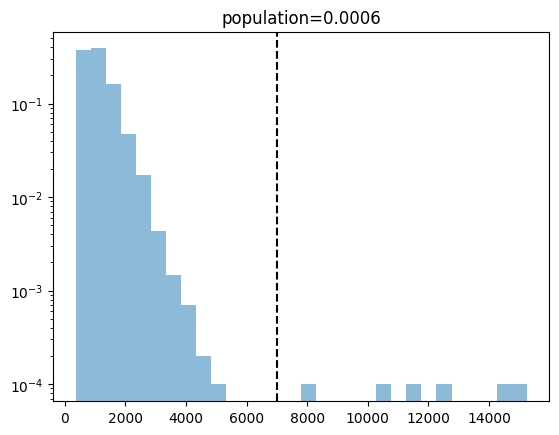

In [194]:
weights = np.ones_like(all_counts[0]) / len(all_counts[0])
plt.hist(all_counts[0], bins=30, alpha=0.5, weights=weights)
plt.yscale('log')
plt.axvline(x=THRESHOLD, color='k', linestyle='--')
plt.title("population=%.4f"%population)
# plt.title('pumping error = %.3f' % population)

## Micromotion

In [40]:
f_RF = 31.9587

In [41]:
cal._car_411_freqs["411_car_p1"] - f_RF/2

209.30804999999998

In [42]:
f_MM = cal.cal_411_freq(cal._car_411_freqs["411_car_p1"] - f_RF/2, f_span=0.03, t_probe=18, amp=cal._car_411_amps["411_car_p1"], N_points=50,autoRun=False)
print(f_MM)

209.310018


In [12]:
f_MM=209.5178

In [43]:
t_list = list(np.arange(0.1, 300, 5)) 
amp = cal._car_411_amps["411_car_p1"]

In [51]:
%%capture
# f_MM = 210.6317
cal.ion_count()
cal.time_scan_411(t_list, f_MM, amp, autoRun=False)

## Conversion and F microwave calibration

### Conversion Calib

In [19]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.ion_count()
cal.load_calibration()

repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=40
[261 262 263]
19441.25
ion_num = 1
Ion displacement: [1.]
repeattime=50


In [36]:
cal.Conversion_freqcal()

In [37]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
# cal.Conversion_ampcal(ion=[2, 3])
cal.Conversion_ampcal(ion=[0])

repeattime=50
threshold for detection=8000, threshold for S&D=4500
[18.957894736842103, 3.141592653589793, 75.83157894736841]
[18.957894736842103, 3.141592653589793, 75.83157894736841]


In [37]:
cal.Conversion_pitimecal()

[19.47894736842105, 3.141592653589793, 77.9157894736842]


In [ ]:
# cal.Conversion_pitimefinecal(n_pulse=3, ion=[0])

In [38]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
# cal.Conversion_pitimefinecal(n_pulse=3, ion=[2, 3])
cal.Conversion_pitimefinecal(n_pulse=3, ion=[0])

repeattime=50
threshold for detection=8000, threshold for S&D=4500


In [ ]:
cal.load_calibration()

In [ ]:
cal._CEOMpitime

In [72]:
# cal._sbc_cycle = 50
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)

seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
seqMW = cal.MW_seq(profile=0, t=1)

cal.set_ddsamp(0, channel=cal._ch_3432, profile=7, ddschoice=cal._dds_3432)
# cal.set_ddsfreq(cal._freq3432p0, channel=cal._ch_3432, profile=7, ddschoice=cal._dds_3432)

# seq411 = ["GlobalConv2(%.2f)"%cal._CEOMpitime]
# seq0 = ["*freeNE(500)"] + seq411  + ["free(26.4)"] + seq411

# seq0 = ["free(5)"] + seqSF +  ["free(2)"] + seqFS + ["Laser976(20)"]#["Laser3432p0(%.2f)"%cal._pitime3432p0] + ["Laser976(20)"]#+ seqFS #+ ["Frepump(2000)"]
# seq0 = cal.append_shelving_sbc(seq0, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)

# seq1 = seqMW + ["free(2)"] + seqSF + ["free(2)"] + seqFS + ["Laser976(20)"]
# seq1 = cal.append_shelving_sbc(seq1, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)

seq0 = ["free(5)"] + seqSF +  ["free(2)"] 
seq0 = cal.append_shelving_sbc(seq0, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)

seq1 = seqMW + ["free(2)"] + seqSF + ["free(2)"] 
seq1 = cal.append_shelving_sbc(seq1, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)

In [ ]:
seqFS

In [ ]:
seq0

In [73]:
exp_0conv = cal.selectseq(seq0)
exp_1conv = cal.selectseq(seq1)

In [ ]:
cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
cal.ion_count()

rp = rtplot.Rtplot(exp_0conv, stopfunc, xdata=list(np.linspace(1, 10, 20)), fileprefix='0-0 Conversion fidelity single path')
print(np.mean(rp.ydatadraw))
del rp

repeattime=100
threshold for detection=8000, threshold for S&D=4500
repeattime=40
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.10
time for getting CCD status:0.17
time for running sequence:0.01
time for collecting CCD data:0.55
[267 268]
16462.825
ion_num = 1
Ion displacement: [0.]
repeattime=100
time for setting CCD repeattime:0.13
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.22
time for getting CCD status:0.00
time for running sequence:0.01
time for collecting CCD data:0.99
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.01
time for getting CCD status:0.19
time for running sequence:0.00
time for collecting CCD data:0.99
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.06
time for getting CCD status:0.17
time for 

In [149]:
cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
cal.ion_count()

rp = rtplot.Rtplot(exp_0conv, stopfunc, xdata=list(np.linspace(1, 10, 10)), fileprefix='0-0 Conversion fidelity 1round')
print(np.mean(rp.ydatadraw))
del rp

repeattime=100
threshold for detection=8000, threshold for S&D=4500
repeattime=100
[240 241]
[257 258]
[274 275 276]
18001.4
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
stop
0.9506666666666668


In [78]:
cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
cal.ion_count()

rp = rtplot.Rtplot(exp_1conv, stopfunc, xdata=list(np.linspace(1, 10, 20)), fileprefix='1-1 Conversion single pass')
print(np.mean(rp.ydatadraw))
del rp

repeattime=100
threshold for detection=8000, threshold for S&D=4500
repeattime=40
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.22
time for getting CCD status:0.00
time for running sequence:0.01
time for collecting CCD data:0.55
[266 267 268]
14477.6
ion_num = 1
Ion displacement: [0.]
repeattime=100
time for setting CCD repeattime:0.06
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.12
time for getting CCD status:0.19
time for running sequence:0.01
time for collecting CCD data:0.98
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.05
time for getting CCD status:0.18
time for running sequence:0.00
time for collecting CCD data:0.98
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.06
time for getting CCD status:0.18
time fo

In [ ]:
seq = cal.MW_seq(profile=0, t=1)+["GlobalConv2(%.2f)"%cal._CEOMpitime, "*Laser3432p0(1.5)", "Laser976(20)"]

seq_F_rabi = cal.append_shelving_sbc(seq, sbc=False, shelvingdet=2)

exp_Fconv_rabi = cal.selectseq(seq=seq_F_rabi)
exp_Fconv_freqs = cal.select_calddschannel(0, cal._ch_3432, cal._dds_3432, seq=seq_F_rabi)



In [170]:
rp = rtplot.Rtplot(exp_Fconv_rabi, stopfunc, xdata=list(np.linspace(0.02, 4*cal._pitime3432p0, 30)), fitfunc=Fit.rabi_fit, fileprefix="Conversion_to_F")

del rp

stop


In [ ]:
freqscanrange = list(np.linspace(cal._freq3432p0-0.3, cal._freq3432p0+0.3, 50))
cal.seq.scanValue = cal._pitime3432p0
rp = rtplot.Rtplot(exp_Fconv_freqs, stopfunc, xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix="Conversion_to_F_freqscan")
freqlist = rp.fit_result
del rp

In [ ]:
np.mean(freqlist)

In [ ]:
cal._freq3432p0

In [ ]:
cal.seq.scanValue

In [47]:
#zl test
seqzl = ["GlobalConv2(%.2f)"%cal._CEOMpitime, "*Laser3432p0(1.5)", "Laser976(20)"]
seq_F_rabi_zl = cal.append_shelving_sbc(seqzl, sbc=False, shelvingdet=2)
exp_Fconv_rabi = cal.selectseq(seq=seq_F_rabi_zl)
rp = rtplot.Rtplot(exp_Fconv_rabi, stopfunc, xdata=list(np.linspace(0.02, 4*cal._pitime3432p0, 30)), fitfunc=Fit.rabi_fit, fileprefix="Conversion_to_F")

del rp

stop


In [48]:
seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
seqMW = cal.MW_seq(profile=0, t=1)

# postsel_seq = cal.F_shelving_postsel_seq()

# cal.set_ddsamp(0, channel=cal._ch_3432, profile=7, ddschoice=cal._dds_3432)

seq411 = ["GlobalConv2(%.2f)"%cal._CEOMpitime]

# seqzl = ["free(5)"] + seq411 +  ["free(2)"] + ["Laser976(20)"]#["Laser3432p0(%.2f)"%cal._pitime3432p0] + ["Laser976(20)"]#+ seqFS #+ ["Frepump(2000)"]
# seqzl = ["free(5)"] + seq411 + ["Laser3432p0(%.2f)"%cal._pitime3432p0] + ["free(2)"] + ["Laser976(20)"]
# seqzl = ["free(5)"] + seqSF + ["free(2)"] + ["Laser976(20)"]
seqzl = seqMW + ["free(5)"] + seqSF + ["free(2)"] + ["Laser976(20)"]
seqzl = cal.append_shelving_sbc(seqzl, sbc=True, shelvingdet=2, awg_reload_sbc=False)

exp_zlconv = cal.selectseq(seqzl)

cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
cal.ion_count()

rp = rtplot.Rtplot(exp_zlconv, stopfunc, xdata=list(np.linspace(1, 10, 10)), fileprefix='0-0 Conversion fidelity single path')
ydata = rp.ydatadraw
print(np.mean(rp.ydatadraw))
del rp

repeattime=100
threshold for detection=8000, threshold for S&D=4500
repeattime=80
[248 249]
[265 266]
[282 283]
15511.275
ion_num = 3
Ion displacement: [2. 2. 2.]
repeattime=100
stop
0.05100000000000001


### 3432 & 411 fidelity calibration with and without EIT

In [8]:
cal._amp_EITpump = 0.103

In [9]:
cal.set_ddsamp(cal._amp_EITpump, channel=cal._ch_EITpump, profile=7, ddschoice=cal._dds_EITpump)

In [9]:
cal._amp_EITpump

0.085

In [ ]:
seq3432_noEIT = ["freeNE(1)", "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["free(1)", "*Laser3432p0(%.2f)"%cal._pitime3432p5, "free(1)"] + ["Laser976(20)"]
seq3432_EIT = ["EITcooling(1000)", "pumping(30)", "freeNE(1)", "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["free(1)", "*Laser3432p0(%.2f)"%cal._pitime3432p5, "free(1)"] + ["Laser976(20)"]
# seq3432 = cal.append_shelving_sbc(seqzl_noEIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
seq3432 = cal.append_shelving_sbc(seq3432_EIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)

exp_conv = cal.selectseq(seq3432)

cal.set_repeattime(100)
cal.set_threshold(7000, 4500)
cal.ion_count()

rp = rtplot.Rtplot(exp_conv, stopfunc, xdata=list(np.linspace(0.02, 15, 80)), fileprefix='3432Rabi')
# ydata = rp.ydatadraw
# print(np.mean(rp.ydatadraw))
del rp

repeattime=100
threshold for detection=7000, threshold for S&D=4500
repeattime=40
[264 265 266]
12190.65
ion_num = 1
Ion displacement: [1.]
repeattime=100
stop


In [187]:
seq411_EIT = ["EITcooling(1000)", "pumping(30)", "freeNE(1)", "*GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], "Laser3432p0(%.2f)"%cal._pitime3432p0]
seq411_noEIT = ["freeNE(1)", "*GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], "Laser3432p0(%.2f)"%cal._pitime3432p0]
# seq411 = cal.append_shelving_sbc(seq411_noEIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
seq411 = cal.append_shelving_sbc(seq411_EIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)

exp_conv = cal.selectseq(seq411)

cal.set_repeattime(100)
cal.set_threshold(5500, 4500)
cal.ion_count()

rp = rtplot.Rtplot(exp_conv, stopfunc, xdata=list(np.linspace(3, 9, 15)), fitfunc=Fit.parabola_up_down(max_mode=False), fileprefix='411 rabi')
ydata = rp.ydatadraw
print(np.mean(rp.ydatadraw))
del rp

repeattime=100
threshold for detection=5500, threshold for S&D=4500
repeattime=40
[267 268]
11324.475
ion_num = 1
Ion displacement: [1.]
repeattime=100
stop
0.24933333333333335


In [23]:
#3432 fidelity calibration with post-selection
n = 1 #3432pulse数量

seq3432_EIT = ["EITcooling(1000)",
                "pumping(30)",
                "freeNE(1)", 
                "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], 
                "free(1)", 
                "Laser3432p0(%.2f)"%cal._pitime3432p0, 
                "Laser976(20)"] + \
                    cal.CCDcoolingdet_seq() + \
                ["free(6000)"] + \
                ["Laser3432p0(%.2f)"%cal._pitime3432p0]*n + \
                ["Laser976(20)"]

seq3432_noEIT = ["freeNE(1)", 
                "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], 
                "free(1)", 
                "Laser3432p0(%.2f)"%cal._pitime3432p0, 
                "Laser976(20)"] + \
                    cal.CCDcoolingdet_seq() + \
                ["free(6000)"] + \
                ["Laser3432p0(%.2f)"%cal._pitime3432p0]*n + \
                ["Laser976(20)"]


# seq3432 = cal.append_shelving_sbc(seq3432_EIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
seq3432 = cal.append_shelving_sbc(seq3432_noEIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
def exp_3432_fidelity(t):
    image = cal._runseq_multi_det_inseq(Seq=seq3432, det_time=2)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata


cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
cal.ion_count()
rp = rtplot.Rtplot(exp_3432_fidelity, stopfunc,  xdata=list(np.linspace(0.02, 10, 10)), fileprefix='3432 fidelity')
ydata = rp.ydatadraw
print(np.mean(rp.ydatadraw))
del rp


repeattime=200
threshold for detection=8000, threshold for S&D=4500
repeattime=40
[262 263]
16595.825
ion_num = 1
Ion displacement: [0.]
repeattime=200
stop
0.5137499999999999


In [ ]:
cal.load_calibration()

In [40]:
#411 fidelity calibration

seq411_EIT = ["EITcooling(1000)",
                "pumping(30)",
                "freeNE(1)", 
                "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], 
                "free(1)", 
                "Laser3432p0(%.2f)"%cal._pitime3432p0]

seq411_noEIT = ["freeNE(1)", 
                "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], 
                "free(1)", 
                "Laser3432p0(%.2f)"%cal._pitime3432p0]

seq4113432_EIT = ["EITcooling(1000)",
                "pumping(30)",
                "freeNE(1)", 
                "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], 
                "free(1)", 
                "Laser3432p0(%.2f)"%cal._pitime3432p0]

seq4113432_noEIT = ["freeNE(1)", 
                "GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], 
                "free(1)", 
                "Laser3432p0(%.2f)"%cal._pitime3432p0]

# sbc_freq_old = cal._sbc_freqlist
# cal._sbc_cycle = 10
# cal._sbc_tlist = [[50]] * len(cal._sbc_freqlist)

# seq411 = cal.append_shelving_sbc(seq411_EIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
# seq411 = cal.append_shelving_sbc(seq411_noEIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
seq411 = cal.append_shelving_sbc(seq4113432_EIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
# seq411 = cal.append_shelving_sbc(seq4113432_noEIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
exp_411_fidelity = cal.selectseq(seq411)

cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
cal.ion_count()
rp = rtplot.Rtplot(exp_411_fidelity, stopfunc,  xdata=list(np.linspace(0.02, 10, 10)), fileprefix='411 fidelity')
ydata = rp.ydatadraw
print(np.mean(rp.ydatadraw))
del rp

repeattime=200
threshold for detection=8000, threshold for S&D=4500
repeattime=40
[260 261 262]
16764.9
ion_num = 1
Ion displacement: [0.]
repeattime=200
stop
0.02


In [11]:
from dataanalysis.read_file_from_folder import *
import matplotlib.pyplot as plt

In [24]:
foldername = "E:\\PyPrograms\\210sequencer\\data\\202507\\0708\\19-57-12_3432 fidelity\\"

npy_dat = read_npy_file_from_folder(foldername)

3432 fidelity_1957.npy


In [25]:
npy_dat[7,1]

array([[  830., 14683.,  2160., 19765.,   671., 22495.,  1098., 16769.,
        18637., 19032.,   890., 19446.,  1984., 16295.,   754., 13543.,
         1063., 16561.,  1599., 15274.,   794., 15915.,   954., 15840.,
         1029., 12413.,  1024., 15760.,  1431., 19112.,  1270., 14729.,
         1376., 22819.,  1056., 17141.,  2008., 17796.,   812., 21230.,
          863., 20169., 16356., 18279.,   880., 21895.,   859., 17030.,
         1759., 20131.,   771., 14590.,   777., 14648.,  1530., 14951.,
          903., 20956.,   827., 15575.,  1678., 18987.,   767., 14582.,
         1217., 12308.,  1308., 16987.,  1358., 20374.,   954., 18945.,
          968., 14332.,  1618., 14219.,   843., 17520.,   746., 19402.,
          886., 18094.,   718., 20240.,  1082., 14803.,   839., 20654.,
         1551., 17638.,  1918., 17925.,   983., 10961.,   786., 18224.,
         1226., 16669.,   778., 16355.,  1467., 18751.,   740., 11886.,
          891., 14024.,   912., 18653.,   721., 18862.,   823., 

In [26]:
# npy_dat_all = npy_dat[0, 1] 
npy_dat_all = []
for i in range(len(npy_dat)):
    for j in range(len(npy_dat[:,1][i])):
        npy_dat_all += list(npy_dat[:, 1][i][j])

npy_dat_all = np.array(npy_dat_all)
print(npy_dat_all.shape)

(4000,)


In [27]:
postsel_dat = npy_dat_all[0::2]
detect_dat = npy_dat_all[1::2]
threshold = 8000

In [28]:
postsel_state0 = postsel_dat < threshold
detect_state1 = detect_dat > threshold

In [29]:
repeat_all = np.sum(postsel_state0)

In [30]:
repeat_all

1925

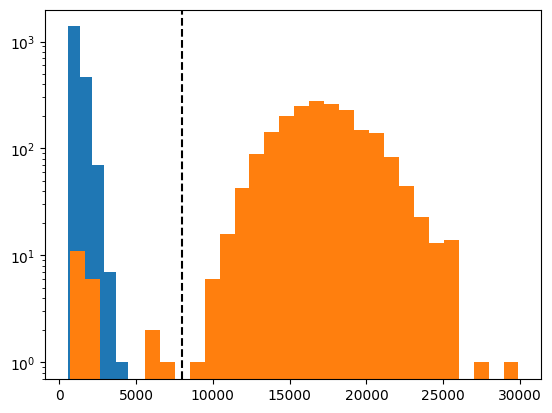

In [31]:
plt.hist(postsel_dat.reshape(-1), bins=30)
plt.hist(detect_dat.reshape(-1), bins=30)
plt.yscale("log")
plt.axvline(x=threshold, color='k', linestyle='--')

In [32]:
pop = []
repeat_all = []
# for i in range(postsel_state0.shape[0]):
#     pop.append(np.sum(detect_state1[i, :]*postsel_state0[i, :]))
#     repeat_all.append(np.sum(postsel_state0[i, :]))
pop.append(np.sum(detect_state1*postsel_state0))
repeat_all.append(np.sum(postsel_state0))

    
pop = np.array(pop)
repeat_all = np.array(repeat_all)

In [33]:
bright_pop = pop/repeat_all

In [34]:
bright_pop

array([0.98961039])

In [35]:
np.sqrt(0.9954*(1-0.9954)/3936)

0.0010785746013752223

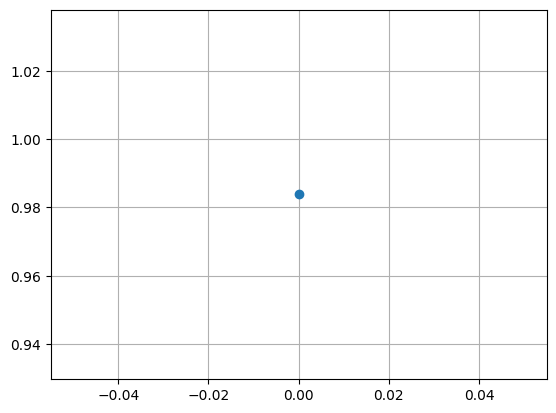

In [87]:
plt.plot(bright_pop,'o')
plt.grid(True)

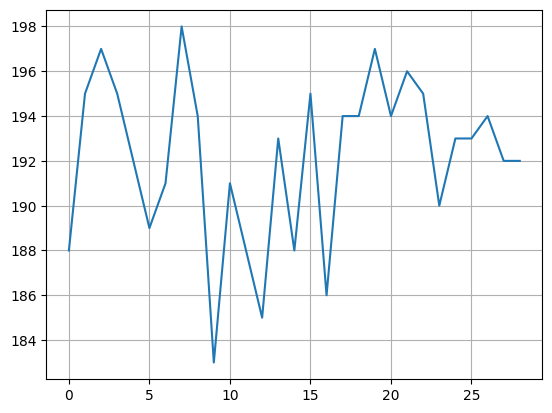

In [ ]:
plt.plot(repeat_all)
plt.grid(True)

In [125]:
del rp

In [160]:
cal._pitime3432p0 = 2.3

### calibrate the sympathetic EIT time for memory

In [149]:
cal.ion_count()

repeattime=40
[219 220 221]
[237 238]
[251 252 253]
[266 267 268]
[281 282]
[298 299 300]
18045.7
ion_num = 6
Ion displacement: [-1. -1. -1. -1. -1. -1.]
repeattime=50


array([[220.],
       [237.],
       [252.],
       [266.],
       [281.],
       [298.]])

In [150]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"ShapedPulse",2:"ShapedPulse",3:"ShapedPulse"}, seq_list=[1,2,3], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse",2:"simple_pulse",3:"simple_pulse"}, seq_list=[1,2,3], device=cal.awg_spectrum_aod)

In [151]:
t_off_before = 20
t_off = 20
t_margin = 3


# t_gate = 150
# t_gate_AOD = t_gate_list*2*N_loop_list + t_off + t_off_before + (np.mean(cal._MWpitimelist0)+2*t_margin)*N_loop_list
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before

ion_select_acss = [3,1]
ion_select_car = [0,5]

# t_shape = ramp_tau

t_echo = np.mean(cal._MWpitimelist0) + 2 * t_margin

t_acss_pi = np.array([cal._acss_pi2[ion_select_acss[0]]/2*3,cal._acss_pi2[ion_select_acss[1]]/2*3])
t_acsspi_AOD = t_acss_pi + t_off + t_off_before


amp2_AOM1 = 0
amp2_AOM2 = cal._awg_amp_aom_ind2
freq2_AOM1 = cal._f_aom_ind1
freq2_AOM2 = cal._f_aom_ind2
phase2_AOM1 = 0
phase2_AOM2 = 0
t_shape_acss = 0

#Individual simple pulse，涉及的是6&7两步
amp2_AOM1_car = car_pi_amp1
amp2_AOM2_car = car_pi_amp2
freq2_AOM1_car = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=ion_select_car[0])
freq2_AOM2_car = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=ion_select_car[1])
phase2_AOM1_car = 0
phase2_AOM2_car = 0
t_shape_car = 0



# amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
# amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
# # freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
# # freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
# phaselist1_AOD1 = [0, phase_opt]
# phaselist1_AOD2 = [0, 0]



amplist2_AOD1 = [0]
amplist2_AOD2 = [cal._amp_aod_ind2]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]

#Individual simple pulse，涉及的是6&7两步
amplist2_AOD1_car = [cal._amp_aod_ind1]
amplist2_AOD2_car = [cal._amp_aod_ind2]
freqlist2_AOD1_car = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2_car = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1_car = [0]
phaselist2_AOD2_car = [0]

#individual 的两个 simple pulse
Multi_pulses_AOM.Block_params[3] = {
                                    "amp1": amp2_AOM1_car,
                                    "amp2": amp2_AOM2_car,
                                    "freq1": freq2_AOM1_car,
                                    "freq2": freq2_AOM2_car,
                                    "phase1": phase2_AOM1_car,
                                    "phase2": phase2_AOM2_car,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOD.Block_params[3] = {
                                    "amp1": amplist2_AOD1_car,
                                    "amp2": amplist2_AOD2_car,
                                    "freq1": [np.array(cal._AODfreqlist1[0])[ion_select_car[0]]],
                                    "freq2": [np.array(cal._AODfreqlist2[0])[ion_select_car[1]]],
                                    "phase1": phaselist2_AOD1_car,
                                    "phase2": phaselist2_AOD2_car,
                                    "t": t_Dexcitation_AOD
                                    }
                                   
Multi_pulses_AOM.Block_params[1] = {
                                    "amp1": amp2_AOM1,
                                    "amp2": amp2_AOM2,
                                    "freq1": freq2_AOM1,
                                    "freq2": freq2_AOM2,
                                    "phase1": phase2_AOM1,
                                    "phase2": phase2_AOM2,
                                    "t": t_acss_pi[0],
                                    "t_shape": t_shape_acss,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": [np.array(cal._AODfreqlist2[0])[5]],
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_acsspi_AOD[0]
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp2_AOM1,
                                    "amp2": amp2_AOM2,
                                    "freq1": freq2_AOM1,
                                    "freq2": freq2_AOM2,
                                    "phase1": phase2_AOM1,
                                    "phase2": phase2_AOM2,
                                    "t": t_acss_pi[1],
                                    "t_shape": t_shape_acss,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": [np.array(cal._AODfreqlist2[0])[0]],
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_acsspi_AOD[1]
                                    }

In [152]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()
Multi_pulses_AOM.load_sequence()
Multi_pulses_AOD.load_sequence()

In [153]:
#conversion fidelity calibration with post-selection
seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

t_EIT = 10000

seq_sympEIT = cal.MW_seq(profile=1, t=0.5) +\
            ["free(%.2f)"%((t_off+t_off_before+t_acss_pi[0])*2)] +\
            cal.MW_seq(profile=0, t=1) +\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi[0], t_margin, scheme='simple_pulse')+\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi[1], t_margin, scheme='simple_pulse')+\
            cal.MW_seq(profile=0, t=0.25) + cal.MW_seq(profile=0, t=0.25) +\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
            ["free(1)"] + seqSF +  ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() +\
            ["coolingamp03432(6000)"] + ["EITcoolingN3432(%.2f)"%t_EIT] +\
            seqFS #+ seqSF + seqFS


seq_sympEIT = cal.append_shelving_sbc(seq_sympEIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)

def exp_sympEIT(t):

    cal.set_ddsphase(0.25, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

    image = cal._runseq_multi_det_inseq(Seq=seq_sympEIT, det_time=2)
    state, thrrawdata = cal._detectstateall(image)
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    return state, thrrawdata

cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
cal.ion_count()
rp = rtplot.Rtplot(exp_sympEIT, stopfunc,  xdata=list(np.linspace(0.02, 10, 20)), fileprefix='sympEIT fidelity')
ydata = rp.ydatadraw
print(np.mean(rp.ydatadraw))
del rp


repeattime=200
threshold for detection=8000, threshold for S&D=4500
repeattime=40
[219 220 221]
[236 237 238]
[251 252 253]
[266 267]
[281 282]
[298 299]
19426.025
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=200
stop
0.5471666666666667


In [154]:
from dataanalysis.read_file_from_folder import *
import matplotlib.pyplot as plt

In [155]:
foldername = "E:\\PyPrograms\\210sequencer\\data\\202506\\0626\\23-20-54_sympEIT fidelity\\"

npy_dat = read_npy_file_from_folder(foldername)

sympEIT fidelity_2322.npy


In [156]:
# npy_dat_all = npy_dat[0, 1] 
npy_dat_all = [[],[],[],[],[],[]]
det_time = 2 
ion_number = 6
for i in range(len(npy_dat)):
    for j in range(len(npy_dat[:,1][i])):
        npy_dat_all[j] += list(npy_dat[:, 1][i][j])

npy_dat_all = np.array(npy_dat_all)
print(npy_dat_all.shape)

(6, 8000)


In [ ]:
postsel_dat = [[],[],[],[],[],[]]
detect_dat = [[],[],[],[],[],[]]
for i in range(ion_number):
    postsel_dat[i] += list(npy_dat_all[i][0::2])
    detect_dat[i] += list(npy_dat_all[i][1::2])
threshold = 8000
postsel_success = 0
ion_bright = [0,0,0,0] #分别对应中间四个1234号离子
total_repeats = len(postsel_dat[0])
for i in range(total_repeats):
    if(postsel_dat[1][i]<threshold and postsel_dat[2][i]<threshold and postsel_dat[3][i]<threshold and postsel_dat[4][i]<threshold):
        if(postsel_dat[0][i]>threshold or postsel_dat[5][i]>threshold):
            postsel_success += 1
            for j in range(len(ion_bright)):
                if(detect_dat[j+1][i]>threshold):
                    ion_bright[j] += 1
bright_population = np.sum(ion_bright)
repeats = postsel_success*len(ion_bright)
fidelity = bright_population/repeats
errorbar = np.sqrt(fidelity*(1-fidelity)/repeats)

print("一共有%d次后选择成功"%postsel_success)
print(ion_bright)
print("有效数据共%d组"%repeats)
print(bright_population)
print("fidelity为:%.6f"%fidelity)
print("errorbar为:%.6f"%errorbar)


一共有3636次后选择成功
[3520, 3561, 3404, 3560]
有效数据共14544组
14045
fidelity为:0.965690
errorbar为:0.001509


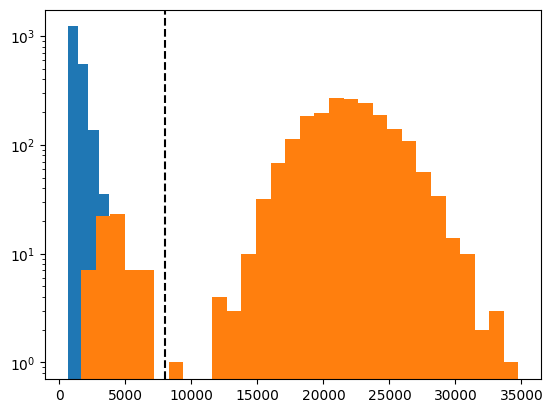

In [62]:
plt.hist(postsel_dat[2], bins=30)
plt.hist(detect_dat[2], bins=30)
plt.yscale("log")
plt.axvline(x=threshold, color='k', linestyle='--')

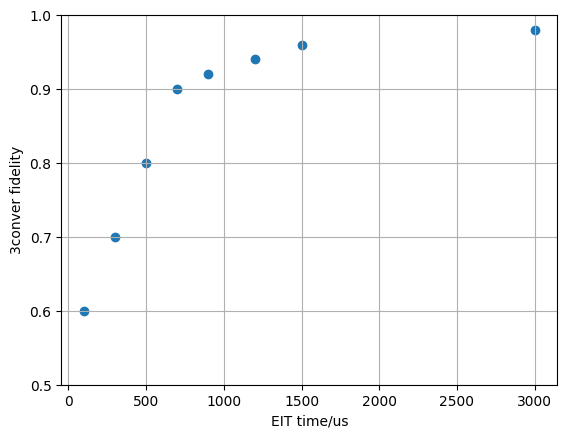

In [148]:
t_EIT_probe = [100,300,500,700,900,1200,1500,3000]
converfidelity = [0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.98]
plt.figure()
plt.ylabel("3conver fidelity")
plt.xlabel("EIT time/us")
plt.ylim(0.5,1)
plt.scatter(t_EIT_probe,converfidelity)
plt.grid()
plt.show()

In [ ]:
#协同冷却EIT扫红边带

In [127]:
sbc_freq_old = cal._sbc_freqlist

t_probe = 60
symp_t_EITcooling = 5000

probe_awg_global = SpectrumAWGSR.SingleRestartSpectrumAWG(cal.awg_spectrum1)
probe_awg_global.a_probe = cal.amp_sbc
probe_awg_global.f_probe = 220.88
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

seq_probe = cal.MW_seq(profile=1, t=0.5) +\
            ["free(%.2f)"%((t_off+t_off_before+t_acss_pi[0])*2)] +\
            cal.MW_seq(profile=0, t=1) +\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi[0], t_margin, scheme='simple_pulse')+\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi[1], t_margin, scheme='simple_pulse')+\
            cal.MW_seq(profile=0, t=0.25) + cal.MW_seq(profile=0, t=0.25) +\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
            ["free(1)"] + seqSF +  ["free(1)"] + ["Laser976(20)"] + ["pumping(30)"] +\
            ["EITcoolingN3432(%.2f)"%symp_t_EITcooling] + ["pumping(30)"] +\
            ["GlobalConv1(%.2f)"%cal._delay_spectrum_global, "free(%.2f)"%(t_probe)]
seq_probe = cal.append_shelving_sbc(seq_probe, sbc=False, shelvingdet=2, awg_reload_sbc=False)


In [128]:
#EIT pumping amp scan
EITpumping_ampscan = cal.select_ampdds(7, 0, ddschoice=1, seq=seq_probe)
f_probe = 224.452 #sbc_freq_old[0]
t_probe = 60
probe_awg_global.f_probe = f_probe
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

cal.seq.scanValue = t_probe

cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
ampscan_range = np.linspace(0.06, 0.14, 20)

cal.set_ddsphase(0.25, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
cal.set_ddsphase(0, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

rp = rtplot.Rtplot(EITpumping_ampscan, stopfunc, xdata=list(ampscan_range), fitfunc=Fit.gaussian_fit, fileprefix="EITpumping_ampscan")
del rp

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
cal.set_ddsphase(0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

cal.set_ddsamp(cal._amp_EITpump, channel=cal._ch_EITpump, profile=7, ddschoice=cal._dds_EITpump)

repeattime=100
threshold for detection=8000, threshold for S&D=4500
stop


In [112]:
cal._amp_EITpump

0.088

#### low-frequency mode probe RSB

In [74]:
cal.ion_count()

repeattime=40
[228 229 230]
[247 248 249]
[265 266]
[284 285 286]
14849.575
ion_num = 4
repeattime=50


array([[228.],
       [248.],
       [265.],
       [284.]])

In [75]:
sbc_freq_old = cal._sbc_freqlist

t_probe = 20
probe_awg_global = SpectrumAWGSR.SingleRestartSpectrumAWG(cal.awg_spectrum1)
probe_awg_global.a_probe = cal.amp_sbc
probe_awg_global.f_probe = 220.88
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

# seq_probe = ["EITcooling(1000)","pumping(30)","free(1)", "GlobalConv1(%.2f)"%cal._delay_spectrum_global, "*free(%.2f)"%(t_probe)]

# seq_EIT = cal.append_shelving_sbc(seq_probe, sbc=False, shelvingdet=2)

cal._sbc_cycle = 10
cal._sbc_tlist = [[50]] * len(cal._sbc_freqlist)
seq_probe = ["free(10000)","GlobalConv1(%.2f)"%cal._delay_spectrum_global, "*free(%.2f)"%(t_probe)]
cal.t_EITcooling = 1000

# seq_EIT = cal.append_shelving_sbc(seq_probe, sbc=True, EIT=True, shelvingdet=2, awg_reload_sbc=True)
seq_EIT = cal.append_shelving_sbc(seq_probe, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)


In [76]:
cal.set_repeattime(repeattime=50)
cal.ion_count()
f_motion_coarse = cal._car_411_freqs["411_car_0"] - sbc_freq_old[2] 
f_probe = cal._car_411_freqs["411_car_0"] - f_motion_coarse


t_probe = 60
probe_awg_global.f_probe = f_probe
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

cal.seq.scanValue = t_probe


freqscanrange = list(np.arange(f_probe-0.03, f_probe+0.11, 0.002))
#仔细检查
# freqscanrange = list(np.arange(224.41-0.06, 224.41+0.02, 0.002))
freqscanexp = cal.awg_freq_scan(probe_awg_global, seq_EIT)
# freqscanexp = cal.select_calddschannel(4, cal._ch_global_411, ddschoice=cal._dds_global_411, seq=seq_sbc)

rp = rtplot.Rtplot(freqscanexp, stopfunc, xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix='SBC_probe_freqscan')

# f_probe = rp.fit_result

rsb_xdata = rp.xdatadraw
rsb_ydata = rp.ydatadraw
del rp

repeattime=50
repeattime=40
[228 229]
[247 248 249]
[265 266]
[284 285 286]
15517.85
ion_num = 4
Ion displacement: [ 0. -1.  0.  0.]
repeattime=50
stop


#### calibrate the coolant sigmaz

In [97]:
#conversion fidelity calibration with post-selection
seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

t_EIT = 100



def exp_sympEIT(t):

    cal.set_ddsphase(0.25, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    # update sequencer time
    seq_sympEIT = cal.MW_seq(profile=1, t=0.5) +\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t, t_margin, scheme='simple_pulse')+\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t, t_margin, scheme='simple_pulse')+\
            cal.MW_seq(profile=0, t=0.25) + cal.MW_seq(profile=0, t=0.25) +\
            cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
            ["free(1)"] + seqSF +  ["free(1)"] + ["Laser976(20)"] #+\
            # cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
            # cal.CCDcoolingdet_seq() +\
            # ["coolingamp03432(6000)"] + ["EITcoolingN3432(%.2f)"%t_EIT] +\
            # seqFS #+ seqSF + seqFS
            
            # ["free(%.2f)"%((t_off+t_off_before+t)*2)] +\
            # cal.MW_seq(profile=0, t=1) +\

    seq_sympEIT = cal.append_shelving_sbc(seq_sympEIT, sbc=False, shelvingdet=2, awg_reload_sbc=False)
    
    # update AWG time
    Multi_pulses_AOM.Block_params[1]["t"] = t
    Multi_pulses_AOD.Block_params[1]["t"] = t + t_off + t_off_before
    Multi_pulses_AOM.Block_params[2]["t"] = t
    Multi_pulses_AOD.Block_params[2]["t"] = t + t_off + t_off_before

    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()


    # image = cal._runseq_multi_det_inseq(Seq=seq_sympEIT, det_time=2)
    image = cal._runseq(seq_sympEIT)
    state, thrrawdata = cal._detectstateall(image)
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    return state, thrrawdata

cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
cal.ion_count()
rp = rtplot.Rtplot(exp_sympEIT, stopfunc,  xdata=list(np.linspace(0.02, 6, 30)), fileprefix='sympEIT fidelity')
ydata = rp.ydatadraw
print(np.mean(rp.ydatadraw))
del rp


repeattime=200
threshold for detection=8000, threshold for S&D=4500
repeattime=40
[222 223]
[239 240]
[254 255]
[268 269 270]
[283 284 285]
[300 301 302]
21139.05
ion_num = 6
Ion displacement: [1. 0. 0. 0. 0. 0.]
repeattime=200
stop
0.15236111111111109


### F state Microwave Calib

In [ ]:
cal.load_calibration()
cal.ion_count()

In [ ]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_freqcal()

In [ ]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
# cal.MW_F_pitimecal(ion=[8, 9, 10, 11])
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=2)

In [ ]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
# cal.MW_F_pitimefinecal(3, ion=[18, 19, 20, 21])
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2], profile=2)

In [ ]:
n_pulse_MWF = 10

seq_pre = cal.Conversion_seq(direction="S-F")
seq_MWF = ["*free(1000)"] +["free(10)"]
seq_end = cal.Conversion_seq(direction='F-S')

seq_core = seq_pre + seq_MWF*n_pulse_MWF + seq_end

seq_total = cal.append_shelving_sbc(seq_core, sbc=False, shelvingdet=1)

cal.seq.scanValue = np.mean(cal._MWpitimelistF)

exp_MW_F_t = cal.selectseq(seq=seq_total)

def exp_MW_F_repeat(rep):
    return exp_MW_F_t(np.mean(cal._MWpitimelistF))

In [ ]:
print(len(seq_total))

In [ ]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(100)
cal.ion_count()
rp = rtplot.Rtplot(exp_MW_F_repeat, stopfunc, xdata=list(np.linspace(1, 20, 20)), fileprefix='Fstate MW pi pulse benchmark')

ydata = rp.ydatadraw

del rp

print(np.mean(ydata))

In [ ]:
print(np.mean(ydata))

In [ ]:
pulse_numlist = np.array([2, 4, 6, 8, 10])
population_list = np.array([0.0075, 0.022, 0.0235, 0.0495, 0.0585])
# pulse_numlist = np.array([1, 3, 5, 7, 9])
# population_list = np.array([0.8755, 0.889, 0.8695, 0.849, 0.8195])
repeat_all = 2000
error_pop_list = np.sqrt(population_list*(1-population_list)/repeat_all)

def linear_func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear_func, pulse_numlist, population_list, p0=[0.01, 0.05], sigma=error_pop_list)

plt.errorbar(pulse_numlist, population_list, error_pop_list, ls='none', marker='o')
plt.plot(pulse_numlist, linear_func(pulse_numlist, *popt), '-', label='a=%.4f, b=%.4f'%(popt[0], popt[1]))
plt.legend()

In [ ]:
popt

#### F Microwave freqscan

In [ ]:
seq_pre = cal.Conversion_seq(direction="S-F")
seq_MWF = ["free3432(2)"] + ["MicrowaveFamp03432(10000)"] + ["free3432(2)"]
seq_end = cal.Conversion_seq(direction='F-S')

seq_core = cal.MW_seq(profile=0, t=1) + seq_pre + seq_MWF + seq_end

seq_total = cal.append_shelving_sbc(seq_core, sbc=False, shelvingdet=0)

print(seq_total)

In [ ]:
cal._MWfreq_F

In [ ]:
freq_range = np.linspace(3629.92919-0.001, 3629.92919+0.001, 50)

In [ ]:
freqscan = cal.select_calddschannel(0, 0, ddschoice=cal._dds_MW_F, seq=seq_total)

In [ ]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(4000, 4500)

rp = rtplot.Rtplot(freqscan, stopfunc, xdata=list(freq_range), fitfunc=Fit.inv_gaussian_fit, fileprefix='MW_F_freqscan')
del rp

#### F Microwave rabi scan

In [159]:
cal.ion_count()

repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
13264.4875
ion_num = 3
Ion displacement: [0. 1. 0.]
repeattime=50


array([[258.],
       [276.],
       [292.]])

In [ ]:
["MicrowaveFN3432(%.2f)"%(t*np.mean(cal._MWpitimelistF))]

In [179]:
seq_pre = cal.Conversion_seq("S-F")#["GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"], "free(1)", "Laser3432p0(%.2f)"%cal._pitime3432p0]
seq_MWF = cal.MW_F_seq(t=1, profile=0, shutter=True) + ["symcoolingNMWF3432(8000)"]+["coolingamp03432(8000)"]
seq_end = cal.F_shelving_seq(n=1, profile=0)

seq_core = seq_pre + seq_MWF + seq_end

seq_total = cal.append_shelving_sbc(seq_core, sbc=False, shelvingdet=2)

print(seq_total)

['Frepump(5000.000000)', 'free(1)', 'Laser976(10)', 'pumping(30.00)', 'free(1)', 'GlobalConv2(16.72)', 'free(1)', 'Laser3432p0(2.72)', 'MicrowaveFN3432(1571.35)', 'symcoolingNMWF3432(8000)', 'coolingamp03432(8000)', 'Laser3432p0(2.83)', 'freeNE(0.5)', 'GlobalNconv2(5.16)', 'freeNE(0.5)', 'cooling(6.00)', 'freeNE(0.5)', 'GlobalNconv2(5.16)', 'freeNE3432p4(0.5)', 'Laser3432p4(2.83)', 'cooling(6.00)', 'GlobalNconv2(5.16)', 'CCD(155.000000)', 'ccddetcooling(1000.000000)', 'detectionfree(1000.000000)']


In [180]:
rabiscan = cal.selectseq(seq_total)
time_range = np.linspace(0.02, 1500, 10)
# cal.set_ddsfreq(3629.92926, channel=0, profile=0, ddschoice=cal._dds_MW_F)

In [181]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7000, 4500)

rp = rtplot.Rtplot(rabiscan, stopfunc, xdata=list(time_range), fitfunc=Fit.rabi_fit, fileprefix='MW_F_rabiscan')
print(np.mean(rp.ydatadraw))
del rp

repeattime=80
[258 259]
[275 276]
[292 293]
13853.575
ion_num = 3
Ion displacement: [-1.  0.  0.]
repeattime=50
repeattime=50
threshold for detection=7000, threshold for S&D=4500
stop
0.03333333333333334


## Individual Beam Alignment

In [86]:
cal.ion_count()

repeattime=40
[220 221 222]
[237 238 239]
[252 253 254]
[267 268]
[282 283]
[299 300]
21300.6
ion_num = 6
Ion displacement: [1. 0. 0. 0. 0. 0.]
repeattime=200


array([[221.],
       [238.],
       [253.],
       [267.],
       [282.],
       [299.]])

In [12]:
cal.load_calibration()

In [14]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(repeattime=50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

threshold for detection=5000, threshold for S&D=4500
repeattime=50


In [ ]:
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD1 calibration------")
# cal._amp_aod_ind1 = 0.5
cal.aodfreqcal(start=np.min(cal._AODfreqlist1[0]) - 1.2, stop=np.max(cal._AODfreqlist1[0]) + 1.2, route=0, tcal=tcal1, step_size=0.03)
print(cal._AODfreqlist)

In [32]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(repeattime=50)

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD2 calibration------")
# cal._amp_aod_ind2 = 0.5
cal.aodfreqcal(start=np.min(cal._AODfreqlist2[0]) - 0.2, stop=np.max(cal._AODfreqlist2[0]) + 0.2, route=1, tcal=tcal2, step_size=0.03)
print(cal._AODfreqlist)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
----AOD2 calibration------
([143.2279], 1751973868.8408945)


In [33]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
# cal._amp_aod_ind2 = 0.5
cal.set_repeattime(repeattime=50)
cal.motorscancal(tcal=tcal2, tolerance=0.17, ion=[0], half_range=0.02, direction=1, route=1, step_size=0.002)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
cur_pos is 7.10198813
Moving to the optimal position
Moved to the optimal position
[[[7.29706035, 1751963764.853304], [5.26095214, 1751963793.4894524]], [0, (7.10328935, 1751973896.8872132)]]


(0.8814, 7.10197367, True, (7.10328935, 1751973896.8872132))

In [35]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(repeattime=50)
cal.motorscancal(tcal=tcal1, tolerance=0.17, ion=[0], half_range=0.02, direction=1, route=0, step_size=0.002)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
cur_pos is 5.26089436
Moving to the optimal position
Moved to the optimal position
[[(7.29736398, 1751973926.4943645), (5.26056212, 1751973955.1415908)], [0, (7.10328935, 1751973896.8872132)]]


(0.7751, 5.26089436, True, (5.26056212, 1751973955.1415908))

In [34]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(repeattime=50)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.02, direction=0, route=0, step_size=0.002)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
cur_pos is 7.29698806
Moving to the optimal position
Moved to the optimal position
[[(7.29736398, 1751973926.4943645), [5.26095214, 1751963793.4894524]], [0, (7.10328935, 1751973896.8872132)]]


(0.8855, 7.29698806, True, (7.29736398, 1751973926.4943645))

In [17]:
cal.cal_acss_pulse(route=1, ion=1, n_pulse=3)
cal.cal_acss_pulse(route=1, ion=3, n_pulse=3)
# cal.cal_acss_pulse(route=1, ion=5, n_pulse=3)
print(cal._acss_pi2)
# pitime_acss = cal._acss_pi1[1]

[1.8333]
[1.7606]
[1.9441, 1.8333, 1.5005, 1.7606, 1.4867, 1.7937]


In [171]:
awg = cal.awg_spectrum_aom
probe = SpectrumAWG2.ProbeSequence(awg)
probe.f_probe1 = cal._f_aom_ind1
probe.f_probe2 = cal._f_aom_ind2
probe.a_probe1 = cal._awg_amp_aom_ind1
probe.a_probe2 = cal._awg_amp_aom_ind2

probe_AOD = SpectrumAWG2.ProbeSequence(cal.awg_spectrum_aod)

In [31]:
cal.ion_count()
cal.set_threshold(detectionthr=8000, coolingthr=4500)
cal.set_repeattime(repeattime=100)
MWseq0 = cal.MW_seq(profile=0, t=0.5)
MWseq1 = cal.MW_seq(profile=1, t=0.5)
seq0 = cal.individual_timescanseq(probe, probe_AOD, route=1, ion=[0])
gateseq = MWseq0+seq0+ ["free(1)"] + MWseq1
seq = cal.append_shelving_sbc(gateseq, sbc=False, shelvingdet=1) # No SBC, normal detection
exp = cal.awg_time_scan(probe, seq, cal.t_aod_total)

repeattime=40
time for setting CCD repeattime:0.15
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.21
time for getting CCD status:0.00
time for running sequence:0.01
time for collecting CCD data:0.55
[267 268 269]
17546.3
ion_num = 1
Ion displacement: [0.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=100
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG:0.01
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG:0.01
time for dealing with waveform format:0.11
time for transferring the waveform to the buffer memory:0.15
time for writing the waveform into the AWG:0.08


In [32]:
rp = rtplot.Rtplot(exp, stopfunc, xdata=list(np.arange(0.1,50,0.2)), fitfunc=Fit.rabi_fit, fileprefix="411individual")
del rp

time for dealing with waveform format:0.14
time for transferring the waveform to the buffer memory:0.13
time for writing the waveform into the AWG:0.09
time for setting CCD repeattime:0.13
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.25
time for getting CCD status:0.00
time for running sequence:0.02
time for collecting CCD data:0.88
time for dealing with waveform format:0.15
time for transferring the waveform to the buffer memory:0.13
time for writing the waveform into the AWG:0.09
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD roi:0.00
time for starting CCD:0.08
time for getting CCD status:0.17
time for running sequence:0.02
time for collecting CCD data:0.88
time for dealing with waveform format:0.13
time for transferring the waveform to the buffer memory:0.16
time for writing the waveform into the AWG:0.09
time for setting CCD repeattime:0.00
time for setting CCD binning:0.00
time for setting CCD 

## individual simple pulse cal

In [137]:
cal.ion_count()
cal.set_repeattime(100)

repeattime=40
[221 222]
[238 239 240]
[253 254]
[267 268 269]
[282 283 284]
[300 301]
18128.225
ion_num = 6
Ion displacement: [2. 2. 2. 3. 3. 3.]
repeattime=50
repeattime=100


In [18]:
pitime_Dexcite = 1
awg = cal.awg_spectrum_aom
car_probe = SpectrumAWG2.ProbeSequence(awg)
car_probe.f_probe1 = cal._f_aom_ind1
car_probe.f_probe2 = cal._f_aom_ind2
car_probe.a_probe1 = cal._awg_amp_aom_ind1
car_probe.a_probe2 = cal._awg_amp_aom_ind2
t_probe = pitime_Dexcite
car_probe.t_probe = t_probe
car_probe.t_off_before = 20

In [19]:
def freq_cal_route_exp(t, amp, route):
    def cal_pulse_freq(freq):
        # cal.periodic_cal(tcal1, tcal2)
        cal.t_aod_total = np.max([t+100, 600])
        # cal.update_AOD_ion_beam(ion=[0, 3])
        cal.update_AOD_ion_beam(ion=[0,5])

        if route==0:
            ion_route = 0
        else:
            # ion_route = 3
            ion_route = 5

        f_car_AOM = cal.calculate_ind_AOM_freq(freq, route, ion=ion_route)

        car_probe.reset_probe_waveform() # Clear the existing waveform

        t_off_before = 20
        car_probe.add_pulse_to_probe(f_car_AOM, 0, 0, f_car_AOM, 0, 0, t_off_before)

        if route == 0:
            car_probe.a_probe1 = amp
            car_probe.a_probe2 = 0
        else:
            car_probe.a_probe1 = 0
            car_probe.a_probe2 = amp


        car_probe.add_pulse_to_probe(f_car_AOM, car_probe.a_probe1, 0, f_car_AOM, car_probe.a_probe2, 0, t) # Carrier pi pulse
        # car_probe.add_pulse_to_probe(f_car_AOM, 0, 0, f_car_AOM, 0, 0, 2) # delay between two pi/2 pulse
        # car_probe.add_pulse_to_probe(f_car_AOM, car_probe.a_probe1, 0, f_car_AOM, car_probe.a_probe2, 0, t) # Carrier pi pulse

        t_off = cal.t_aod_total - t + 20
        car_probe.add_pulse_to_probe(f_car_AOM, 0, 0, f_car_AOM, 0, 0, t_off)
        # awg_seq_motional_Ramsey.add_pulse_to_probe(f_car_411, a_rsb_411, 0, t_RSB)

        car_probe.update_probe()

        # Configure the Sequencer
        seq = ["Laser411i1(2)", "AOD1(21.5)", "free(%f)"%car_probe.t_off_before, "free(%f)"% (t)]
        seq_cal_pitime = cal.append_shelving_sbc(seq, sbc=False, EIT =True, shelvingdet=2, awg_reload_sbc=False)

        image = cal._runseq(Seq=seq_cal_pitime)
        state, thrrawdata = cal._detectstateall(image)
        return state, thrrawdata
    return cal_pulse_freq


In [20]:
cal.set_threshold(9000, 4500)
cal.set_repeattime(50)
cal.ion_count()
cal_pulsefreq_exp = freq_cal_route_exp(pitime_Dexcite*9, 0.2, 0)
freqscanrange = list(np.linspace(cal._car_411_freqs["411_car_m1"]-0.05, cal._car_411_freqs["411_car_m1"]+0.05, 20))
rp = rtplot.Rtplot_SelectIon(cal_pulsefreq_exp, stopfunc, ion=[1], xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix="cal_Car_freq_beam0", autoRun=False)
car_freq1 = rp.fit_result[0]
print(car_freq1)

del rp

threshold for detection=9000, threshold for S&D=4500
repeattime=50
repeattime=40
[217 218 219]
[234 235 236]
[249 250 251]
[264 265]
[279 280]
[296 297]
16536.25
ion_num = 6
Ion displacement: [2. 2. 1. 2. 2. 2.]
repeattime=50
stop
215.0497


In [103]:
del rp

In [ ]:
car_freq1 = 215.0497

In [106]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.ion_count()
cal_pulsefreq_exp = freq_cal_route_exp(pitime_Dexcite*9, 0.2, 1)
freqscanrange = list(np.linspace(cal._car_411_freqs["411_car_m1"]-0.05, cal._car_411_freqs["411_car_m1"]+0.05, 20))
rp = rtplot.Rtplot_SelectIon(cal_pulsefreq_exp, stopfunc, ion=[4], xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix="cal_Car_freq_beam1", autoRun=False)
car_freq2 = rp.fit_result[0]
print(car_freq1)

del rp

threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=40
[224 225 226]
[241 242 243]
[256 257 258]
[271 272]
[286 287]
[303 304]
16872.0
ion_num = 6
Ion displacement: [-1. -1.  0.  0.  0.  0.]
repeattime=50
stop
215.0492


In [59]:
del rp

In [21]:
def n_pulse_amp_cal(n, t, freq, route):
    def cal_pulse_amp(amp):
        cal.periodic_cal(tcal1, tcal2)
        cal.t_aod_total = np.max([n*(t+2)+100, 600])
        # cal.update_AOD_ion_beam(ion=[0, 3])
        cal.update_AOD_ion_beam(ion=[0, 5])
        
        if route==0:
            ion_route = 0
        else:
            # ion_route = 3
            ion_route = 5

        f_car_AOM = cal.calculate_ind_AOM_freq(freq, route, ion=ion_route)

        car_probe.reset_probe_waveform() # Clear the existing waveform

        t_off_before = 20
        car_probe.add_sin_squared_pulse_to_probe(f_car_AOM, 0, 0, 0, f_car_AOM, 0, 0, 0, t_off_before)
        
        if route == 0:
            car_probe.a_probe1 = amp
            car_probe.a_probe2 = 0
        else:
            car_probe.a_probe1 = 0
            car_probe.a_probe2 = amp
        
        for i in range(n):
            car_probe.add_sin_squared_pulse_to_probe(f_car_AOM, car_probe.a_probe1, 0, 0, f_car_AOM, car_probe.a_probe2, 0, 0, t) # Carrier pi pulse
            car_probe.add_sin_squared_pulse_to_probe(f_car_AOM, 0, 0, 0, f_car_AOM, 0, 0, 0, 2) # delay between two pi/2 pulse
        # car_probe.add_pulse_to_probe(f_car_AOM, car_probe.a_probe1, 0, f_car_AOM, car_probe.a_probe2, 0, t) # Carrier pi pulse

        t_off = cal.t_aod_total-n*(t+2)+20
        car_probe.add_sin_squared_pulse_to_probe(f_car_AOM, 0, 0, 0, f_car_AOM, 0, 0, 0, t_off)
        # awg_seq_motional_Ramsey.add_pulse_to_probe(f_car_411, a_rsb_411, 0, t_RSB)

        car_probe.update_probe()

        # Configure the Sequencer
        seq = ["Laser411i1(2)", "AOD1(20.5)", "free(%f)"%car_probe.t_off_before, "free(%f)"% (n*(t+2))]
        seq_cal_pitime = cal.append_shelving_sbc(seq, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)

        image = cal._runseq(Seq=seq_cal_pitime)
        state, thrrawdata = cal._detectstateall(image)
        return state, thrrawdata
    
    return cal_pulse_amp

In [63]:
cal.ion_count()

repeattime=40
[218 219 220]
[235 236 237]
[250 251 252]
[265 266]
[280 281]
[297 298]
19227.225
ion_num = 6
Ion displacement: [0. 0. 0. 1. 1. 1.]
repeattime=50


array([[218.],
       [235.],
       [250.],
       [265.],
       [280.],
       [297.]])

In [22]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.ion_count()

cal_pulse_exp = n_pulse_amp_cal(3, pitime_Dexcite, car_freq1, 0)
rp = rtplot.Rtplot_SelectIon(cal_pulse_exp, stopfunc, ion=[0], xdata=list(np.linspace(0.009-0.003, 0.009+0.003, 10)), fitfunc=Fit.parabola_up_down(max_mode=False), fileprefix="cal_Car_ind_pi_time", autoRun=False)
car_pi_amp1 = rp.fit_result[0]
print(car_pi_amp1)

del rp

threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=40
[217 218 219]
[234 235 236]
[249 250 251]
[264 265]
[279 280]
[296 297]
16497.0
ion_num = 6
Ion displacement: [1. 0. 1. 0. 0. 0.]
repeattime=50
repeattime=40
[217 218 219]
[234 235 236]
[249 250 251]
[264 265]
[279 280]
[296 297]
17043.0
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
240.78283309936523
ion displacement 2.1666666666666665
[144.5809, 144.0692, 143.6199, 143.2, 142.753, 142.2413] [[0.94]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
stop
0.0093


In [62]:
del rp

In [ ]:
car_pi_amp1 = 0.0089

In [ ]:
car_freq1

In [26]:
cal.set_threshold(8000, 4500)
cal.ion_count()
cal_pulse_exp = n_pulse_amp_cal(3, pitime_Dexcite, car_freq1, 1)
rp = rtplot.Rtplot_SelectIon(cal_pulse_exp, stopfunc, ion=[5], xdata=list(np.linspace(0.01-0.003, 0.01+0.003, 10)), fitfunc=Fit.parabola_up_down(max_mode=False), fileprefix="cal_Car_ind_pi_time", autoRun=False)
car_pi_amp2 = rp.fit_result[0]
print(car_pi_amp2)

del rp

threshold for detection=8000, threshold for S&D=4500
repeattime=40
[217 218 219]
[234 235 236]
[250 251]
[264 265]
[279 280]
[296 297]
15306.5
ion_num = 6
Ion displacement: [-1.  0.  0.  0.  0.  0.]
repeattime=50
repeattime=40
[217 218 219]
[235 236]
[249 250 251]
[264 265]
[279 280]
[296 297]
16877.5
ion_num = 6
Ion displacement: [1. 0. 0. 0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
280.19393491744995
ion displacement 2.1666666666666665
[144.5809, 144.0692, 143.6199, 143.2, 142.753, 142.2413] [[0.86]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
stop
0.0093


In [38]:
car_pi_amp2 = 0.011

In [24]:
del rp

## Motional frequency calibration

In [108]:
cal.ion_count()

repeattime=40
[227 228 229]
[245 246]
[260 261]
[274 275]
[289 290]
[306 307]
14435.825
ion_num = 6
Ion displacement: [ 0.  0.  0. -1.  0. -1.]
repeattime=50


array([[228.],
       [245.],
       [260.],
       [274.],
       [289.],
       [306.]])

In [229]:
cal.load_calibration()

In [ ]:
cal.cal_411_freq(220.8, f_span=0.5, t_probe=60, amp=0.5, N_points=200)

In [ ]:
# probeSB = SpectrumAWGSR.SingleRestartSpectrumAWG(cal.awg_spectrum2)

In [34]:
sbc_freq_old = cal._sbc_freqlist

t_probe = 20
probe_awg_global = SpectrumAWGSR.SingleRestartSpectrumAWG(cal.awg_spectrum1)
probe_awg_global.a_probe = cal.amp_sbc
probe_awg_global.f_probe = 220.88
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()


#
seq_probe = ["EITcooling(1000)","pumping(30)","free(1)", "GlobalConv1(%.2f)"%cal._delay_spectrum_global, "*free(%.2f)"%(t_probe)]
# seq_probe = ["free(1)", "GlobalConv1(%.2f)"%cal._delay_spectrum_global, "*free(%.2f)"%(t_probe)]
seq = seq_probe
seq_sbc = cal.append_shelving_sbc(seq, sbc=False, shelvingdet=2)
# seq_sbc = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)
# print(seq_sbc)

In [76]:
cal._sbc_freqlist

[224.533, 224.736]

In [16]:
cal.ion_count()

repeattime=40
[227 228 229]
[245 246]
[259 260 261]
[274 275]
[289 290]
[306 307]
13067.475
ion_num = 6
Ion displacement: [-1.  0.  0.  0.  0. -1.]
repeattime=50


array([[227.],
       [245.],
       [260.],
       [274.],
       [289.],
       [306.]])

Probe the RSB of the high-frequency modes

In [43]:
cal.set_repeattime(repeattime=50)

# sbc_probe.f_probe = 2 * cal._car_411_freqs["411_car_0"] - cal._sbc_freqlist[1]
f_motion_coarse = cal._car_411_freqs["411_car_p1"] - sbc_freq_old[0] 
f_probe = cal._car_411_freqs["411_car_p1"] - f_motion_coarse
# sbc_probe.f_probe = cal._car_411_freqs["411_car_0"] + f_motion_coarse
# probeSB.a_probe = 0.5
# probeSB.t_probe = 40
t_probe = 60
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()
cal.seq.scanValue = t_probe
# cal.set_ddsfreq(f_probe, channel=cal._ch_global_411, profile=4,
#                          ddschoice=cal._dds_global_411)

# cal.set_ddsamp(0.15, channel=cal._ch_global_411, profile=4,
#                         ddschoice=cal._dds_global_411)

freqscanrange = list(np.arange(f_probe-0.04, f_probe+0.08, 0.002))
freqscanexp = cal.awg_freq_scan(probe_awg_global, seq_sbc)
# freqscanexp = cal.select_calddschannel(4, cal._ch_global_411, ddschoice=cal._dds_global_411, seq=seq_sbc)

rp = rtplot.Rtplot(freqscanexp, stopfunc, xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix='SBC_probe_freqscan')

# f_probe = rp.fit_result

rsb_xdata = rp.xdatadraw
rsb_ydata = rp.ydatadraw
del rp

repeattime=50
stop


: 

Probe the RSB of the low-frequency modes

In [32]:
cal.set_repeattime(repeattime=50)
cal.ion_count()
# sbc_probe.f_probe = 2 * cal._car_411_freqs["411_car_0"] - cal._sbc_freqlist[1]
f_motion_coarse = cal._car_411_freqs["411_car_0"] - sbc_freq_old[-1] 
f_probe = cal._car_411_freqs["411_car_0"] - f_motion_coarse
# sbc_probe.f_probe = cal._car_411_freqs["411_car_0"] + f_motion_coarse
# probeSB.a_probe = 0.5
# probeSB.t_probe = 30

# probeSB.update_probe()

t_probe = 30
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

cal.seq.scanValue = t_probe
# cal.set_ddsfreq(f_probe, channel=cal._ch_global_411, profile=4,
#                          ddschoice=cal._dds_global_411)

# cal.set_ddsamp(0.15, channel=cal._ch_global_411, profile=4,
#                         ddschoice=cal._dds_global_411)

freqscanrange = list(np.arange(f_probe-0.08, f_probe+0.1, 0.002))
freqscanexp = cal.awg_freq_scan(probe_awg_global, seq_sbc)
# freqscanexp = cal.select_calddschannel(4, cal._ch_global_411, ddschoice=cal._dds_global_411, seq=seq_sbc)

rp = rtplot.Rtplot(freqscanexp, stopfunc, xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix='SBC_probe_freqscan')

# f_probe = rp.fit_result

rsb_xdata = rp.xdatadraw
rsb_ydata = rp.ydatadraw
del rp

repeattime=50
repeattime=40
[261 262 263]
[278 279 280]
[296 297]
19214.575
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
stop


In [ ]:
sbc_freq_old

In [34]:
cal._sbc_freqlist

[224.633, 224.644, 224.665, 224.836, 224.853, 224.876]

In [ ]:
probe_awg_global.reset_waveform()

Probe the BSB spectrum

In [54]:
cal.ion_count()

repeattime=80
[248 249 250]
[265 266 267]
[282 283 284 285]
16510.25
ion_num = 3
Ion displacement: [4. 5. 5.]
repeattime=50


array([[248.],
       [266.],
       [283.]])

In [33]:
cal.load_calibration()

In [49]:
cal.set_repeattime(100)
cal.cal_411_fast(t_probe=15, amp=0.1, transition="411_car_0")

repeattime=100
220.38303900000002


In [ ]:
# probeSB = SpectrumAWGSR.SingleRestartSpectrumAWG(cal.awg_spectrum2)

In [50]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)



t_probe = 400
#
seq_probe= ["freeNE(1)", "*GlobalNconv2(%f)"% (t_probe), "freeNE(1)" ]
seq = seq_probe
seq_sbc = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=True)
# print(seq_sbc)

In [35]:
# cal.load_calibration()
cal._sbc_freqlist

[224.699, 224.713, 224.727, 224.898, 224.913, 224.934]

In [52]:
cal.ion_count()
cal.set_threshold(detectionthr=8000, coolingthr=4500)
cal.set_repeattime(repeattime=50)
for i in range(len(cal._sb_freqlist)):
    
    f_motion_coarse = (cal._sb_freqlist[i])/2
    f_probe = cal._car_411_freqs["411_car_0"] + f_motion_coarse
    # probeSB.a_probe = 0.3
    # probeSB.t_probe = 400
    # probeSB.update_probe()
    t_probe = 400
    cal.seq.scanValue = t_probe
    cal.set_ddsfreq(f_probe, channel=cal._ch_global_411, profile=4,
                             ddschoice=cal._dds_global_411)

    cal.set_ddsamp(0.1, channel=cal._ch_global_411, profile=4,
                            ddschoice=cal._dds_global_411)

    freqscanrange = list(np.arange(f_probe-0.02, f_probe+0.02, 0.0003))

    peaklist = []




    # freqscanrange = list(np.arange(probeSB.f_probe-0.005, probeSB.f_probe+0.005, 0.0003))
    # freqscanexp = cal.awg_freq_scan(probeSB, seq_sbc)
    freqscanexp = cal.select_calddschannel(4, cal._ch_global_411, ddschoice=cal._dds_global_411, seq=seq_sbc)


    rp = rtplot.Rtplot(freqscanexp, stopfunc, xdata=freqscanrange, fileprefix='SBC_probe_freqscan', autoRun=True, fitfunc=Fit.inv_gaussian_fit)
    ydata = rp.ydatadraw
    xdata = rp.xdatadraw
    f_probe = np.mean(rp.fit_result)
    peaklist.append(rp.fit_result)
    cal._sb_freqlist[i] = round((f_probe - cal._car_411_freqs["411_car_0"]) * 2, 4)
    del rp
    print(cal._sb_freqlist[i])

# f_motion_coarse = (cal._sb_freqlist[-1])/2
# f_probe = cal._car_411_freqs["411_car_0"] + f_motion_coarse
# # probeSB.update_probe()

# cal.seq.scanValue = t_probe
# cal.set_ddsfreq(f_probe, channel=cal._ch_global_411, profile=4,
#                          ddschoice=cal._dds_global_411)

# cal.set_ddsamp(0.1, channel=cal._ch_global_411, profile=4,
#                         ddschoice=cal._dds_global_411)

# freqscanrange = list(np.arange(f_probe-0.01, f_probe+0.01, 0.0003))
# freqscanexp = cal.select_calddschannel(4, cal._ch_global_411, ddschoice=cal._dds_global_411, seq=seq_sbc)

# # freqscanrange = list(np.arange(probeSB.f_probe-0.005, probeSB.f_probe+0.005, 0.0003))
# # freqscanexp = cal.awg_freq_scan(probeSB, seq_sbc)

# rp = rtplot.Rtplot(freqscanexp, stopfunc, xdata=freqscanrange, fileprefix='SBC_probe_freqscan', autoRun=True, fitfunc=Fit.inv_gaussian_fit)
# ydata = rp.ydatadraw
# xdata = rp.xdatadraw
# f_probe = np.mean(rp.fit_result)
# peaklist.append(rp.fit_result)
# cal._sb_freqlist[1] = round((f_probe - cal._car_411_freqs["411_car_0"]) * 2, 4)
# del rp
# print(cal._sb_freqlist[1])

files.savecalpara("SB_freq", cal._sb_freqlist, cal.calibfile)

repeattime=80
[243 244 245 246]
[260 261 262 263]
[278 279 280]
17337.1125
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
threshold for detection=8000, threshold for S&D=4500
repeattime=50
stop
1.3611
**********!update wrong failure!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!********************************

In [45]:
cal._sbc_freqlist

[224.637, 224.647, 224.668, 224.836, 224.85, 224.872]

In [ ]:
del rp

In [ ]:
cal.mode_vector

## 2q gate

In [53]:
cal.load_calibration()

In [55]:
# f_rolling = (217.57845 - cal._car_411_freqs["411_car_0"]) * 2
# f_com = (217.59645 - cal._car_411_freqs["411_car_0"]) * 2
f_rolling = cal._sb_freqlist[1]
f_com = cal._sb_freqlist[0]
df = round(f_com - f_rolling, 4)

In [56]:
f_com

1.3588

In [57]:
f_rolling

1.3247

In [58]:
df

0.0341

In [ ]:
# sbc_shelving = SpectrumAWG.SbcShelvingSequence(cal.awg_spectrum)

In [59]:
# The AWG for driving the two AOMs in the individual paths
shaped_pulse_AOM = SpectrumAWG2.ShapedTwoLoopGate(cal.awg_spectrum_aom)

shaped_pulse_AOM.t_off_before = 20 # Wait until the AOD finishes frequency shifting

# Configure the idle for the AOM Spectrum
shaped_pulse_AOM.waveform_idle1 = []
shaped_pulse_AOM.waveform_idle2 = []
shaped_pulse_AOM.add_pulse_to_idle(cal.f_aom_idle, 0*cal._awg_amp_aom_ind1, 0,
                                   cal.f_aom_idle, 0*cal._awg_amp_aom_ind2, 0, cal.t_aom_idle)
shaped_pulse_AOM.update_idle()

shaped_pulse_AOM.t_shape = 2

In [60]:
start_time = datetime.datetime.now()
cal._amp_aod_ind1 = 0.5
cal._amp_aod_ind2 = 0.5
phase_opt = -0.013
cal.update_AOD(ion=[0,1], phases1=[0.0, phase_opt], phases2=[0, 0])
# cal.update_AOD(ion=[0], phases1=[0.0], phases2=[0])

print(datetime.datetime.now() - start_time)

0:00:00.554790


In [61]:
start_time = datetime.datetime.now()

cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)

t_margin = 3 # The safe margin between pulses to avoid overlapping of pulses due to timing uncertainty

# Use Spectrum AWG to drive the AOMs
seq = ["Laser411i1(%.2f)"%cal.T_AWG_TRIG, "AOD1(20.5)", "free(%.2f)"%shaped_pulse_AOM.t_off_before] + cal.MW_seq(profile=0, t=0.5)
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 1st SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=1) 
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 2nd SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=0.5)

# seq_2q = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1)
seq_2q = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)

print(datetime.datetime.now() - start_time)

0:03:13.165928


In [49]:
cal.ion_count()

repeattime=100
[228 229 230]
[245 246 247]
[262 263 264]
14686.05
ion_num = 3
Ion displacement: [-1.  1.  0.]
repeattime=50


array([[228.],
       [246.],
       [262.]])

In [ ]:
cal._f_aom_ind1*2+cal._AODfreqlist1[0]

In [ ]:
cal._f_aom_ind2*2+cal._AODfreqlist2[0]

In [62]:
cal.ion_count()
cal.set_threshold(detectionthr=8000, coolingthr=4500)
cal.set_370_amp_coolingdet()
# cal.update_AODfreqlist()
# cal.update_AOD(ion=[0,1], phases1=[0.0, 0.0], phases2=[0, 0])
# sbc_shelving.load_sequence() # Run the sbc_shelving sequence on the Spectrum AWG without reloading the waveforms, assuming no changes on the waveforms

cal.set_repeattime(repeattime=200)

f_offset = 0.00
gate_detuning = df/2 + f_offset
print(gate_detuning)
amp_factor = 0.329

shaped_pulse_AOM.f_probe1 = cal._f_aom_ind1
shaped_pulse_AOM.f_probe2 = cal._f_aom_ind2 + (f_com-gate_detuning)/2
shaped_pulse_AOM.a_probe1 = amp_factor * cal._awg_amp_aom_ind1
shaped_pulse_AOM.a_probe2 = amp_factor * cal._awg_amp_aom_ind2

shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it

# exp = cal.correlation_t_scan(seq_2q, ion=[0, 1])


repeattime=80
[268 269]
[285 286 287]
[302 303 304]
19039.65
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=200
0.01705


### SDF freq scan

In [ ]:
print(np.array(cal._AODfreqlist1[0]) + cal._f_aom_ind1*2, np.array(cal._AODfreqlist2[0]) + cal._f_aom_ind2 * 2)

In [63]:
# gate_detuning = df/6
# gate_detuning = 0
# t_gate = 1/(gate_detuning - f_offset)

# t_gate = 135
def scan_SDF_calfreq(f_offset):
    # cal.periodic_cal(tcal1, tcal2)
    t_gate = 100
    cal.t_aod_total = 2 * t_gate + 200
    # cal.update_AOD(ion=[0,1], phases1=[0.0, phase_opt], phases2=[0, 0])
    cal.update_AOD(ion=[0], phases1=[0.0], phases2=[0])
    
    f_com = cal._sb_freqlist[0]
    # print(f_com)
    
    # amp_factor = 1
    shaped_pulse_AOM.f_probe1 = cal._f_aom_ind1
    # shaped_pulse_AOM.f_probe2 = cal._f_aom_ind2 + (f_com - gate_detuning - f_offset)/2
    shaped_pulse_AOM.f_probe2 = cal._f_aom_ind2 + (f_com - f_offset)/2
    # shaped_pulse_AOM.a_probe1 = amp_factor * cal._awg_amp_aom_ind1
    # shaped_pulse_AOM.a_probe2 = amp_factor * cal._awg_amp_aom_ind2
    shaped_pulse_AOM.a_probe1 = 0.04 * cal._awg_amp_aom_ind1
    shaped_pulse_AOM.a_probe2 = 0.04 * cal._awg_amp_aom_ind2
    # shaped_pulse_AOM.t_delay1 = 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    # shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it
    shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    
    shaped_pulse_AOM.update_time(t_gate)
    cal.seq.scanValue = t_gate
    
    image = cal._runseq(Seq=seq_2q)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[0, 1])

    return state, thrrawdata

In [65]:
df_list = cal._sb_freqlist[0]-np.array(cal._sb_freqlist)

In [67]:
# cal.periodic_cal(tcal1, tcal2)
cal.ion_count()
cal.set_repeattime(repeattime=50)
freq_range = np.linspace(df_list[0]-0.004, df_list[0]+0.012, 24) 
# freq_range = np.linspace(150, 152.5, 51) 
rp = rtplot.Rtplot(scan_SDF_calfreq, stopfunc, xdata=list(freq_range), fitfunc=Fit.inv_gaussian_fit, fileprefix="LS_gate_freq")
freq_xdata = np.array(rp.xdatadraw)
freq_ydata = np.array(rp.ydatadraw)
del rp

repeattime=80
[268 269]
[285 286 287]
[302 303]
20692.8875
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
stop


In [ ]:
cal._sb_freqlist

In [ ]:
df_list

In [68]:
def SDF_freqscanfit(f, f0, A, t, T):
    #A: detemined by the strength of the SDF, t: the pulse length of the SDF in one cycle, T: the pulse length of the MW pulse
    delta = 2*np.pi*(f-f0)
    sinc_sd = np.sinc(delta*t/2/np.pi)*t/2/np.pi

    return (1-np.exp(-8*A**2*sinc_sd**2*np.sin(delta*(t+T)/2)**2)*np.cos(4*A**2*sinc_sd**2*np.sin(delta*(t+T))))/2

1.3533831973690735

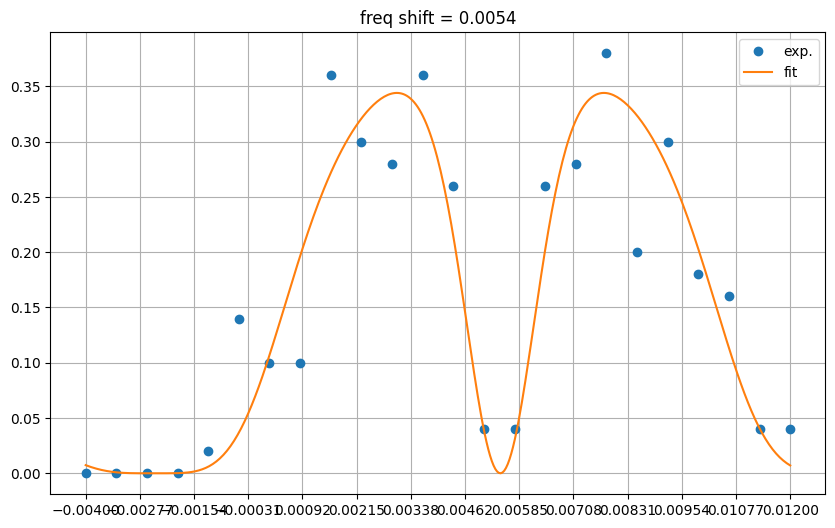

In [69]:
ydata = freq_ydata[0, :]
xfit = np.linspace(np.min(freq_xdata), np.max(freq_xdata), 400)
popt, pcov = curve_fit(SDF_freqscanfit, freq_xdata, ydata, p0=[np.mean(xfit)+0.0025, 0.02, 100, 35])
plt.figure(figsize=(10, 6))
plt.plot(freq_xdata, ydata, 'o', label='exp.')
plt.plot(xfit, SDF_freqscanfit(xfit, *popt), '-', label='fit')
plt.title("freq shift = %.4f"%popt[0])
plt.grid(True)
plt.xticks(np.linspace(np.min(freq_xdata), np.max(freq_xdata), 14))
plt.legend()
cal._sb_freqlist[0]-popt[0]

threshold for detection=8000, threshold for S&D=4500
repeattime=80
[268 269]
[285 286]
[302 303]
20404.675
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
[-0.0019, 0.005]
Automatically close the window
stop
repeattime=80
[267 268]
[284 285]
[301 302 303]
19186.5375
ion_num = 3
Ion displacement: [-1. -1. -1.]
repeattime=50
repeattime=50
[0.0315, 0.0398]
Automatically close the window
stop
repeattime=80
[267 268]
[284 285]
[301 302]
19011.3875
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
[0.0815, 0.0898]
Automatically close the window
stop


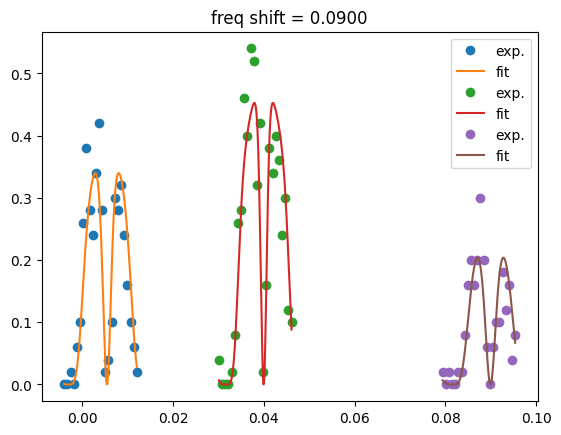

In [70]:
freq_old = cal._sb_freqlist
freq_new = []
df_list = cal._sb_freqlist[0]-np.array(cal._sb_freqlist)
cal.set_threshold(8000, 4500)
for i in range(len(df_list)):
    cal.ion_count()
    cal.set_repeattime(repeattime=50)
    freq_range = np.linspace(df_list[i]-0.004, df_list[i]+0.012, 24) 
    # freq_range = np.linspace(150, 152.5, 51) 
    rp = rtplot.Rtplot(scan_SDF_calfreq, stopfunc, xdata=list(freq_range), fileprefix="LS_gate_freq", autoRun=True)
    freq_xdata = np.array(rp.xdatadraw)
    freq_ydata = np.array(rp.ydatadraw)
    del rp
    
    ydata = freq_ydata[0, :]
    xfit = np.linspace(np.min(freq_xdata), np.max(freq_xdata), 400)
    popt, pcov = curve_fit(SDF_freqscanfit, freq_xdata, ydata, p0=[np.mean(xfit)+0.0027, 0.02, 100, 30])
    plt.plot(freq_xdata, ydata, 'o', label='exp.')
    plt.plot(xfit, SDF_freqscanfit(xfit, *popt), '-', label='fit')
    plt.title("freq shift = %.4f"%popt[0])
    plt.legend()
    freq_new.append(np.round(cal._sb_freqlist[0]-popt[0], 4))
    
cal._sb_freqlist = freq_new
files.savecalpara("SB_freq", cal._sb_freqlist, cal.calibfile)

## Multi-segment PM 2q gate

In [12]:
cal.ion_count()

repeattime=40
[254 255 256]
[271 272 273]
[289 290]
15609.475
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100


array([[255.],
       [272.],
       [289.]])

In [12]:
cal.load_calibration()

In [13]:
f_rolling = cal._sb_freqlist[1]
f_com = cal._sb_freqlist[0]
df = f_com - f_rolling

In [14]:
f_com

1.3534

In [15]:
f_rolling

1.3193

In [16]:
df

0.03410000000000002

In [17]:
nseg = 12
ramp_tau = 2
t_gate = 150
f_sdf = f_com+0.015  #MHz
f_noise = 0.0025   #MHz
ion_select = [1, 2]

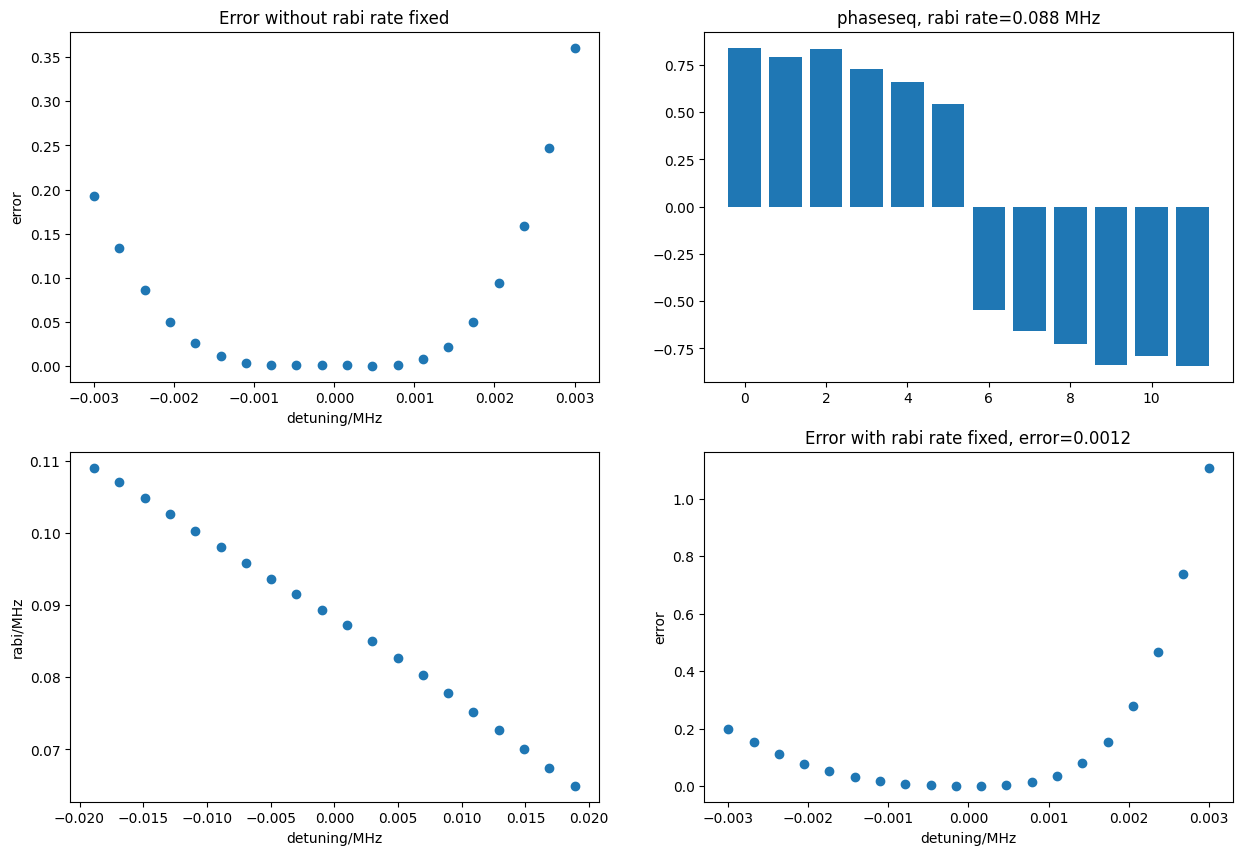

In [77]:
phaseseq = cal.PMseq_gen(f_sdf, f_noise, ion=ion_select, tau=t_gate, nseg=nseg, ramp_tau=ramp_tau, dphi=0.1, regularization=10, method='search')

In [78]:
phaseseq

array([ 0.4209 ,  0.39515,  0.4183 ,  0.36305,  0.32865,  0.27245,
       -0.27245, -0.32865, -0.36305, -0.4183 , -0.39515, -0.4209 ])

In [18]:
phaseseq = np.array([ 0.4209 ,  0.39515,  0.4183 ,  0.36305,  0.32865,  0.27245,
       -0.27245, -0.32865, -0.36305, -0.4183 , -0.39515, -0.4209 ])

In [19]:
f_list = [(cal._car_411_freqs["411_car_0"] - cal._AODfreqlist[0][0]/2, cal._car_411_freqs["411_car_0"] - cal._AODfreqlist[0][0]/2)]*nseg
p_list = [(0, 0)] *nseg
a_list = [(1 * cal._awg_amp_aom_ind1, 1 * cal._awg_amp_aom_ind2)]*nseg

# The AWG for driving the two AOMs in the individual paths
shaped_pulse_AOM = SpectrumAWG2.ModulatedShapedTwoLoopGate(f_list, a_list, p_list, cal.awg_spectrum_aom)

shaped_pulse_AOM.t_off_before = 20 # Wait until the AOD finishes frequency shifting

# Configure the idle for the AOM Spectrum
shaped_pulse_AOM.waveform_idle1 = []
shaped_pulse_AOM.waveform_idle2 = []
# shaped_pulse_AOM.add_pulse_to_idle(cal.f_aom_idle, cal._awg_amp_aom_ind1, 0,
#                                    cal.f_aom_idle, cal._awg_amp_aom_ind2, 0, cal.t_aom_idle)

shaped_pulse_AOM.add_pulse_to_idle(cal.f_aom_idle, 0, 0,
                                   cal.f_aom_idle, 0, 0, cal.t_aom_idle)

shaped_pulse_AOM.update_idle()

shaped_pulse_AOM.t_shape = ramp_tau

In [20]:
start_time = datetime.datetime.now()
# cal._amp_aod_ind1 = 0.5
# cal._amp_aod_ind2 = 0.5
phase_opt = -0.013
cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
# cal.update_AOD(ion=[0], phases1=[0.0], phases2=[0])

print(datetime.datetime.now() - start_time)

0:00:01.243202


In [21]:
start_time = datetime.datetime.now()

cal._sbc_cycle = 60
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)

t_margin = 3 # The safe margin between pulses to avoid overlapping of pulses due to timing uncertainty

# Use Spectrum AWG to drive the AOMs
seq = ["Laser411i1(%.2f)"%cal.T_AWG_TRIG, "AOD1(20.5)", "free(%.2f)"%shaped_pulse_AOM.t_off_before]  + cal.MW_seq(profile=0, t=0.5)
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 1st SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=1) 
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 2nd SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=0.5)

# seq_2q = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1)
seq_2q = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)
# 
print(datetime.datetime.now() - start_time)

0:03:59.440781


In [22]:
cal.ion_count()
cal.set_threshold(detectionthr=8000, coolingthr=4500)
cal.set_370_amp_coolingdet()

cal.set_repeattime(repeattime=100)

amp_factor = 0.3

shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
shaped_pulse_AOM.a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)] * nseg


shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it

repeattime=40
[254 255]
[271 272 273]
[288 289 290]
15530.8
ion_num = 3
Ion displacement: [-1.  0.  0.]
repeattime=100
threshold for detection=8000, threshold for S&D=4500
repeattime=100


In [ ]:
shaped_pulse_AOM.p_list

### Scan the SDF frequency

In [ ]:
f_sdf

In [161]:
cal.ion_count()

repeattime=80
[253 254]
[270 271]
[287 288]
17096.65
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50


array([[253.],
       [270.],
       [287.]])

In [119]:
amp_factor = 0.35
print(t_gate)

shaped_pulse_AOM.t_shape = ramp_tau
freq_range = list(np.linspace(f_sdf-0.004, f_sdf+0.004, 13))

cal.ion_count()
def scan_SDF_freq(f_sdf):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.periodic_cal(tcal1, tcal2)
    
    cal.t_aod_total = 2 * t_gate + 200
    
    
    shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
    shaped_pulse_AOM.a_list = [(amp_factor, amp_factor)] * nseg
    

    shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it

    shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    
    cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
    # cal.update_AOD(ion=[0], phases1=[0.0], phases2=[0])
    # print("AOD done")
    
    shaped_pulse_AOM.update_time(t_gate)
    shaped_pulse_AOM.load_sequence()
    
    cal.seq.scanValue = t_gate
    
    image = cal._runseq(Seq=seq_2q)
    state, thrrawdata = cal._correlationdetect(image, ion=ion_select)

    return state, thrrawdata

rp = rtplot.Rtplot(scan_SDF_freq, stopfunc, xdata= freq_range, fileprefix="PM_frequency")
pop_data = np.array(rp.ydatadraw)
sdf_freq_data = np.array(rp.xdatadraw)
del rp

150
repeattime=40
[254 255]
[271 272]
[288 289]
15384.8
ion_num = 3
Ion displacement: [-1. -1. -1.]
repeattime=50
stop


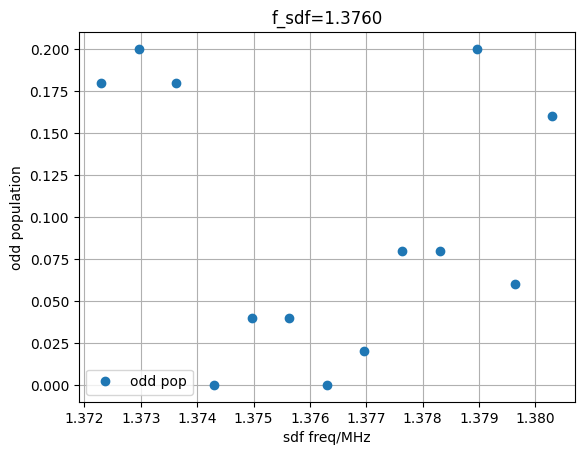

In [120]:
def moving_average(data, n=2):  # n the order of the moving average function, n=1 means the averaging over the two adjacent nun 
    data_new = data[n:]
    for i in range(n):
        data_new = data_new + data[n-i-1:-i-1]
    
    return data_new/(n+1)

threshold_oddpop = 0.05
oddpop_data = pop_data[1, :]+pop_data[2, :]

oddpop_avg = moving_average(oddpop_data, n=2)
freq_avg = moving_average(sdf_freq_data, n=2)

freq_flatrange = freq_avg[np.where(oddpop_avg<threshold_oddpop)[0]]
f_sdf = np.round(np.mean(freq_flatrange), 4)

plt.plot(sdf_freq_data, oddpop_data, 'o', label='odd pop')
plt.xlabel("sdf freq/MHz")
plt.ylabel("odd population")
plt.title("f_sdf=%.4f"%f_sdf)
plt.grid(True)
plt.legend()

### Scan the SDF amplitude

In [73]:
f_sdf = 1.375

In [92]:
f_sdf

1.3763

In [121]:
print(t_gate)



shaped_pulse_AOM.t_shape = ramp_tau
amp_range = list(np.linspace(0.24, 0.44, 10))

cal.ion_count()
def scan_SDF_amp(amp_factor):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.periodic_cal(tcal1, tcal2)
    
    cal.t_aod_total = 2 * t_gate + 200
    
    shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
    shaped_pulse_AOM.a_list = [(amp_factor, amp_factor)] * nseg
    

    shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it

    shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    
    cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
    # cal.update_AOD(ion=[0], phases1=[0.0], phases2=[0])
    
    shaped_pulse_AOM.update_time(t_gate)
    shaped_pulse_AOM.load_sequence()
    
    cal.seq.scanValue = t_gate
    
    image = cal._runseq(Seq=seq_2q)
    state, thrrawdata = cal._correlationdetect(image, ion=ion_select)

    return state, thrrawdata

rp = rtplot.Rtplot(scan_SDF_amp, stopfunc, xdata= amp_range, fileprefix="PM_amplitude")
amp_xdata = np.array(rp.xdatadraw)
amp_ydata = np.array(rp.ydatadraw)
del rp

150
repeattime=40
[253 254 255]
[270 271 272]
[287 288 289]
14165.425
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
stop


0.35146048682385433 0.3559547718446663


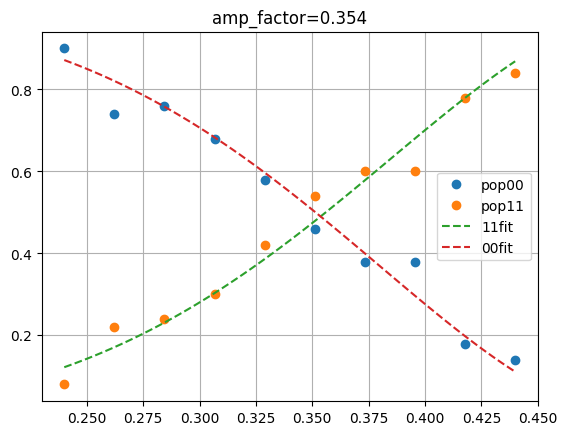

In [122]:
pop00_data = amp_ydata[0, :]
pop11_data = amp_ydata[3, :]

def sin_squared(x, A):
    return np.sin(A*x**2)**2

def cos_squared(x, A):
    return np.cos(A*x**2)**2

popt00, pcov00 = curve_fit(cos_squared, amp_xdata, pop00_data, p0=[np.pi/4/0.5**2])
popt11, pcov11 = curve_fit(sin_squared, amp_xdata, pop11_data, p0=[np.pi/4/0.5**2])

xfit  =np.linspace(np.min(amp_xdata), np.max(amp_xdata), 100)

plt.plot(amp_xdata, pop00_data, 'o', label='pop00')
plt.plot(amp_xdata, pop11_data, 'o', label='pop11')
plt.plot(xfit, sin_squared(xfit, *popt11), '--', label='11fit')
plt.plot(xfit, cos_squared(xfit, *popt00), '--', label='00fit')
amp_factor = round((np.sqrt(np.pi/4/popt00[0])+np.sqrt(np.pi/4/popt11[0]))/2, 3)
plt.title("amp_factor=%.3f"%amp_factor)
plt.grid(True)
plt.legend()

print(np.sqrt(np.pi/4/popt00[0]), np.sqrt(np.pi/4/popt11[0]))

In [144]:
print(amp_factor, f_sdf)

0.319 1.3756


In [ ]:
# amp_factor = 0.324
# f_sdf = 1.419

In [96]:
# amp_factor = 0.29
# f_sdf = 1.4318
cal.set_threshold(8000, 4500)
cal.set_repeattime(repeattime=150)
def PMyukai_2qgate(t):
    return scan_SDF_amp(amp_factor)

rp = rtplot.Rtplot(PMyukai_2qgate, stopfunc, xdata=list(np.linspace(1, 20, 10)), fileprefix="Modulated_2q_gate_pop")
pop_data = np.array(rp.ydatadraw)
del rp

print(np.mean(pop_data[0, :]+pop_data[3, :]))

threshold for detection=8000, threshold for S&D=4500
repeattime=150
repeattime=80
[267 268]
[284 285]
[301 302]
18776.7875
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=150
repeattime=80
[266 267 268]
[284 285]
[300 301 302]
18511.8375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=150
stop
0.9773333333333334


In [ ]:
print(np.mean(pop_data[0, :]+pop_data[3, :]))

In [ ]:
del rp

In [ ]:
amp_factor = 0.62
f_sdf = 1.5422

In [ ]:
f_com-0.015

### parity scan

In [69]:
seq = ["Laser411i1(%.2f)"%cal.T_AWG_TRIG, "AOD1(20.5)", "free(%.2f)"%shaped_pulse_AOM.t_off_before]  + cal.MW_seq(profile=0, t=0.5)
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 1st SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=1) 
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 2nd SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=0.5)

seq_parity = seq + ["free(1)"] + cal.MW_seq(profile=1, t=0.5)

seq_2q_parity = cal.append_shelving_sbc(seq_parity, sbc=True, shelvingdet=1, awg_reload_sbc=False)



In [ ]:
print(seq_parity)

In [37]:
cal.ion_count()

repeattime=80
[240 241 242]
[257 258 259]
[274 275 276]
16834.775
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100


array([[241.],
       [258.],
       [275.]])

In [180]:
cal.set_repeattime(repeattime=200)
print(t_gate)
cal.t_aod_total = 2 * t_gate + 200
cal.seq.scanValue = t_gate # Set the pulse time of the SDFs
shaped_pulse_AOM.update_time(t_gate)
exp_2q_parity = cal.parity_scan(profile=1, channel=cal._ch_MW, ddschoice=cal._dds_MW, seq=seq_2q_parity, ion=ion_select)
# exp_2q_parity = cal.correlation_phase_scan(profile=7, channel=2, ddschoice=1, seq=seq_2q_parity, ion=[0, 1])

# amp_factor = 0.83
# shaped_pulse_AOM.t_shape = 2
# f_sdf = 1.5917
    

def parity_scan(phase):
    # print(time.time())
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    cal.periodic_cal(tcal1, tcal2)
    
    shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + (f_sdf)/2)] * nseg
    shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
    shaped_pulse_AOM.a_list = [(amp_factor, amp_factor)] * nseg
    
    cal.t_aod_total = 2 * t_gate + 200
    cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
    
    shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it
    
    shaped_pulse_AOM.update_time(t_gate)
    shaped_pulse_AOM.load_sequence()
    
    return exp_2q_parity(phase)


phasescanrange = list(np.linspace(0, 0.08, 4))+list(np.linspace(0.1, 0.15, 5))+list(np.linspace(0.17, 0.33, 6))+list(np.linspace(0.35, 0.4, 5))+list(np.linspace(0.42, 0.5, 4))
rp = rtplot.Rtplot(parity_scan, stopfunc, xdata=phasescanrange, fitfunc=parity_sine_fit, fileprefix="LS_gate_parity")
del rp

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

repeattime=200
150
repeattime=100
[223 224 225]
[240 241 242]
[257 258 259]
15659.14
ion_num = 3
Ion displacement: [-1.  0.  0.]
repeattime=200
repeattime=100
[223 224 225]
[240 241 242]
[257 258 259]
13766.0
ion_num = 3
Ion displacement: [1. 0. 0.]
repeattime=200
repeattime=100
[223 224 225]
[240 241 242]
[257 258 259]
14255.27
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=200
repeattime=100
[223 224 225]
[240 241 242]
[257 258 259]
15347.07
ion_num = 3
Ion displacement: [-1. -1.  0.]
repeattime=200
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
246.1075882911682
ion displacement -0.6666666666666666
[143.7658, 143.2581, 142.7513] [[0.87]]
Stop at 1st point
threshold for detection=4000, threshold for S&D=4500
repeattime=200
stop


### parity scan phase fixed

In [102]:
cal.ion_count()

repeattime=80
[242 243 244]
[259 260 261]
[276 277 278]
17442.475
ion_num = 3
Ion displacement: [-1.  0. -1.]
repeattime=150


array([[242.],
       [260.],
       [276.]])

In [70]:
cal.set_repeattime(repeattime=150)
print(t_gate)
cal.seq.scanValue = t_gate # Set the pulse time of the SDFs
fixed_phase = 0.375
shaped_pulse_AOM.update_time(t_gate)
exp_2q_parity = cal.parity_scan(profile=1, channel=cal._ch_MW, ddschoice=cal._dds_MW, seq=seq_2q_parity, ion=ion_select)

def parity_scan_phase_fixed(t):
    # print(time.time())
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    
    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    cal.t_aod_total = 2 * t_gate + 200
    cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
    
    shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it
    
    shaped_pulse_AOM.a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)] * shaped_pulse_AOM.N_segments
    shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
    shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + (f_sdf)/2)]*shaped_pulse_AOM.N_segments
    
    shaped_pulse_AOM.update_time(t_gate)
    shaped_pulse_AOM.load_sequence()
    
    # shaped_pulse_AOM.update_time(t)
    cal.seq.scanValue = t_gate
    return exp_2q_parity(fixed_phase)

rp = rtplot.Rtplot(parity_scan_phase_fixed, stopfunc, xdata=list(np.linspace(1, 20, 10)), fileprefix="LS_gate_parity_phase_fixed0.375", fitfunc=Fit.parabola_up_down(max_mode=False))
print(np.mean(rp.ydatadraw))
del rp

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

repeattime=150
150
repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
17496.175
ion_num = 3
Ion displacement: [ 0.  0. -1.]
repeattime=150
repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
17045.1625
ion_num = 3
Ion displacement: [0. 0. 1.]
repeattime=150
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
241.57040452957153
ion displacement -0.3333333333333333
[143.8008, 143.2975, 142.7808] [[0.94]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=150
stop
-0.9506666666666668


In [174]:
cal.set_repeattime(repeattime=150)
print(t_gate)
cal.seq.scanValue = t_gate # Set the pulse time of the SDFs
fixed_phase = 0.125
shaped_pulse_AOM.update_time(t_gate)
exp_2q_parity = cal.parity_scan(profile=1, channel=cal._ch_MW, ddschoice=cal._dds_MW, seq=seq_2q_parity, ion=ion_select)

def parity_scan_phase_fixed(t):
    # print(time.time())
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    # cal.ion_count()
    
    # cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    cal.t_aod_total = 2 * t_gate + 200
    cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
    
    shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it
    
    shaped_pulse_AOM.a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)] * shaped_pulse_AOM.N_segments
    
    shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
    
    shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + (f_sdf)/2)]*shaped_pulse_AOM.N_segments
    
    shaped_pulse_AOM.update_time(t_gate)
    shaped_pulse_AOM.load_sequence()
    
    # shaped_pulse_AOM.update_time(t)
    cal.seq.scanValue = t_gate
    # return exp_2q_parity(0.375)
    return exp_2q_parity(fixed_phase)


rp = rtplot.Rtplot(parity_scan_phase_fixed, stopfunc, xdata=list(np.linspace(1, 20, 10)), fileprefix="LS_gate_parity_phase_fixed0.125", fitfunc=Fit.parabola_up_down(max_mode=False))
print(np.mean(rp.ydatadraw))
del rp

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

repeattime=150
150
stop
0.9920000000000002


In [73]:
cal.ion_count()

repeattime=80
[251 252 253]
[268 269 270]
[285 286 287]
15897.1
ion_num = 3
Ion displacement: [1. 0. 0.]
repeattime=150


array([[252.],
       [268.],
       [285.]])

### S DFS coherence without echo

In [71]:
cal.set_repeattime(50)
cal.ion_count()

repeattime=50
repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
17549.675
ion_num = 3
Ion displacement: [ 0.  0. -1.]
repeattime=50


array([[258.],
       [275.],
       [292.]])

In [38]:
t_delay = 2.6e6

seq = ["Laser411i1(%.2f)"%cal.T_AWG_TRIG, "AOD1(20.5)", "free(%.2f)"%shaped_pulse_AOM.t_off_before]  + cal.MW_seq(profile=0, t=0.5)
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 1st SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=1) 
seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 2nd SDF pulse, with t_margin before and after it
seq = seq + cal.MW_seq(profile=0, t=0.5)

seq_DFS = seq + ["free(1)"] + cal.MW_seq(profile=1, t=0.5) + ["freeMWp1(1)", "freeMWp3(%.1f)"%t_delay] + cal.MW_seq(profile=2, t=0.5)

seq_2q_DFS = cal.append_shelving_sbc(seq_DFS, sbc=True, shelvingdet=1, awg_reload_sbc=False)

In [ ]:
## Analysis Pulse with Random Phase

year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "S_DFS_1900\\"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

print(t_gate)
cal.seq.scanValue = t_gate # Set the pulse time of the SDFs
shaped_pulse_AOM.update_time(t_gate)
exp_2q_DFS = cal.parity_scan(profile=2, channel=cal._ch_MW, ddschoice=cal._dds_MW, seq=seq_2q_DFS, ion=ion_select)

def S_DFS_exp(phase):
    # t0 = time.time()
    # cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    # cal.ion_count()
    
    # cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    # cal.t_aod_total = 2 * t_gate + 200
    # cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
    
    # shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    # shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    # shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it
    
    # shaped_pulse_AOM.a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)] * shaped_pulse_AOM.N_segments
    
    # shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
    
    # shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + (f_sdf)/2)]*shaped_pulse_AOM.N_segments
    
    # shaped_pulse_AOM.update_time(t_gate)
    # shaped_pulse_AOM.load_sequence()
    
    cal.set_ddsphase(phase=0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

    # print(time.time()-t0)

    # shaped_pulse_AOM.update_time(t)
    cal.seq.scanValue = t_gate
    # rand_phase = np.random.rand()
    # return exp_2q_parity(0.375)
    time.sleep(0.2)
    

    return exp_2q_DFS(phase)

cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
# Re-configure the AOM frequencies, in case the AOD frequencies are updated.
cal.t_aod_total = 2 * t_gate + 200
cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])

shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it

shaped_pulse_AOM.a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)] * shaped_pulse_AOM.N_segments

shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]

shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + (f_sdf)/2)]*shaped_pulse_AOM.N_segments

shaped_pulse_AOM.update_time(t_gate)
shaped_pulse_AOM.load_sequence()



cal.set_repeattime(1)
rp = rtplot.Rtplot(S_DFS_exp, stopfunc, xdata=list(np.random.rand(50)), fileprefix="S DFS oscillation")
print(np.mean(rp.ydatadraw))

datafolder = rp.folder
print(datafolder)
del rp

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

time_now = time.strftime("%H-%M-%S")
shutil.copytree(datafolder[:-1], folder + time_now + "_t=%d"%t_delay)
cal.set_repeattime(50)

150
repeattime=1
stop
0.6
E:\PyPrograms\210sequencer\data\202504\0407\12-36-54_S DFS oscillation\
repeattime=50


In [43]:
## scan t; Analysis pulse with determined phase
print(t_gate)
cal.seq.scanValue = t_gate # Set the pulse time of the SDFs
shaped_pulse_AOM.update_time(t_gate)
exp_2q_DFS = cal.parity_scan(profile=2, channel=cal._ch_MW, ddschoice=cal._dds_MW, seq=seq_2q_DFS, ion=ion_select)

def S_DFS_tscan(t_delay):
    # t0 = time.time()
    print(t_delay)
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    cal.ion_count()
    
    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    cal.t_aod_total = 2 * t_gate + 200
    cal.update_AOD(ion=ion_select, phases1=[0.0, phase_opt], phases2=[0, 0])
    
    shaped_pulse_AOM.t_off = cal.t_aod_total - t_gate - shaped_pulse_AOM.t_off_before + 20
    shaped_pulse_AOM.t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin # Delay the 1st SDF pulse by the MW pi/2 time, plus an extra safe margin
    shaped_pulse_AOM.t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin # Delay the 2nd SDF pulse by the MW pi time, plus safe margins before and after it
    
    shaped_pulse_AOM.a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)] * shaped_pulse_AOM.N_segments
    
    shaped_pulse_AOM.p_list = [(0, _) for _ in phaseseq]
    
    shaped_pulse_AOM.f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + (f_sdf)/2)]*shaped_pulse_AOM.N_segments
    
    shaped_pulse_AOM.update_time(t_gate)
    shaped_pulse_AOM.load_sequence()
    seq = ["Laser411i1(%.2f)"%cal.T_AWG_TRIG, "AOD1(20.5)", "free(%.2f)"%shaped_pulse_AOM.t_off_before]  + cal.MW_seq(profile=0, t=0.5)
    seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 1st SDF pulse, with t_margin before and after it
    seq = seq + cal.MW_seq(profile=0, t=1) 
    seq = seq + ["free(%.2f)"%t_margin, "*free(0.5)", "free(%.2f)"%t_margin] # idle during the 2nd SDF pulse, with t_margin before and after it
    seq = seq + cal.MW_seq(profile=0, t=0.5)

    seq_DFS = seq + ["free(1)"] + cal.MW_seq(profile=1, t=0.5) + ["freeMWp1(1)", "freeMWp3(%.1f)"%t_delay] + cal.MW_seq(profile=2, t=0.5)

    seq_2q_DFS = cal.append_shelving_sbc(seq_DFS, sbc=True, shelvingdet=1, awg_reload_sbc=False)

    exp_2q_DFS = cal.parity_scan(profile=2, channel=cal._ch_MW, ddschoice=cal._dds_MW, seq=seq_2q_DFS, ion=ion_select)
    
    cal.set_ddsphase(phase=0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

    # print(time.time()-t0)

    # shaped_pulse_AOM.update_time(t)
    cal.seq.scanValue = t_gate
    # rand_phase = np.random.rand()
    # return exp_2q_parity(0.375)
    # time.sleep(0.2)
    

    return exp_2q_DFS(0)

    




cal.set_repeattime(50)
rp = rtplot.Rtplot(S_DFS_tscan, stopfunc, xdata=list(np.linspace(4.8e6, 5.4e6, 3)), fileprefix="S DFS oscillation")
del rp

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

150
repeattime=50
4800000.0
repeattime=80
[241 242]
[258 259]
[275 276 277]
17498.0
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
5100000.0
repeattime=80
[241 242]
[258 259]
[275 276]
17561.6375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=80
[240 241 242]
[257 258 259]
[274 275 276]
17827.9625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
402.5201630592346
ion displacement 0.0
[143.7385, 143.2283, 142.7226] [[0.9]]
Stop at 1st point
repeattime=80
[241 242]
[258 259]
[275 276]
17502.55
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
399.8232762813568
ion displacement 0.0
[143.7385, 143.2283, 142.7226] [[0.86]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
5400000.0
repeattime=80
[240 241 242]
[257 258 259]
[274 275 276]
17787.88

## DFS 00-i11 convert to F state(update AWG)

In [ ]:
# Seq: Doppler cooling - 2qgate - D excitation for sided ion - S to F conversion - delay - F to S conversion - Microwave - detection

In [23]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"2qgate", 2:"ShapedPulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aod)

In [ ]:
# amp_factor = 0.354
# f_sdf = 1.376
print(amp_factor, f_sdf)

0.354 1.376


In [25]:
ion_select = [1, 2]

In [26]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin


# nseg = 15
# f_sdf = 1.6
f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
p_list = [(0, _) for _ in phaseseq]
a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)]*nseg


amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0


# amp2_AOM1 = 0.0
# amp2_AOM2 = 0.11
# freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
# freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
# phase2_AOM1 = 0
# phase2_AOM2 = 0


amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
phaselist1_AOD1 = [0, phase_opt]
phaselist1_AOD2 = [0, 0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]

# amplist3_AOD1 = [cal._amp_aod_ind1]
# amplist3_AOD2 = [cal._amp_aod_ind2]
# freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
# freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
# phaselist3_AOD1 = [0]
# phaselist3_AOD2 = [0]


Multi_pulses_AOM.Block_params[1] = {
                                    "N_segments":nseg,
                                    "a_list": a_list,
                                    "f_list": f_list,
                                    "p_list": p_list,
                                    "t": t_gate,
                                    "t_shape": t_shape,
                                    "t_delay1": t_delay1,
                                    "t_delay2": t_delay2,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

# Multi_pulses_AOM.Block_params[3] = {
#                                     "amp1": amp2_AOM1,
#                                     "amp2": amp2_AOM2,
#                                     "freq1": freq2_AOM1,
#                                     "freq2": freq2_AOM2,
#                                     "phase1": phase2_AOM1,
#                                     "phase2": phase2_AOM2,
#                                     "theta": np.pi,
#                                     "pi_time": t_Dexcitation,
#                                     "t_off": t_off,
#                                     "t_off_before": t_off_before
#                                     }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_gate_AOD
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

# Multi_pulses_AOD.Block_params[3] = {
#                                     "amp1": amplist3_AOD1,
#                                     "amp2": amplist3_AOD2,
#                                     "freq1": freqlist3_AOD1,
#                                     "freq2": freqlist3_AOD2,
#                                     "phase1": phaselist3_AOD1,
#                                     "phase2": phaselist3_AOD2,
#                                     "t": t_Dexcitation_AOD
#                                     }

In [27]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

### 00-i11 fidelity

In [42]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

#parity

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5)

#population
# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       ["free(5)"]     

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)

In [145]:
print(seq)

['Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'Microwave0(15.06)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(30.13)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(15.06)', 'free(20.00)', 'Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'free(1.00)', 'free(20.00)', 'freeMWp1(1)', 'Microwave1(15.04)']


In [43]:
def DFS_0011_fidelity(phase):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(phase, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    
    # cal.seq.scanValue = t

    # image = cal._runseq(Seq=seq_DFS)
    # t0 = time.time()
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=1)
    # state, thrrawdata = cal._detectstateall(image)
    # t0 = time.time()
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    # np.save(folder+"DFSconv_%d_%s.npy"%(t/1e6, time_now), image)
    # print(time.time()-t0)

    
    return state, thrrawdata

In [44]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_0011_fidelity, stopfunc, xdata=list(np.linspace(0, 1, 10)), fileprefix="DFS 01+10 fidelity MW_analysis")
pop_data_DFS = np.array(rp.ydatadraw)
path = rp.RawdataPath
del rp

print(np.mean(pop_data_DFS[0, :]+pop_data_DFS[3, :]))
print(np.mean(pop_data_DFS[0, :]))
print(np.mean(pop_data_DFS[3, :]))
print("the population of 00-i11 is:")
print(np.mean(pop_data_DFS[0, :]+pop_data_DFS[3, :]))

data = np.load(path, allow_pickle=True)

repeattime=40
[254 255]
[271 272]
[288 289]
16817.475
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=40
[254 255]
[271 272]
[288 289]
15751.9
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
241.64114952087402
ion displacement 0.0
[143.797, 143.2846, 142.7788] [[0.94]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
stop
0.032
0.018
0.014000000000000002
the population of 00-i11 is:
0.032


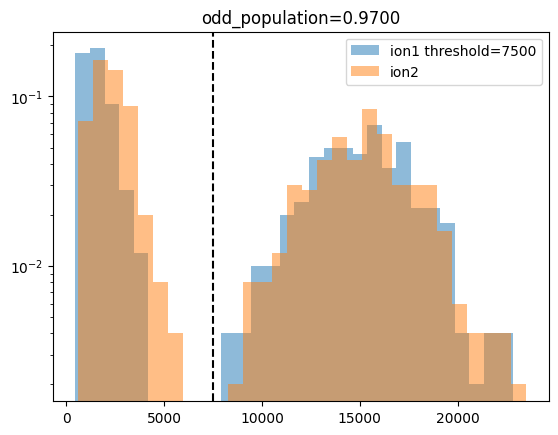

In [45]:
all_counts0 = []
all_counts1 = []
for i in range(data.shape[0]):
    all_counts0.append(list(data[i][1][1]))
    all_counts1.append(list(data[i][1][2])) # the 2nd ion
all_counts0 = np.array(all_counts0)
all_counts1 = np.array(all_counts1)
all_counts0 = all_counts0.reshape(1, -1)
all_counts1 = all_counts1.reshape(1, -1)

THRESHOLD = 7500
odd_population = np.mean(np.logical_or(np.logical_and(all_counts0>THRESHOLD,  all_counts1<THRESHOLD), np.logical_and(all_counts0<THRESHOLD,  all_counts1>THRESHOLD)))
# np.sqrt(population * (1-population)/N)

weights0 = np.ones_like(all_counts0[0]) / len(all_counts0[0])
weights1 = np.ones_like(all_counts1[0]) / len(all_counts1[0])
plt.hist(all_counts0[0], bins=30, alpha=0.5, weights=weights0, label='ion1 threshold=%d'%THRESHOLD)
plt.hist(all_counts1[0], bins=30, alpha=0.5, weights=weights1, label='ion2')
plt.yscale('log')
plt.axvline(x=THRESHOLD, color='k', linestyle='--')
plt.title("odd_population=%.4f"%odd_population)
plt.legend()
# plt.title('pumping error = %.3f' % population)

### long-time memeory with post select detect and 2 echo 00+i11 prepare on S

In [114]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"2qgate", 2:"ShapedPulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aod)

In [115]:
# amp_factor = 0.482
# f_sdf = 1.5885
print(amp_factor, f_sdf)

0.334 1.3669


In [116]:
ion_select = [1, 2]

In [117]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin


# nseg = 15
# f_sdf = 1.6
f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
p_list = [(0, _) for _ in phaseseq]
a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)]*nseg


amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0


# amp2_AOM1 = 0.0
# amp2_AOM2 = 0.11
# freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
# freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
# phase2_AOM1 = 0
# phase2_AOM2 = 0


amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
phaselist1_AOD1 = [0, phase_opt]
phaselist1_AOD2 = [0, 0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]

# amplist3_AOD1 = [cal._amp_aod_ind1]
# amplist3_AOD2 = [cal._amp_aod_ind2]
# freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
# freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
# phaselist3_AOD1 = [0]
# phaselist3_AOD2 = [0]


Multi_pulses_AOM.Block_params[1] = {
                                    "N_segments":nseg,
                                    "a_list": a_list,
                                    "f_list": f_list,
                                    "p_list": p_list,
                                    "t": t_gate,
                                    "t_shape": t_shape,
                                    "t_delay1": t_delay1,
                                    "t_delay2": t_delay2,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

# Multi_pulses_AOM.Block_params[3] = {
#                                     "amp1": amp2_AOM1,
#                                     "amp2": amp2_AOM2,
#                                     "freq1": freq2_AOM1,
#                                     "freq2": freq2_AOM2,
#                                     "phase1": phase2_AOM1,
#                                     "phase2": phase2_AOM2,
#                                     "theta": np.pi,
#                                     "pi_time": t_Dexcitation,
#                                     "t_off": t_off,
#                                     "t_off_before": t_off_before
#                                     }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_gate_AOD
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

# Multi_pulses_AOD.Block_params[3] = {
#                                     "amp1": amplist3_AOD1,
#                                     "amp2": amplist3_AOD2,
#                                     "freq1": freqlist3_AOD1,
#                                     "freq2": freqlist3_AOD2,
#                                     "phase1": phaselist3_AOD1,
#                                     "phase2": phaselist3_AOD2,
#                                     "t": t_Dexcitation_AOD
#                                     }

In [118]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

In [119]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)

delay_memory = 9e3
seq_num = 20
seq_delay = delay_memory/seq_num
print("seq delay=%.3f ms "%(seq_delay/1e3))
assert seq_delay<=8e7


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
seq_coolingdetN3432 = ["CCDN3432(155)"]
seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

postsel_seq = cal.F_shelving_postsel_seq()

# parity without 3432 shutter closed and echo

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      ["free(2)"]+\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["coolingNMWFamp03432(4000)", "free(0.5)"] +\
      cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq

# parity

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       ["free(2)"]+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
#       cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
#       ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
#       ["coolingamp03432(5000)"] + cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


# population

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       ["free(2)"]+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
#       cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
#       ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
#       ["coolingamp03432(5000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


seq_0011 = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)

# cal.MW_seq(profile=1, t=0.5) +\
# seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)
# seqSF+["Laser976(20)"]
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# ["*cooling(1000)"] + seqFS +\
#       ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\

#seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + cal.MW_F_seq(t=1) + ["*cooling(1000)"] + seqFS +\

seq delay=0.450 ms 


In [ ]:
print(len(seq_DFS))

In [124]:
cal.ion_count()

repeattime=80
[273 274]
[290 291 292]
[307 308 309]
16536.4125
ion_num = 3
Ion displacement: [-1. -1. -1.]
repeattime=80


array([[273.],
       [290.],
       [307.]])

In [120]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_folder_create = time.strftime("%H-%M-%S")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "S_00+11_coherence_Fshelving_%s\\"%time_folder_create
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def phase_scan_0011(phase):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(phase, channel=3, profile=6, ddschoice=1)
    
    
    # cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(80)
    image = cal._runseq_multi_det_inseq(Seq=seq_0011, det_time=5)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    # time_now = time.strftime("%H-%M-%S")
    phase_str = str(int(phase)).rjust(3, '0')
    # np.save(folder+"DFS_%d_%s.npy"%(delay_memory/1e3, time_now), image)
    np.save(folder+"DFS_%d_%s.npy"%(delay_memory/1e3, phase_str), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        # np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
        np.save(folder+"ion_pos_%s.npy"%phase_str, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [121]:
cal.ion_count()
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(phase_scan_0011, stopfunc, xdata=list(np.linspace(0, 180, 10)), fileprefix="0011 coherence")
del rp

repeattime=80
[264 265 266]
[281 282 283]
[298 299 300]
14596.0375
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=80
[264 265 266]
[281 282 283]
[298 299 300]
15032.4
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
270.82607650756836
ion displacement 0.0
[143.8046, 143.3005, 142.7965] [[0.83]]
Stop at 1st point
repeattime=80
[264 265 266]
[281 282 283]
[298 299 300]
15032.5375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
268.01809072494507
ion displacement 0.0
[143.8046, 143.3005, 142.7965] [[0.88]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=50
repeattime=80
[264 265 266]
[282 283]
[298 299 300]
14810.575
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=80

### long-time memeory with post select detect and 2 echo 00+i11 prepare on F

In [64]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"2qgate", 2:"ShapedPulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aod)

In [65]:
# amp_factor = 0.482
# f_sdf = 1.5885
print(amp_factor, f_sdf)

0.354 1.376


In [66]:
ion_select = [1, 2]

In [67]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin


# nseg = 15
# f_sdf = 1.6
f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
p_list = [(0, _) for _ in phaseseq]
a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)]*nseg


amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0


# amp2_AOM1 = 0.0
# amp2_AOM2 = 0.11
# freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
# freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
# phase2_AOM1 = 0
# phase2_AOM2 = 0


amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
phaselist1_AOD1 = [0, phase_opt]
phaselist1_AOD2 = [0, 0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]

# amplist3_AOD1 = [cal._amp_aod_ind1]
# amplist3_AOD2 = [cal._amp_aod_ind2]
# freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
# freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
# phaselist3_AOD1 = [0]
# phaselist3_AOD2 = [0]


Multi_pulses_AOM.Block_params[1] = {
                                    "N_segments":nseg,
                                    "a_list": a_list,
                                    "f_list": f_list,
                                    "p_list": p_list,
                                    "t": t_gate,
                                    "t_shape": t_shape,
                                    "t_delay1": t_delay1,
                                    "t_delay2": t_delay2,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

# Multi_pulses_AOM.Block_params[3] = {
#                                     "amp1": amp2_AOM1,
#                                     "amp2": amp2_AOM2,
#                                     "freq1": freq2_AOM1,
#                                     "freq2": freq2_AOM2,
#                                     "phase1": phase2_AOM1,
#                                     "phase2": phase2_AOM2,
#                                     "theta": np.pi,
#                                     "pi_time": t_Dexcitation,
#                                     "t_off": t_off,
#                                     "t_off_before": t_off_before
#                                     }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_gate_AOD
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

# Multi_pulses_AOD.Block_params[3] = {
#                                     "amp1": amplist3_AOD1,
#                                     "amp2": amplist3_AOD2,
#                                     "freq1": freqlist3_AOD1,
#                                     "freq2": freqlist3_AOD2,
#                                     "phase1": phaselist3_AOD1,
#                                     "phase2": phaselist3_AOD2,
#                                     "t": t_Dexcitation_AOD
#                                     }

In [68]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

In [69]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)

delay_memory = 100000
seq_num = 4
seq_delay = delay_memory/seq_num
print("seq delay=%.3f s "%(seq_delay/1e6))
assert seq_delay<=8e7


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
seq_coolingdetN3432 = ["CCDN3432(155)"]
seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

postsel_seq = cal.F_shelving_postsel_seq()

# parity without 3432 shutter closed and echo

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5)+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["coolingNMWFamp03432(3000)", "free(0.5)"] +\
#       cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5)+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedet(1)"] + ["symcoolingNMWFamp03432(8000)"]+ ["freedet(1)"]  +\
#       ["coolingamp03432(0.5)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq



# parity without 3432 shutter closed and with 2 echo

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5)+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["coolingNMWFamp03432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
#       cal.MW_F_seq(t=1, shutter=False, profile=0) + ["coolingNMWFamp03432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["coolingNMWFamp03432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + \
#       cal.MW_F_seq(t=1, shutter=False, profile=0) + ["coolingNMWFamp03432(%.2f)"%(seq_delay-0.5)]*(int(seq_num/4)) + ["coolingamp03432(0.5)"] +\
#       cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


# population without 3432 shutter closed and with 2 echo
# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5)+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["coolingNMWFamp03432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
#       cal.MW_F_seq(t=1, shutter=False, profile=0) + ["coolingNMWFamp03432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["coolingNMWFamp03432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + \
#       cal.MW_F_seq(t=1, shutter=False, profile=0) + ["coolingNMWFamp03432(%.2f)"%(seq_delay-0.5)]*(int(seq_num/4)) + ["coolingamp03432(0.5)"] +\
#       cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq

# parity

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5)+\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
      cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(2)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
      cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(0.5)"]+\
      ["coolingamp03432(0.5)"] + cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


# population

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5)+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
#       cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(2)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
#       cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(0.5)"]+\
#       ["coolingamp03432(0.5)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5)+\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(100000)]+ ["freedetN3432(1)"] +\
#       ["coolingamp03432(0.5)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


seq_0011 = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)

# cal.MW_seq(profile=1, t=0.5) +\
# seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)
# seqSF+["Laser976(20)"]
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# ["*cooling(1000)"] + seqFS +\
#       ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\

#seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + cal.MW_F_seq(t=1) + ["*cooling(1000)"] + seqFS +\

seq delay=0.025 s 


In [113]:
print(seq_0011[-100:])

['free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'Microwave0(14.99)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(29.97)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(14.99)', 'free(20.00)', 'Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'free(1.00)', 'free(20.00)', 'freeMWp1(1)', 'Microwave1(15.02)', 'GlobalConv2(15.40)', 'free(1)', 'Laser3432p0(2.76)', 'free(1)', 'Laser976(20)', 'CCD(155.000000)', 'ccddetcooling(1000.000000)', 'detectionfree(1000.000000)', 'MicrowaveFamp03432(2210.54)', 'coolingNMWFamp03432(1)', 'freeMWFp2(1)', 'MicrowaveFamp03432p2(2226.69)', 'CCD(155.000000)', 'ccddetcooling(1000

In [57]:
cal.ion_count()

repeattime=80
[255 256 257]
[272 273 274]
[289 290 291]
14464.8125
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50


array([[256.],
       [273.],
       [290.]])

In [ ]:
exp_DFS = cal.selectseq(seq_DFS)

In [72]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_folder_create = time.strftime("%H-%M-%S")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "F_00+11_population_Fshelving_%s\\"%time_folder_create
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def phase_scan_0011(phase):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(phase, channel=3, profile=6, ddschoice=1)
    
    
    # cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(1)
    image = cal._runseq_multi_det_inseq(Seq=seq_0011, det_time=5)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    # time_now = time.strftime("%H-%M-%S")
    phase_str = str(int(phase)).rjust(3, '0')
    np.save(folder+"DFS_%d_%s.npy"%(delay_memory/1e3, phase_str), image)
    # np.save(folder+"DFS_%d_%s.npy"%(delay_memory/1e3, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%phase_str, pos_all)
        # np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata



In [73]:
cal.ion_count()
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(phase_scan_0011, stopfunc, xdata=list(np.linspace(0, 180, 80)), fileprefix="0011 population")
del rp

repeattime=80
[255 256]
[272 273]
[289 290]
15461.2875
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=80
[254 255 256]
[271 272 273]
[288 289 290]
16008.175
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repeattime=80
[255 256]
[271 272 273]
[288 289 290]
15486.0125
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
repeattime=80
[254 255 256]
[271 272 273]
[288 289 290]
15931.0375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repeattime=80
[254 255 256]
[271 272 273]
[288 289 290]
15128.9625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=80
[254 255 256]
[271 272 273]
[289 290]
15488.05
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
242.38804841041565
ion displacement 0.6666666666666666
[143.7939, 14

In [70]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_folder_create = time.strftime("%H-%M-%S")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "F_00+11_population_Fshelving_%s\\"%time_folder_create
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def time_scan_0011(delay):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    

    phase = 90
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(phase, channel=3, profile=6, ddschoice=1)

    seq_num = 4
    seq_delay = delay/seq_num
    # parity

    # seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
    #       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
    #       cal.MW_seq(profile=1, t=0.5)+\
    #       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
    #       cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(2)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
    #       ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(0.5)"]+\
    #       ["coolingamp03432(0.5)"] + cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq
    
    # population

    seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
          cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
          cal.MW_seq(profile=1, t=0.5)+\
          seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
          cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(2)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
          ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(0.5)"]+\
          ["coolingamp03432(0.5)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq

    seq_0011 = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)
    
    # cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(1)
    image = cal._runseq_multi_det_inseq(Seq=seq_0011, det_time=5)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    np.save(folder+"DFS_%d_%s.npy"%(delay/1e3, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [71]:
cal.ion_count()
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(time_scan_0011, stopfunc, xdata=list(np.linspace(0.2e6, 0.6e6, 2))*6, fileprefix="0011_population")
del rp

repeattime=40
[254 255]
[271 272]
[288 289]
16873.6
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=40
[253 254 255]
[271 272]
[288 289]
17086.975
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repeattime=40
[253 254 255]
[270 271 272]
[288 289]
16513.25
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
repeattime=40
[253 254 255]
[271 272]
[288 289]
16835.025
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repeattime=40
[253 254 255]
[271 272]
[287 288 289]
17103.425
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
repeattime=40
[253 254 255]
[271 272]
[287 288 289]
15735.875
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repeattime=40
[253 254 255]
[270 271 272]
[287 288 289]
16775.625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
repeat

### Fast cal

In [116]:
cal.ion_count()

repeattime=40
[255 256]
[271 272 273]
[289 290]
15270.775
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50


array([[255.],
       [272.],
       [289.]])

In [19]:
cal.load_calibration()

In [117]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=0)
cal.MWpitimefinecal(3, profile=1)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[30.016068, 30.054008, 30.306105]
[30.017995, 30.106261, 30.126978]


[30.017995, 30.106261, 30.126978]

In [74]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=2)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[30.036597, 30.20428, 30.468591]


[30.036597, 30.20428, 30.468591]

In [9]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD2 calibration------")
# cal._amp_aod_ind2 = 0.5
cal.aodfreqcal(start=np.min(cal._AODfreqlist2[0]) - 0.2, stop=np.max(cal._AODfreqlist2[0]) + 0.2, route=1, tcal=tcal2, step_size=0.03)

print("----motor calibration------")
cal.motorscancal(tcal=tcal2, tolerance=0.17, ion=[0], half_range=0.015, direction=1, route=1, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=0, route=0, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=1, route=0, step_size=0.002)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
----AOD2 calibration------
----motor calibration------
cur_pos is 7.09909653
Moving to the optimal position
Moved to the optimal position
[[[7.30084845, 1750687953.6688337], [5.25796195, 1750688037.6552935]], [0, (7.09916882, 1750748332.8311636)]]
cur_pos is 7.30079062
Moving to the optimal position
Moved to the optimal position
[[(7.3004147, 1750748354.6255507), [5.25796195, 1750688037.6552935]], [0, (7.09916882, 1750748332.8311636)]]
cur_pos is 5.25788972
Moving to the optimal position
Moved to the optimal position
[[(7.3004147, 1750748354.6255507), (5.25852532, 1750748376.0902183)], [0, (7.09916882, 1750748332.8311636)]]


(0.9626, 5.25788972, True, (5.25852532, 1750748376.0902183))

In [ ]:
cal.cal_acss_pulse(route=1, ion=1, n_pulse=3)
print(cal._acss_pi2)

[1.0701]
[1.2493, 1.0701, 1.2645]


In [76]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.Conversion_freqcal()

repeattime=50
threshold for detection=8000, threshold for S&D=4500
**********!update wrong failure!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!****************************************************************************************************
**********!re align!******************************************************

In [77]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.Conversion_ampcal(ion=[1, 2])
cal.Conversion_pitimefinecal(n_pulse=3, ion=[1, 2])

repeattime=50
threshold for detection=8000, threshold for S&D=4500
[5.6568, 5.778]
0.06059999999999999
[14.773684210526314, 3.141592653589793, 59.094736842105256]
[14.773684210526314, 3.141592653589793, 59.094736842105256]
[14.773684210526314, 2.9530970943744053, 59.094736842105256]
[14.773684210526314, 3.078760800517997, 59.094736842105256]


In [ ]:
cal.cal_411_pitime(transition="411_car_p1", n_pulse=3, ion=[1, 2])

[2.1803, 2.2046]
0.012150000000000105


2.19245

In [ ]:
cal.cal_411_pitime(transition="411_car_m1", n_pulse=3, ion=[1, 2])

[2.2077, 2.2201]
0.006199999999999983


2.2138999999999998

In [187]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=1)

In [114]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=0)

In [78]:
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=0)

repeattime=50
repeattime=40
[255 256 257]
[272 273 274]
[289 290 291]
15484.425
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
[2.7919, 2.8051]
0.006599999999999939
[2.6101, 2.6135]
0.0017000000000000348


In [79]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_freqcal()

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3380.537073, 3380.537071, 3380.537064]


3380.5370693333334

In [46]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2], profile=2)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[1599.0985, 1597.827, 1604.0479]
[1600.038, 1597.6195, 1603.0843]


[1600.038, 1597.6195, 1603.0843]

In [54]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=2)
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=0)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[1568.7446120689654, 3.141592653589793, 6274.978448275861]
[1568.7446120689654, 3.141592653589793, 6274.978448275861]
[1568.7446120689654, 3.141592653589793, 6274.978448275861]
[1576.2781, 1604.7527, 1568.6988]
[1566.9836379310343, 3.141592653589793, 6267.934551724137]
[1566.9836379310343, 3.141592653589793, 6267.934551724137]
[1566.9836379310343, 3.141592653589793, 6267.934551724137]
[1552.8471, 1609.2698, 1560.0347]


[1552.8471, 1609.2698, 1560.0347]

In [47]:
#快速校准只影响后选择探测的411和3432pitime
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.set_repeattime(50)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)

repeattime=40
[254 255]
[271 272]
[288 289 290]
15821.525
ion_num = 3
Ion displacement: [0. 0. 1.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500
[5.6367, 5.7048]
0.03404999999999969
repeattime=50
[2.7337, 2.7638]
0.015050000000000008


## 0+1 physical qubit memory

In [128]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"ShapedPulse"}, seq_list=[1], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse"}, seq_list=[1], device=cal.awg_spectrum_aod)

In [129]:
ion_select = [1, 2]

In [130]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin





amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0




amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]





Multi_pulses_AOM.Block_params[1] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }




Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }



In [131]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

### 0+1 F memory

In [132]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)

delay_memory = 20000
seq_num = 4
seq_delay = delay_memory/seq_num
print("seq delay=%.3f s "%(seq_delay/1e6))
assert seq_delay<=8e7


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
seq_coolingdetN3432 = ["CCDN3432(155)"]
seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

postsel_seq = cal.F_shelving_postsel_seq()



seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      ["free(1)"]+\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
      cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(2)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
      ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(0.5)"]+\
      ["coolingamp03432(0.5)"] + cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


seq_physical = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)



seq delay=0.005 s 


In [ ]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_folder_create = time.strftime("%H-%M-%S")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "F_0+1_coherence_Fshelving_%s\\"%time_folder_create
try:
    os.mkdir(folder)
except FileExistsError:
    pass
def phase_scan_physical(phase):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    

    
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(phase, channel=3, profile=6, ddschoice=1)

    
    
    # cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(110)
    image = cal._runseq_multi_det_inseq(Seq=seq_physical, det_time=5)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    # time_now = time.strftime("%H-%M-%S")
    phase_str = str(int(phase)).rjust(3, '0')
    np.save(folder+"DFS_%d_%s.npy"%(delay_memory/1e3, phase_str), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%phase_str, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [225]:
cal.ion_count()
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(phase_scan_physical, stopfunc, xdata=list(np.linspace(0, 360, 10)), fileprefix="0+1_phase scan")
del rp

repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
17151.375
ion_num = 3
Ion displacement: [ 0. -1.  0.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
17051.275
ion_num = 3
Ion displacement: [-1.  1.  0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
346.85616302490234
ion displacement 0.6666666666666666
[143.7961, 143.2876, 142.7814] [[0.89]]
Stop at 1st point
repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
18204.2625
ion_num = 3
Ion displacement: [1. 0. 0.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
303.5493383407593
ion displacement 1.3333333333333333
[143.7961, 143.2876, 142.7814] [[0.87]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=50
repeattime=80
[258 259 260]
[275 276 277]
[292 293 294]
17553.3
ion_num = 3
Ion displacement: 

In [133]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_folder_create = time.strftime("%H-%M-%S")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "F_0+1_coherence_Fshelving_%s\\"%time_folder_create
try:
    os.mkdir(folder)
except FileExistsError:
    pass
def time_scan_physical(delay):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    

    phase = 0
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(phase, channel=3, profile=6, ddschoice=1)

    seq_num = 4
    seq_delay = delay/seq_num
    seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
            ["free(1)"]+\
            seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=0.5, shutter=False, profile=0) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
            cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(2)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
            ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(0.5)"]+\
            ["coolingamp03432(0.5)"] + cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


    seq_physical = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)
    
    # cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(22)
    image = cal._runseq_multi_det_inseq(Seq=seq_physical, det_time=5)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    np.save(folder+"DFS_%d_%s.npy"%(delay/1e3, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [134]:
cal.ion_count()
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(time_scan_physical, stopfunc, xdata=list(np.linspace(5e6, 5.2e6, 1))*5, fileprefix="0+1_phase=0_coherence")
del rp

repeattime=80
[280 281 282]
[297 298 299]
[314 315 316]
16268.3375
ion_num = 3
Ion displacement: [-1. -1. -1.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=80
[280 281 282]
[297 298 299]
[314 315 316]
16376.075
ion_num = 3
Ion displacement: [-1.  0.  0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
356.1983835697174
ion displacement -1.3333333333333333
[143.8147, 143.3077, 142.7959] [[0.92]]
Stop at 1st point
repeattime=80
[280 281 282]
[297 298 299]
[314 315 316]
16797.85
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
353.47234988212585
ion displacement -1.3333333333333333
[143.8147, 143.3077, 142.7959] [[0.89]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=50
repeattime=80
[280 281 282]
[297 298 299]
[314 315 316]
16963.925
ion_num = 3
Ion displacemen

### Fast cal

In [116]:
cal.ion_count()

repeattime=80
[280 281 282]
[297 298 299]
[314 315 316]
16829.75
ion_num = 3
Ion displacement: [1. 1. 0.]
repeattime=50


array([[281.],
       [298.],
       [315.]])

In [ ]:
cal.load_calibration()

In [23]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=0)
cal.MWpitimefinecal(3, profile=1)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[30.044798, 30.048069, 30.192781]
[30.049111, 30.103951, 30.234613]


[30.049111, 30.103951, 30.234613]

In [ ]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=2)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[29.881725, 30.04997, 30.109101]


[29.881725, 30.04997, 30.109101]

In [43]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD2 calibration------")
# cal._amp_aod_ind2 = 0.5
cal.aodfreqcal(start=np.min(cal._AODfreqlist2[0]) - 0.2, stop=np.max(cal._AODfreqlist2[0]) + 0.2, route=1, tcal=tcal2, step_size=0.03)

print("----motor calibration------")
cal.motorscancal(tcal=tcal2, tolerance=0.17, ion=[0], half_range=0.015, direction=1, route=1, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=0, route=0, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=1, route=0, step_size=0.002)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
----AOD2 calibration------
----motor calibration------
cur_pos is 7.10087486
Moving to the optimal position
Moved to the optimal position
[[(7.28803831, 1744802443.739352), (5.25651741, 1744803549.570292)], [0, (7.10009413, 1744804348.077085)]]
cur_pos is 7.28798048
Moving to the optimal position
Moved to the optimal position
[[(7.2893974, 1744804370.093915), (5.25651741, 1744803549.570292)], [0, (7.10009413, 1744804348.077085)]]
cur_pos is 5.25648852
Moving to the optimal position
Moved to the optimal position
[[(7.2893974, 1744804370.093915), (5.25673409, 1744804391.7857652)], [0, (7.10009413, 1744804348.077085)]]


(0.8966, 5.25648852, True, (5.25673409, 1744804391.7857652))

In [ ]:
cal.cal_acss_pulse(route=1, ion=1, n_pulse=3)
print(cal._acss_pi2)

[1.0701]
[1.2493, 1.0701, 1.2645]


In [25]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.Conversion_freqcal()

repeattime=50
threshold for detection=8000, threshold for S&D=4500


In [26]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.Conversion_ampcal(ion=[1, 2])
cal.Conversion_pitimefinecal(n_pulse=3, ion=[1, 2])

repeattime=50
threshold for detection=8000, threshold for S&D=4500
[5.1468, 5.1367]
0.005049999999999777
[12.073684210526315, 3.141592653589793, 48.29473684210526]
[24.14736842105263, 3.141592653589793, 96.58947368421052]
[12.073684210526315, 3.141592653589793, 48.29473684210526]
[12.073684210526315, 3.015928947446201, 48.29473684210526]


In [ ]:
cal.cal_411_pitime(transition="411_car_p1", n_pulse=3, ion=[1, 2])

[2.1803, 2.2046]
0.012150000000000105


2.19245

In [ ]:
cal.cal_411_pitime(transition="411_car_m1", n_pulse=3, ion=[1, 2])

[2.2077, 2.2201]
0.006199999999999983


2.2138999999999998

In [27]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=1)

In [ ]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=0)

In [28]:
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=0)

repeattime=50
repeattime=80
[269 270 271]
[286 287 288]
[303 304 305]
16404.4875
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
[2.7659, 2.7704]
0.0022500000000000853
[2.5476, 2.5723]
0.012349999999999861


In [135]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_freqcal()

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3380.537067, 3380.537066, 3380.537074]


3380.537069

In [136]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2], profile=2)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[2046.5077, 2052.9823, 2056.7715]
[2059.2559, 2061.5706, 2060.03]


[2059.2559, 2061.5706, 2060.03]

In [55]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=2)
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=0)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[2275.143931034482, 3.141592653589793, 9100.575724137929]
[2275.143931034482, 3.141592653589793, 9100.575724137929]
[2275.143931034482, 3.141592653589793, 9100.575724137929]
[2121.7542, 2074.955, 2072.3703]
[2268.6893275862067, 3.141592653589793, 9074.757310344827]
[2268.6893275862067, 3.141592653589793, 9074.757310344827]
[2268.6893275862067, 3.141592653589793, 9074.757310344827]
[2077.9954, 2120.3677, 2107.4005]


[2077.9954, 2120.3677, 2107.4005]

In [108]:
#快速校准只影响后选择探测的411和3432pitime
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.set_repeattime(50)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)

repeattime=80
[279 280]
[296 297]
[313 314]
16737.2375
ion_num = 3
Ion displacement: [-2. -2. -2.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500
[5.1878, 5.3372]
0.07469999999999999
repeattime=50
[2.7241, 2.7427]
0.009300000000000086


## DFS 01+10 convert to F state(update AWG)

In [ ]:
# Seq: Doppler cooling - 2qgate - D excitation for sided ion - S to F conversion - delay - F to S conversion - Microwave - detection

In [145]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"2qgate", 2:"ShapedPulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aod)

In [146]:
# amp_factor = 0.482
# f_sdf = 1.5885
print(amp_factor, f_sdf)

0.403 1.4197


In [147]:
ion_select = [1, 2]

In [148]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin


# nseg = 15
# f_sdf = 1.6
f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
p_list = [(0, _) for _ in phaseseq]
a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)]*nseg


amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0


# amp2_AOM1 = 0.0
# amp2_AOM2 = 0.11
# freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
# freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
# phase2_AOM1 = 0
# phase2_AOM2 = 0


amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
phaselist1_AOD1 = [0, phase_opt]
phaselist1_AOD2 = [0, 0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]

# amplist3_AOD1 = [cal._amp_aod_ind1]
# amplist3_AOD2 = [cal._amp_aod_ind2]
# freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
# freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
# phaselist3_AOD1 = [0]
# phaselist3_AOD2 = [0]


Multi_pulses_AOM.Block_params[1] = {
                                    "N_segments":nseg,
                                    "a_list": a_list,
                                    "f_list": f_list,
                                    "p_list": p_list,
                                    "t": t_gate,
                                    "t_shape": t_shape,
                                    "t_delay1": t_delay1,
                                    "t_delay2": t_delay2,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

# Multi_pulses_AOM.Block_params[3] = {
#                                     "amp1": amp2_AOM1,
#                                     "amp2": amp2_AOM2,
#                                     "freq1": freq2_AOM1,
#                                     "freq2": freq2_AOM2,
#                                     "phase1": phase2_AOM1,
#                                     "phase2": phase2_AOM2,
#                                     "theta": np.pi,
#                                     "pi_time": t_Dexcitation,
#                                     "t_off": t_off,
#                                     "t_off_before": t_off_before
#                                     }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_gate_AOD
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

# Multi_pulses_AOD.Block_params[3] = {
#                                     "amp1": amplist3_AOD1,
#                                     "amp2": amplist3_AOD2,
#                                     "freq1": freqlist3_AOD1,
#                                     "freq2": freqlist3_AOD2,
#                                     "phase1": phaselist3_AOD1,
#                                     "phase2": phaselist3_AOD2,
#                                     "t": t_Dexcitation_AOD
#                                     }

In [149]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

### 01+10 fidelity

In [164]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

#parity

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5) +\
#       ["free(5)"] + cal.MW_seq(profile=2, t=0.5)

#population
seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      ["free(5)"]     

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)

In [151]:
print(seq)

['Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'Microwave0(13.97)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(27.94)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(13.97)', 'free(20.00)', 'Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'free(1.00)', 'free(20.00)', 'freeMWp1(1)', 'Microwave1(13.98)', 'free(5)']


In [165]:
def DFS_0110_fidelity(phase):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(phase, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    
    # cal.seq.scanValue = t

    # image = cal._runseq(Seq=seq_DFS)
    # t0 = time.time()
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=1)
    # state, thrrawdata = cal._detectstateall(image)
    # t0 = time.time()
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    # np.save(folder+"DFSconv_%d_%s.npy"%(t/1e6, time_now), image)
    # print(time.time()-t0)

    
    return state, thrrawdata

In [166]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_0110_fidelity, stopfunc, xdata=list(np.linspace(0, 1, 10)), fileprefix="DFS 01+10 fidelity MW_analysis")
pop_data_DFS = np.array(rp.ydatadraw)
path = rp.RawdataPath
del rp

print(np.mean(pop_data_DFS[0, :]+pop_data_DFS[3, :]))
print(np.mean(pop_data_DFS[0, :]))
print(np.mean(pop_data_DFS[3, :]))
print("the population of 01+10 is:")
print(1-np.mean(pop_data_DFS[0, :]+pop_data_DFS[3, :]))

data = np.load(path, allow_pickle=True)

repeattime=80
[227 228 229]
[244 245 246]
[261 262 263]
17832.6375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500
1.2970952987670898
1.3107364177703857
1.302856206893921
1.4145936965942383
1.2017490863800049
1.415057897567749
1.297191858291626
1.305523157119751
1.1986746788024902
1.405958652496338
stop
0.042
0.027999999999999997
0.013999999999999999
the population of 01+10 is:
0.958


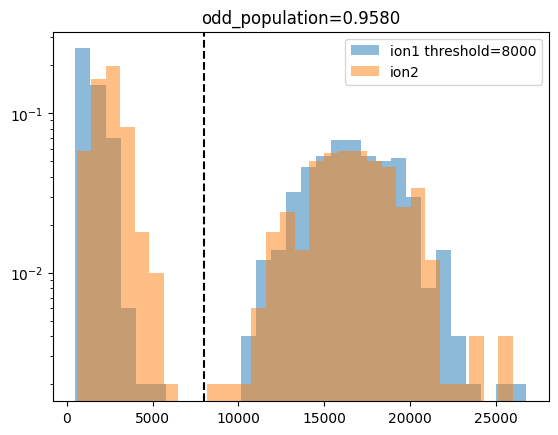

In [167]:
all_counts0 = []
all_counts1 = []
for i in range(data.shape[0]):
    all_counts0.append(list(data[i][1][1]))
    all_counts1.append(list(data[i][1][2])) # the 2nd ion
all_counts0 = np.array(all_counts0)
all_counts1 = np.array(all_counts1)
all_counts0 = all_counts0.reshape(1, -1)
all_counts1 = all_counts1.reshape(1, -1)

THRESHOLD = 8000
odd_population = np.mean(np.logical_or(np.logical_and(all_counts0>THRESHOLD,  all_counts1<THRESHOLD), np.logical_and(all_counts0<THRESHOLD,  all_counts1>THRESHOLD)))
# np.sqrt(population * (1-population)/N)

weights0 = np.ones_like(all_counts0[0]) / len(all_counts0[0])
weights1 = np.ones_like(all_counts1[0]) / len(all_counts1[0])
plt.hist(all_counts0[0], bins=30, alpha=0.5, weights=weights0, label='ion1 threshold=%d'%THRESHOLD)
plt.hist(all_counts1[0], bins=30, alpha=0.5, weights=weights1, label='ion2')
plt.yscale('log')
plt.axvline(x=THRESHOLD, color='k', linestyle='--')
plt.title("odd_population=%.4f"%odd_population)
plt.legend()
# plt.title('pumping error = %.3f' % population)

### 01+10 coherence

In [ ]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() +  ["*coolingN3432(1000)"] + cal.MW_F_seq(t=0.5, shutter=True) + ["free(5000)"] #seqFS +\
#["free(5)"] + cal.MW_seq(profile=0, t=0.5)
      

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=3, awg_reload_sbc=False)

# cal.MW_seq(profile=1, t=0.5) +\
# seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)
# seqSF+["Laser976(20)"]
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# ["*cooling(1000)"] + seqFS +\
#       ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\

#seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + cal.MW_F_seq(t=1) + ["*cooling(1000)"] + seqFS +\
# ["coolingN3432(%.2f)"%(8e7)]*4 + 

In [ ]:
print(len(seq_DFS))

In [84]:
cal.ion_count()

repeattime=80
[230 231 232 233]
[247 248 249 250]
[264 265 266 267]
14119.95
ion_num = 3
repeattime=50


array([[231.],
       [248.],
       [265.]])

In [ ]:
exp_DFS = cal.selectseq(seq_DFS)

In [ ]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")

# folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS_coherence_short\\"
# folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01+10_conversion\\"
folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01+10_conversion_Fshelving\\"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_time_scan(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    
    cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(50)
    
    # image = cal._runseq(Seq=seq_DFS)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=2)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    np.save(folder+"DFS_%d_%s.npy"%(t/1e6, time_now), image)
    # np.save(folder+"DFSconv_%d_%s.npy"%(t/1e6, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [ ]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(1e6, 1e6, 5)), fileprefix="DFS coherence")
# rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(5e7, 5e7, 3)), fileprefix="DFSconv")
pop_data_DFS = np.array(rp.ydatadraw)
del rp

In [ ]:
cal.ion_count()

In [ ]:
pos_all = np.array([[200, 215., 229., 245.], [201, 217, 231, 246]])
np.save("E:\\PyPrograms\\210sequencer\\data\\202409\\0926\\DFS_coherence_short\\ion_pos_22-07-01.npy", pos_all)

### long-time memeory with post select detect and 2 echo

In [156]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"2qgate", 2:"ShapedPulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aod)

In [157]:
# amp_factor = 0.482
# f_sdf = 1.5885
print(amp_factor, f_sdf)

0.403 1.4197


In [158]:
ion_select = [1, 2]

In [159]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin


# nseg = 15
# f_sdf = 1.6
f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
p_list = [(0, _) for _ in phaseseq]
a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)]*nseg


amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0


# amp2_AOM1 = 0.0
# amp2_AOM2 = 0.11
# freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
# freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
# phase2_AOM1 = 0
# phase2_AOM2 = 0


amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
phaselist1_AOD1 = [0, phase_opt]
phaselist1_AOD2 = [0, 0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]

# amplist3_AOD1 = [cal._amp_aod_ind1]
# amplist3_AOD2 = [cal._amp_aod_ind2]
# freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
# freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
# phaselist3_AOD1 = [0]
# phaselist3_AOD2 = [0]


Multi_pulses_AOM.Block_params[1] = {
                                    "N_segments":nseg,
                                    "a_list": a_list,
                                    "f_list": f_list,
                                    "p_list": p_list,
                                    "t": t_gate,
                                    "t_shape": t_shape,
                                    "t_delay1": t_delay1,
                                    "t_delay2": t_delay2,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

# Multi_pulses_AOM.Block_params[3] = {
#                                     "amp1": amp2_AOM1,
#                                     "amp2": amp2_AOM2,
#                                     "freq1": freq2_AOM1,
#                                     "freq2": freq2_AOM2,
#                                     "phase1": phase2_AOM1,
#                                     "phase2": phase2_AOM2,
#                                     "theta": np.pi,
#                                     "pi_time": t_Dexcitation,
#                                     "t_off": t_off,
#                                     "t_off_before": t_off_before
#                                     }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_gate_AOD
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

# Multi_pulses_AOD.Block_params[3] = {
#                                     "amp1": amplist3_AOD1,
#                                     "amp2": amplist3_AOD2,
#                                     "freq1": freqlist3_AOD1,
#                                     "freq2": freqlist3_AOD2,
#                                     "phase1": phaselist3_AOD1,
#                                     "phase2": phaselist3_AOD2,
#                                     "t": t_Dexcitation_AOD
#                                     }

In [160]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

In [161]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)

delay_memory = 1e6
seq_num = 20
seq_delay = delay_memory/seq_num
print("seq delay=%.3f s "%(seq_delay/1e6))
assert seq_delay<=8e7


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
seq_coolingdetN3432 = ["CCDN3432(155)"]
seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

postsel_seq = cal.F_shelving_postsel_seq()

# parity

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5) +\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
#       cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
#       ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
#       ["coolingamp03432(5000)"] + cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


# population

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
      cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
      ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
      ["coolingamp03432(5000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq


seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)

# cal.MW_seq(profile=1, t=0.5) +\
# seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)
# seqSF+["Laser976(20)"]
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# ["*cooling(1000)"] + seqFS +\
#       ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\

#seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + cal.MW_F_seq(t=1) + ["*cooling(1000)"] + seqFS +\

seq delay=0.050 s 


In [ ]:
print(len(seq_DFS))

In [200]:
cal.ion_count()

repeattime=80
[226 227]
[243 244]
[260 261]
18945.075
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50


array([[226.],
       [243.],
       [260.]])

In [ ]:
exp_DFS = cal.selectseq(seq_DFS)

In [162]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_folder_create = time.strftime("%H-%M-%S")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01+10_coherence_Fshelving_%s\\"%time_folder_create
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_time_scan(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    # cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(360*np.random.rand(), channel=3, profile=6, ddschoice=1)
    
    
    cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(1)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=5)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    np.save(folder+"DFS_%d_%s.npy"%(delay_memory/1e6, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [163]:
cal.ion_count()
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(1, 50, 50)), fileprefix="DFS coherence")
del rp

repeattime=80
[227 228 229]
[244 245 246]
[261 262 263]
17449.475
ion_num = 3
Ion displacement: [1. 0. 1.]
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=80
[227 228 229]
[244 245 246]
[261 262 263]
18195.3375
ion_num = 3
Ion displacement: [ 0.  1. -1.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
299.0399024486542
ion displacement 0.3333333333333333
[143.7348, 143.2323, 142.7297] [[0.83]]
Stop at 1st point
repeattime=80
[227 228 229]
[244 245 246]
[261 262 263]
17565.4
ion_num = 3
Ion displacement: [ 0. -1.  1.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
296.2276351451874
ion displacement 0.6666666666666666
[143.7348, 143.2323, 142.7297] [[0.87]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=50
repeattime=80
[227 228 229]
[244 245 246]
[261 262 263]
18692.475
ion_num = 3
Ion displacement: [

In [114]:
cal.ion_count()

repeattime=80
[241 242]
[258 259]
[275 276]
16984.95
ion_num = 3
Ion displacement: [1. 0. 0.]
repeattime=50


array([[241.],
       [258.],
       [275.]])

In [125]:
def calib_address():
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    # freq2_AOM1 = cal.calculate_ind_AOM_freq(220.88, route=0, ion=3)
    # freq2_AOM2 = cal.calculate_ind_AOM_freq(220.88, route=1, ion=3)
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    # freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[3]]
    # freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[3]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    # Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    # Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    # Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    # Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(360*np.random.rand(), channel=3, profile=6, ddschoice=1)

In [126]:
cal.set_repeattime(1)
for i in range(2):
    t0=time.time()
    calib_address()
    print(time.time()-t0)
    cal.runseq_video_multidet(Seq=seq_DFS, filename='DFS01+10_%d_population_Fshelving'%(delay_memory/1e6), CVIONS=False, folder_copy_name="DFS01+10_population_%d_Fshelving_video"%(delay_memory/1e6))

repeattime=1
repeattime=80
[226 227]
[243 244]
[260 261 262]
17285.875
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=1
2.129237651824951
repeattime=80
[226 227 228]
[243 244 245]
[260 261 262]
18302.3625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=1
[[1.]
 [0.]
 [0.]]
recv :SOURce:READ:IMAge:BINning 1,1
recv :SOURce:READ:IMAge:ROI 1,200,511,100
cmd :STATus:LOOP:SINGlescan ON
recv :STATus:LOOP:SINGlescan ON
threading stop
recv :STATus:LOOP:SINGlescan OFF
del rp
repeattime=80
[227 228 229]
[244 245 246]
[261 262 263]
17654.9125
ion_num = 3
Ion displacement: [2. 2. 2.]
repeattime=1
repeattime=80
[227 228 229]
[244 245 246]
[261 262 263]
17806.5625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=1
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
461.8245916366577
ion displacement 1.0
[143.7476, 143.2402, 142.7319] [[0.84]]
Stop at 1st point
repeattime=80
[227 228 229]
[245 246]
[262 263]
17933.3375
ion_num = 3
Ion displacement: [0. 0

### Fast cal

In [231]:
cal.ion_count()

repeattime=80
[242 243]
[258 259 260]
[276 277]
16077.85
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50


array([[242.],
       [259.],
       [276.]])

In [138]:
cal.load_calibration()

In [82]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=0)
cal.MWpitimefinecal(3, profile=1)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[29.882879, 29.963677, 30.109157]
[30.01148, 30.071949, 30.202322]


[30.01148, 30.071949, 30.202322]

In [22]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=2)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[15.725708, 15.727743, 15.863042]


[15.725708, 15.727743, 15.863042]

In [81]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD2 calibration------")
# cal._amp_aod_ind2 = 0.5
cal.aodfreqcal(start=np.min(cal._AODfreqlist2[0]) - 0.2, stop=np.max(cal._AODfreqlist2[0]) + 0.2, route=1, tcal=tcal2, step_size=0.03)

print("----motor calibration------")
cal.motorscancal(tcal=tcal2, tolerance=0.17, ion=[0], half_range=0.015, direction=1, route=1, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=0, route=0, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=1, route=0, step_size=0.002)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
----AOD2 calibration------
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG:0.02
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG:0.00
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG:0.00
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG:0.02
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG:0.00
time for dealing with waveform format:0.00
time for transferring the waveform to the buffer memory:0.00
time for writing the waveform into the AWG

UnboundLocalError: local variable 'yopt' referenced before assignment

In [203]:
cal.cal_acss_pulse(route=1, ion=1, n_pulse=3)
print(cal._acss_pi2)

[1.0701]
[1.2493, 1.0701, 1.2645]


In [15]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.Conversion_freqcal()

repeattime=50
threshold for detection=8000, threshold for S&D=4500


In [25]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.Conversion_ampcal(ion=[1, 2])
cal.Conversion_pitimefinecal(n_pulse=3, ion=[1, 2])

repeattime=50
threshold for detection=8000, threshold for S&D=4500
[4.718, 4.8088]
0.045399999999999885
[11.631578947368418, 3.141592653589793, 46.52631578947367]
[11.631578947368418, 3.141592653589793, 46.52631578947367]
[11.631578947368418, 3.141592653589793, 46.52631578947367]
[11.631578947368418, 3.141592653589793, 46.52631578947367]


In [20]:
cal.cal_411_pitime(transition="411_car_p1", n_pulse=3, ion=[1, 2])

[2.1803, 2.2046]
0.012150000000000105


2.19245

In [23]:
cal.cal_411_pitime(transition="411_car_m1", n_pulse=3, ion=[1, 2])

[2.2077, 2.2201]
0.006199999999999983


2.2138999999999998

In [44]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=1)

In [45]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=0)

In [46]:
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=0)

repeattime=50
repeattime=80
[268 269 270]
[286 287]
[302 303 304]
19611.6375
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
[2.8252, 2.8501]
0.01244999999999985
[2.6648, 2.7059]
0.020550000000000068


In [47]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_freqcal()

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3380.536969, 3380.536978, 3380.536979]


3380.536975333334

In [49]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])
# cal.MW_F_pitimefinecal(3, ion=[0, 1, 2], profile=2)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[4260.6173, 4275.2428, 4285.3536]


[4260.6173, 4275.2428, 4285.3536]

In [48]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
# cal.MW_F_pitimecal(ion=[0, 1, 2], profile=2)
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=0)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[5050.315655172413, 3.078760800517997, 20201.262620689653]
[5050.315655172413, 3.141592653589793, 20201.262620689653]
[5050.315655172413, 3.141592653589793, 20201.262620689653]
[4377.44, 4227.6587, 4243.4024]


[4377.44, 4227.6587, 4243.4024]

In [220]:
#快速校准只影响后选择探测的411和3432pitime
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.set_repeattime(50)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)

repeattime=80
[252 253]
[269 270]
[286 287 288]
16834.725
ion_num = 3
Ion displacement: [-1. -1. -1.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500
[4.7267, 4.8162]
0.04475000000000007
repeattime=50
[2.7409, 2.7778]
0.018450000000000077


## DFS 01-10 convert to F state

In [26]:
cal.ion_count()

repeattime=80
[228 229 230]
[245 246 247]
[262 263 264]
17689.8125
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50


array([[229.],
       [246.],
       [263.]])

In [106]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"2qgate", 2:"ShapedPulse", 3:"ShapedPulse"}, seq_list=[1, 2, 3], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse", 3:"simple_pulse"}, seq_list=[1, 2, 3], device=cal.awg_spectrum_aod)

In [119]:
# amp_factor = 0.443
# f_sdf = 1.5416
print(amp_factor, f_sdf)

0.334 1.4127


In [120]:
ion_select = [1, 2]

In [121]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before
t_acss_pi = cal._acss_pi2[1]
t_acsspi_AOD = t_acss_pi + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin


# nseg = 15
# f_sdf = 1.6
f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
p_list = [(0, _) for _ in phaseseq]
a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)]*nseg


amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0


amp2_AOM1 = 0
amp2_AOM2 = cal._awg_amp_aom_ind2
freq2_AOM1 = cal._f_aom_ind1
freq2_AOM2 = cal._f_aom_ind2
phase2_AOM1 = 0
phase2_AOM2 = 0
t_shape_acss = 0




amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
phaselist1_AOD1 = [0, phase_opt]
phaselist1_AOD2 = [0, 0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]


amplist3_AOD1 = [0]
amplist3_AOD2 = [cal._amp_aod_ind2]
freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
phaselist3_AOD1 = [0]
phaselist3_AOD2 = [0]





Multi_pulses_AOM.Block_params[1] = {
                                    "N_segments":nseg,
                                    "a_list": a_list,
                                    "f_list": f_list,
                                    "p_list": p_list,
                                    "t": t_gate,
                                    "t_shape": t_shape,
                                    "t_delay1": t_delay1,
                                    "t_delay2": t_delay2,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[3] = {
                                    "amp1": amp2_AOM1,
                                    "amp2": amp2_AOM2,
                                    "freq1": freq2_AOM1,
                                    "freq2": freq2_AOM2,
                                    "phase1": phase2_AOM1,
                                    "phase2": phase2_AOM2,
                                    "t": t_acss_pi,
                                    "t_shape": t_shape_acss,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_gate_AOD
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

Multi_pulses_AOD.Block_params[3] = {
                                    "amp1": amplist3_AOD1,
                                    "amp2": amplist3_AOD2,
                                    "freq1": freqlist3_AOD1,
                                    "freq2": freqlist3_AOD2,
                                    "phase1": phaselist3_AOD1,
                                    "phase2": phaselist3_AOD2,
                                    "t": t_acsspi_AOD
                                    }

In [122]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

### observing the rabi of 01+10 to 01-10

In [30]:
print(t_acss_pi)

1.0741


In [123]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

# parity

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5) +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=2, t=0.5)

#population

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') 




seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)


#cal.MW_seq(profile=0, t=0.5)
# seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() +  ["*coolingN3432(1000)"] + ["pumping(30)"] + ["free(5000)"] + seqFS +\
      # ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# cal.MW_seq(profile=1, t=0.5) +\
# seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)
# seqSF+["Laser976(20)"]
# ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# ["*cooling(1000)"] + seqFS +\
#       ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
# cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\

#seqSF + ["free(1)"] + ["Laser976(20)"] + ["*free(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + seqFS +\
# seqSF + ["Laser976(20)"] + ["*cooling(1000)"] + cal.MW_F_seq(t=1) + ["*cooling(1000)"] + seqFS +\
# ["coolingN3432(%.2f)"%(8e7)]*4 + 

In [179]:
print(len(seq_DFS))

1122


In [55]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")

# folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS_coherence_short\\"
folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01-10_coherence\\"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_phase_scan(phase):
    t_pi = t_acss_pi
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    freq2_AOM1 = cal._f_aom_ind1
    freq2_AOM2 = cal._f_aom_ind2
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    Multi_pulses_AOM.Block_params[3]["t"] = t_pi
    
    Multi_pulses_AOD.Block_params[3]["t"] = t_pi+t_off+t_off_before
    
    
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(phase, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
      
    
    
    cal.seq.scanValue = t_pi
#     cal.set_repeattime(50)
#     cal.ion_count()
#     pos_init = cal.ion_pos
    
#     cal.set_repeattime(7)
    
    image = cal._runseq(Seq=seq_DFS)
    # image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=2)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    
    
    return state, thrrawdata

# def DFS_time_scan(t):
#     t_pi = t
#     cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
#     # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

#     cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
#     # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
#     freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
#     freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
#     freq2_AOM1 = cal._f_aom_ind1
#     freq2_AOM2 = cal._f_aom_ind2
#     freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
#     freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
#     freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
#     freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
#     freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
#     freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    
#     f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
#     Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
#     Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
#     Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
#     Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
#     Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
#     Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
#     Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
#     Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
#     Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
#     Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
#     Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
#     Multi_pulses_AOM.Block_params[3]["t"] = t_pi
    
#     Multi_pulses_AOD.Block_params[3]["t"] = t_pi+t_off+t_off_before
    
    
    
    
    
#     Multi_pulses_AOM.set_waveform()
#     Multi_pulses_AOD.set_waveform()
#     Multi_pulses_AOM.update_segment()
#     Multi_pulses_AOD.update_segment()
    
#     Multi_pulses_AOM.load_sequence()
#     Multi_pulses_AOD.load_sequence()
    
#     cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
#     cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
#     seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#           cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#           cal.MW_seq(profile=1, t=0.5) +\
#           cal.AWG_MultiPulses_seq(t_off, t_off_before, t_pi, t_margin, scheme='simple_pulse') +\
#           cal.MW_seq(profile=0, t=0.5)
      

#     seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)
    
    
#     cal.seq.scanValue = t_pi
# #     cal.set_repeattime(50)
# #     cal.ion_count()
# #     pos_init = cal.ion_pos
    
# #     cal.set_repeattime(7)
    
#     image = cal._runseq(Seq=seq_DFS)
#     # image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=2)
#     # state, thrrawdata = cal._detectstateall(image)
#     state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
#     # time_now = time.strftime("%H-%M-%S")
#     # np.save(folder+"DFS_%d_%s.npy"%(t/1e6, time_now), image)
#     # np.save(folder+"DFSconv_%d_%s.npy"%(t/1e6, time_now), image)
#     # cal.set_repeattime(50)
#     # cal.ion_count()

#     # pos_final = cal.ion_pos
#     # try:
#     #     pos_all = np.vstack((pos_init, pos_final))
#     #     np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
#     # except:
#     #     print("ion_position can not save, check the dimension of the two pos")
#     #     print(pos_init)
#     #     print(pos_final)
    
#     return state, thrrawdata

In [56]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7000, 4500)
rp = rtplot.Rtplot(DFS_phase_scan, stopfunc, xdata=list(np.linspace(0, 1, 10)), fileprefix="DFS 01-10")
# rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(5e7, 5e7, 3)), fileprefix="DFSconv")
pop_data_DFS = np.array(rp.ydatadraw)
print(np.mean(pop_data_DFS[1, :]+pop_data_DFS[2, :]))
path = rp.RawdataPath

del rp
data = np.load(path, allow_pickle=True)

repeattime=80
[247 248 249]
[264 265 266]
[281 282 283]
16923.3875
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=1
repeattime=50
threshold for detection=7000, threshold for S&D=4500
repeattime=80
[247 248 249]
[264 265 266]
[282 283]
20427.325
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
829.0007014274597
ion displacement 1.0
[143.7898, 143.2831, 142.7703] [[0.91]]
Stop at 1st point
repeattime=80
[247 248 249]
[264 265 266]
[281 282 283]
20249.325
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
788.074747800827
ion displacement 1.0
[143.7898, 143.2831, 142.7703] [[0.87]]
Stop at 1st point
threshold for detection=7000, threshold for S&D=4500
repeattime=50
stop
0.984


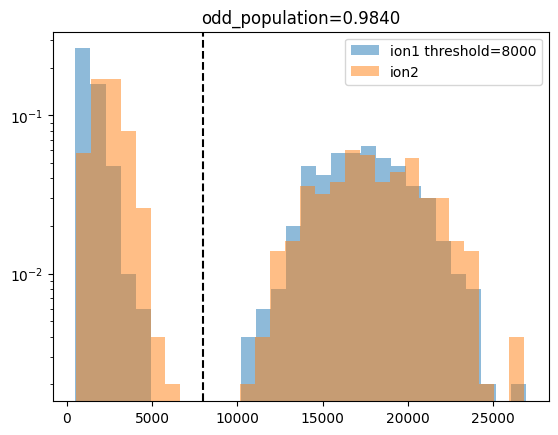

In [57]:
all_counts0 = []
all_counts1 = []
for i in range(data.shape[0]):
    all_counts0.append(list(data[i][1][1]))
    all_counts1.append(list(data[i][1][2])) # the 2nd ion
all_counts0 = np.array(all_counts0)
all_counts1 = np.array(all_counts1)
all_counts0 = all_counts0.reshape(1, -1)
all_counts1 = all_counts1.reshape(1, -1)

THRESHOLD = 8000
odd_population = np.mean(np.logical_or(np.logical_and(all_counts0>THRESHOLD,  all_counts1<THRESHOLD), np.logical_and(all_counts0<THRESHOLD,  all_counts1>THRESHOLD)))
# np.sqrt(population * (1-population)/N)

weights0 = np.ones_like(all_counts0[0]) / len(all_counts0[0])
weights1 = np.ones_like(all_counts1[0]) / len(all_counts1[0])
plt.hist(all_counts0[0], bins=30, alpha=0.5, weights=weights0, label='ion1 threshold=%d'%THRESHOLD)
plt.hist(all_counts1[0], bins=30, alpha=0.5, weights=weights1, label='ion2')
plt.yscale('log')
plt.axvline(x=THRESHOLD, color='k', linestyle='--')
plt.title("odd_population=%.4f"%odd_population)
plt.legend()
# plt.title('pumping error = %.3f' % population)

In [226]:
del rp

### Short time memory without echo 

In [ ]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

cal.set_ddsphase(0.125, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() +  ["*coolingN3432(1000)"] + ["pumping(30)"] + ["free(5000)"] + seqFS +\
      ["free(5)"] + cal.MW_seq(profile=0, t=0.5)
      

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)

In [ ]:
print(len(seq_DFS))

In [ ]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01-10_conversion\\"
# folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01-10_coherence\\"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_time_scan(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    freq2_AOM1 = cal._f_aom_ind1
    freq2_AOM2 = cal._f_aom_ind2
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.125, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    
    cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(50)
    
    # image = cal._runseq(Seq=seq_DFS)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=2)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    # np.save(folder+"DFS_%d_%s.npy"%(t/1e6, time_now), image)
    np.save(folder+"DFSconv_%d_%s.npy"%(t/1e6, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()

    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [ ]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(1e6, 1e6, 2)), fileprefix="DFS 01-10")
# rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(5e7, 5e7, 3)), fileprefix="DFSconv")
pop_data_DFS = np.array(rp.ydatadraw)
del rp

### long-time memory with 2 echo and post selection detect

In [60]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"2qgate", 2:"ShapedPulse", 3:"ShapedPulse"}, seq_list=[1, 2, 3], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse", 3:"simple_pulse"}, seq_list=[1, 2, 3], device=cal.awg_spectrum_aod)

In [61]:
# amp_factor = 0.443
# f_sdf = 1.5416
print(amp_factor, f_sdf)

0.307 1.413


In [62]:
ion_select = [1, 2]

In [63]:
t_off_before = 20
t_off = 20


# t_gate = 150
t_gate_AOD = t_gate*2 + t_off + t_off_before + np.mean(cal._MWpitimelist0)*2
t_Dexcitation = pitime_Dexcite
# t_pulse_tot = t_Dexcitation*5
# t_Dexcitation_AOD = t_pulse_tot + t_off + t_off_before
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before
t_acss_pi = cal._acss_pi2[1]
t_acsspi_AOD = t_acss_pi + t_off + t_off_before


t_shape = ramp_tau
t_margin = 3
t_delay1 = cal.T_AWG_TRIG + 0.5 * np.mean(cal._MWpitimelist0) + t_margin
t_delay2 = np.mean(cal._MWpitimelist0) + 2 * t_margin


# nseg = 15
# f_sdf = 1.6
f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
p_list = [(0, _) for _ in phaseseq]
a_list = [(amp_factor * cal._awg_amp_aom_ind1, amp_factor * cal._awg_amp_aom_ind2)]*nseg


amp1_AOM1 = car_pi_amp1
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0


amp2_AOM1 = 0
amp2_AOM2 = cal._awg_amp_aom_ind2
freq2_AOM1 = cal._f_aom_ind1
freq2_AOM2 = cal._f_aom_ind2
phase2_AOM1 = 0
phase2_AOM2 = 0
t_shape_acss = 0




amplist1_AOD1 = [cal._amp_aod_ind1/np.sqrt(2), cal._amp_aod_ind1/np.sqrt(2)]
amplist1_AOD2 = [cal._amp_aod_ind2/np.sqrt(2), cal._amp_aod_ind2/np.sqrt(2)]
freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
phaselist1_AOD1 = [0, phase_opt]
phaselist1_AOD2 = [0, 0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]


amplist3_AOD1 = [0]
amplist3_AOD2 = [cal._amp_aod_ind2]
freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
phaselist3_AOD1 = [0]
phaselist3_AOD2 = [0]





Multi_pulses_AOM.Block_params[1] = {
                                    "N_segments":nseg,
                                    "a_list": a_list,
                                    "f_list": f_list,
                                    "p_list": p_list,
                                    "t": t_gate,
                                    "t_shape": t_shape,
                                    "t_delay1": t_delay1,
                                    "t_delay2": t_delay2,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOM.Block_params[3] = {
                                    "amp1": amp2_AOM1,
                                    "amp2": amp2_AOM2,
                                    "freq1": freq2_AOM1,
                                    "freq2": freq2_AOM2,
                                    "phase1": phase2_AOM1,
                                    "phase2": phase2_AOM2,
                                    "t": t_acss_pi,
                                    "t_shape": t_shape_acss,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }

Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_gate_AOD
                                    }

Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

Multi_pulses_AOD.Block_params[3] = {
                                    "amp1": amplist3_AOD1,
                                    "amp2": amplist3_AOD2,
                                    "freq1": freqlist3_AOD1,
                                    "freq2": freqlist3_AOD2,
                                    "phase1": phaselist3_AOD1,
                                    "phase2": phaselist3_AOD2,
                                    "t": t_acsspi_AOD
                                    }

In [64]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

In [65]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)

# DFS_delay = 1e6
# N_CPMG = 5
# sub_seq_num = 2

# sub_seq_delay = DFS_delay/N_CPMG/sub_seq_num/2
# print("subseq_delay=%.2f s"%(sub_seq_delay/1e6))


# seqSF = cal.Conversion_seq(direction="S-F")
# seqFS = cal.Conversion_seq(direction="F-S")
# seq_coolingdetN3432 = ["CCDN3432(155)"]
# seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]
# echo_seq = ["coolingN3432(%.2f)"%(sub_seq_delay)]*sub_seq_num + cal.MW_F_seq(t=1, shutter=True) + ["coolingN3432(%.2f)"%(sub_seq_delay)]*sub_seq_num

# cal.set_ddsphase(0.125, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)


# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5) +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
#       seqSF + ["free(1)"] + ["Laser976(30)"] + cal.CCDcoolingdet_seq()+\
#       echo_seq * N_CPMG +\
#       ["pumping(30)"] + ["free(3500)"] + seqFS +\
#       ["free(5)"] + cal.MW_seq(profile=0, t=0.5)

delay_memory = 600e6
seq_num = 20
seq_delay = delay_memory/seq_num
print("seq delay=%.3f s "%(seq_delay/1e6))
assert seq_delay<=8e7


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
# seq_coolingdetN3432 = ["CCDN3432(155)"]
# seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]

cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

postsel_seq = cal.F_shelving_postsel_seq()

#parity

# seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5) +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
#       seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
#       cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
#       ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
#       ["coolingamp03432(5000)"] + cal.MW_F_seq(t=0.5, shutter=False, profile=2) + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq

#population

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
      cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
      ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
      ["coolingamp03432(5000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq
     

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)

seq delay=30.000 s 


In [207]:
print(seq_DFS[-140:])

['free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'free(22.800000)', 'SBCrepump(30.000000)', 'free(1.000000)', 'Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'Microwave0(14.15)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(28.31)', 'free(3.00)', 'free(150.00)', 'free(3.00)', 'Microwave0(14.15)', 'free(20.00)', 'Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'free(1.00)', 'free(20.00)', 'freeMWp1(1)', 'Microwave1(14.18)', 'Laser411i1(1.00)', 'AOD1(20.5)', 'free(20.00)', 'free(1.08)', 'free(20.00)', 'GlobalConv2(44.25)', 'fr

In [147]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_folder_create = time.strftime("%H-%M-%S")

folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01-10_population_Fshelving_%s\\"%time_folder_create
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_time_scan(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    freq2_AOM1 = cal._f_aom_ind1
    freq2_AOM2 = cal._f_aom_ind2
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(360*np.random.rand(), channel=3, profile=6, ddschoice=1)
    
    
    cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(1)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=5)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    np.save(folder+"DFS_%d_%s.npy"%(delay_memory/1e6, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [92]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7500, 4500)
rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(1, 50, 50)), fileprefix="DFS coherence")
del rp

repeattime=80
[246 247]
[263 264]
[280 281 282]
15998.3875
ion_num = 3
Ion displacement: [-2. -2. -1.]
repeattime=50
repeattime=50
threshold for detection=7500, threshold for S&D=4500
repeattime=50
repeattime=80
[246 247]
[263 264 265]
[280 281 282]
17214.325
ion_num = 3
Ion displacement: [ 0.  0. -1.]
repeattime=50
repeattime=1
repeattime=50
repeattime=80
[246 247]
[263 264]
[280 281 282]
17205.2375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
repeattime=80
[246 247]
[263 264]
[280 281 282]
17616.3625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repeattime=80
[246 247]
[263 264]
[280 281]
16933.975
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
repeattime=80
[246 247]
[263 264]
[280 281]
16684.725
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repeattime=80
[246 247]
[263 264]
[280 281]
16814.6625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
rep

In [66]:
def calib_address():
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    freq2_AOM1 = cal._f_aom_ind1
    freq2_AOM2 = cal._f_aom_ind2
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.375, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    cal.set_ddsphase(360*np.random.rand(), channel=3, profile=6, ddschoice=1)

In [68]:
cal.set_repeattime(1)
for i in range(1):
    calib_address()
    cal.runseq_video_multidet(Seq=seq_DFS, filename='DFS01-10_%d_population_Fshelving'%(delay_memory/1e6), CVIONS=False, folder_copy_name="DFS01-10_population_%d_Fshelving_video"%(delay_memory/1e6))

repeattime=1
repeattime=80
[247 248 249]
[264 265 266]
[281 282 283]
18611.4375
ion_num = 3
repeattime=1
[[1.]
 [0.]
 [0.]]
recv :SOURce:READ:IMAge:BINning 1,1
recv :SOURce:READ:IMAge:ROI 1,200,511,100
cmd :STATus:LOOP:SINGlescan ON
recv :STATus:LOOP:SINGlescan ON
threading stop
recv :STATus:LOOP:SINGlescan OFF
del rp
repeattime=80
[246 247]
[263 264]
[280 281 282]
18106.075
ion_num = 3
Ion displacement: [-1. -1. -2.]
repeattime=1


### Fast cal

In [206]:
cal.ion_count()

repeattime=40
[239 240]
[253 254]
[265 266]
[276 277 278]
[288 289 290]
[302 303 304]
10814.875
ion_num = 6
repeattime=100


array([[239.],
       [253.],
       [265.],
       [277.],
       [289.],
       [302.]])

In [22]:
cal.load_calibration()

In [113]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=0)
cal.MWpitimefinecal(3, profile=1)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[32.211426]
[32.132035]


[32.132035]

In [23]:
cal.MWpitimefinecal(3, profile=2)

[27.856134, 27.929963, 28.126781]


[27.856134, 27.929963, 28.126781]

In [20]:
cal.set_threshold(detectionthr=5000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD2 calibration------")

cal.aodfreqcal(start=np.min(cal._AODfreqlist2[0]) - 0.2, stop=np.max(cal._AODfreqlist2[0]) + 0.2, route=1, tcal=tcal2, step_size=0.03)

print("----motor calibration------")
cal.motorscancal(tcal=tcal2, tolerance=0.17, ion=[0], half_range=0.015, direction=1, route=1, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=0, route=0, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=1, route=0, step_size=0.002)

threshold for detection=5000, threshold for S&D=4500
repeattime=50
----AOD2 calibration------
----motor calibration------
cur_pos is 7.0995881
Moving to the optimal position
Moved to the optimal position
[[[7.29892549, 1748589553.2676468], [5.25877089, 1748589574.9452927]], [0, (7.1013086, 1748592594.708224)]]
cur_pos is 7.29888211
Moving to the optimal position
Moved to the optimal position
[[(7.29841944, 1748592616.6713755), [5.25877089, 1748589574.9452927]], [0, (7.1013086, 1748592594.708224)]]
cur_pos is 5.25869866
Moving to the optimal position
Moved to the optimal position
[[(7.29841944, 1748592616.6713755), (5.25673409, 1748592638.1939597)], [0, (7.1013086, 1748592594.708224)]]


(0.9, 5.25869866, True, (5.25673409, 1748592638.1939597))

In [20]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.cal_acss_pulse(route=1, ion=1, n_pulse=3)
print(cal._acss_pi2)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[1.1598]
[1.2493, 1.1598, 1.2645]


In [39]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.Conversion_freqcal()

repeattime=50
threshold for detection=8000, threshold for S&D=4500


In [ ]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.ion_count()
# cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

# cal.Conversion_ampcal(ion=[1, 2])
# cal.Conversion_pitimefinecal(n_pulse=3, ion=[1, 2])

# cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[0])

cal.Conversion_ampcal(ion=[0])
cal.Conversion_pitimefinecal(n_pulse=3, ion=[0])

repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=40
[279 280 281]
14823.8
ion_num = 1
Ion displacement: [1.]
repeattime=50
[13.249999999999998, 3.141592653589793, 52.99999999999999]
[13.249999999999998, 3.141592653589793, 52.99999999999999]


In [40]:
cal.cal_411_pitime(transition="411_car_p1", n_pulse=3, ion=[1, 2])

[1.584, 1.5959]
0.005950000000000011


1.58995

In [41]:
cal.cal_411_pitime(transition="411_car_m1", n_pulse=3, ion=[1, 2])

[2.6969, 2.6714]
0.012749999999999817


2.68415

In [19]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=1)

In [20]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=0)

In [59]:
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=0)

[2.8357, 2.8155]
0.010099999999999998
[2.629, 2.6608]
0.015900000000000025


In [23]:
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[0], state=1)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[0], state=0)

[2.4842]
0.0
[2.3342]
0.0


In [51]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_freqcal()

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3380.536956]


3380.536956

In [59]:
cal.set_threshold(7500, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])
# cal.MW_F_pitimefinecal(3, ion=[0, 1, 2], profile=2)

threshold for detection=7500, threshold for S&D=4500
repeattime=50
[3396.1779, 3400.7795, 3420.1451]


[3396.1779, 3400.7795, 3420.1451]

In [50]:
cal.set_threshold(7500, 4500)
cal.set_repeattime(50)
# cal.MW_F_pitimecal(ion=[0, 1, 2], profile=2)
# cal.MW_F_pitimecal(ion=[0, 1, 2], profile=0)
cal.MW_F_pitimecal(ion=[0], profile=0)

threshold for detection=7500, threshold for S&D=4500
repeattime=50
[1241.625879310345, 3.078760800517997, 4966.50351724138]
[1586.1959]


[1586.1959]

In [58]:
#快速校准只影响后选择探测的411和3432pitime
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7500, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.set_repeattime(50)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)

repeattime=80
[247 248 249]
[264 265 266]
[281 282 283]
18747.2625
ion_num = 3
Ion displacement: [-1.  0.  0.]
repeattime=50
repeattime=50
threshold for detection=7500, threshold for S&D=4500
[15.861, 15.3059]
0.27755000000000063
repeattime=50
[2.7302, 2.7511]
0.01045000000000007


### conversion fidelity check

In [77]:
cal.ion_count()

repeattime=100
[231 232]
[248 249]
[265 266]
17265.51
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50


array([[231.],
       [248.],
       [265.]])

In [ ]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

cal.set_ddsphase(0.125, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

seq = cal.AWG_MultiPulses_seq(t_off, t_off_before, t_gate, t_margin, scheme='2qgate') +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
      seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() +  ["*coolingamp03432(1000)"] + ["pumping(30)"] + ["free(5000)"] + seqFS +\
      ["free(5)"] + cal.MW_seq(profile=0, t=0.5)
      

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)

In [ ]:
print(len(seq_DFS))

In [ ]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")
time_now = time.strftime("%H-%M-%S")

folder0 = "E:\\PyPrograms\\210sequencer\\data\\" + "%s\\"%year_month + "%s\\"%date_now + "DFS01-10_conversion\\"
folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01-10_conversion\\"+"%s\\"%time_now 
# folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01-10_coherence\\"
try:
    os.mkdir(folder0)
except FileExistsError:
    pass
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_time_scan(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq1_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
    freq2_AOM1 = cal._f_aom_ind1
    freq2_AOM2 = cal._f_aom_ind2
    freqlist1_AOD1 = list(np.array(cal._AODfreqlist1[0])[ion_select])
    freqlist1_AOD2 = list(np.array(cal._AODfreqlist2[0])[ion_select])
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    freqlist3_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist3_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    
    f_list = [(cal._f_aom_ind1, cal._f_aom_ind2 + f_sdf/2)] * nseg
    
    Multi_pulses_AOM.Block_params[1]["f_list"] = f_list
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[3]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[3]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2
    Multi_pulses_AOD.Block_params[3]["freq1"] = freqlist3_AOD1
    Multi_pulses_AOD.Block_params[3]["freq2"] = freqlist3_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0, channel=cal._ch_MW, profile=2, ddschoice=cal._dds_MW)
    cal.set_ddsphase(0.125, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    
    cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(100)
    
    # image = cal._runseq(Seq=seq_DFS)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=2)
    state, thrrawdata = cal._detectstateall(image)
    # state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    # time_now = time.strftime("%H-%M-%S")
    # np.save(folder+"DFS_%d_%s.npy"%(t/1e6, time_now), image)
    np.save(folder+"DFSconv_%d_%s.npy"%(t/1e6, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()

    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [ ]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(100, 100, 1)), fileprefix="DFS 01-10 conversion back fidelity")
# rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(5e7, 5e7, 3)), fileprefix="DFSconv")
pop_data_DFS = np.array(rp.ydatadraw)
del rp

## DFS 10 convert to F state

In [121]:
cal.ion_count()

repeattime=80
[236 237 238]
[253 254 255]
[270 271 272]
16368.6
ion_num = 3
Ion displacement: [0. 1. 1.]
repeattime=100


array([[236.],
       [254.],
       [271.]])

In [126]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"ShapedPulse", 2:"ShapedPulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aod)

In [127]:
t_off_before = 20
t_off = 20
t_margin = 3


t_Dexcitation = pitime_Dexcite
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before
t_acss_pi = cal._acss_pi2[1]
t_acsspi_AOD = t_acss_pi + t_off + t_off_before


amp1_AOM1 = 0
amp1_AOM2 = cal._awg_amp_aom_ind2
freq1_AOM1 = cal._f_aom_ind1
freq1_AOM2 = cal._f_aom_ind2
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_acss = 0


amp2_AOM1 = car_pi_amp1
amp2_AOM2 = 0
freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase2_AOM1 = 0
phase2_AOM2 = 0
t_shape_car = 0


amplist1_AOD1 = [0]
amplist1_AOD2 = [cal._amp_aod_ind2]
freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
phaselist1_AOD1 = [0]
phaselist1_AOD2 = [0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]






Multi_pulses_AOM.Block_params[1] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_acss_pi,
                                    "t_shape": t_shape_acss,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }


Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp2_AOM1,
                                    "amp2": amp2_AOM2,
                                    "freq1": freq2_AOM1,
                                    "freq2": freq2_AOM2,
                                    "phase1": phase2_AOM1,
                                    "phase2": phase2_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }


Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_acsspi_AOD
                                    }


Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

In [128]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

### 10 fidelity

In [120]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

seq = cal.MW_seq(profile=0, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse')

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)

In [121]:
def DFS_10_fidelity(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal._f_aom_ind1
    freq1_AOM2 = cal._f_aom_ind2
    freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
   
    freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2

    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    
    cal.seq.scanValue = t
    # cal.set_repeattime(50)
    # cal.ion_count()
    # pos_init = cal.ion_pos
    
    # cal.set_repeattime(50)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=1)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    
    
    return state, thrrawdata

In [122]:
cal.ion_count()
cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_10_fidelity, stopfunc, xdata=list(np.linspace(1, 10, 10)), fileprefix="DFS 10 fidelity")
ydata = rp.ydatadraw
path = rp.RawdataPath

del rp
data = np.load(path, allow_pickle=True)

print(np.mean(ydata[1]))

repeattime=80
[231 232]
[248 249]
[265 266]
16521.5375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=100
threshold for detection=8000, threshold for S&D=4500
stop
0.9890000000000001


15029.804


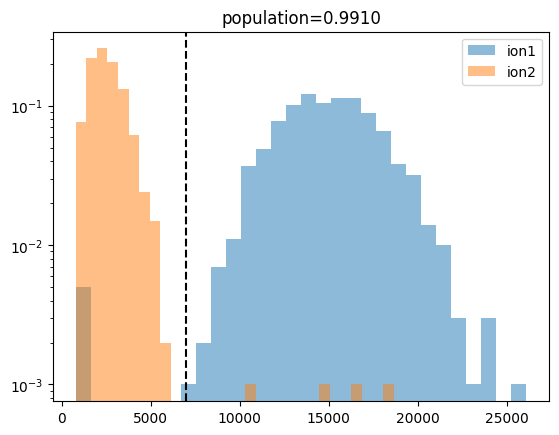

In [123]:
all_counts0 = []
all_counts1 = []
for i in range(data.shape[0]):
    all_counts0.append(list(data[i][1][1]))
    all_counts1.append(list(data[i][1][2])) # the 2nd ion
all_counts0 = np.array(all_counts0)
all_counts1 = np.array(all_counts1)
all_counts0 = all_counts0.reshape(1, -1)
all_counts1 = all_counts1.reshape(1, -1)
print(np.mean(all_counts0))

THRESHOLD = 7000
population = np.mean(np.logical_and(all_counts0 > THRESHOLD,  all_counts1 < THRESHOLD))
# np.sqrt(population * (1-population)/N)

weights0 = np.ones_like(all_counts0[0]) / len(all_counts0[0])
weights1 = np.ones_like(all_counts1[0]) / len(all_counts1[0])
plt.hist(all_counts0[0], bins=30, alpha=0.5, weights=weights0, label='ion1')
plt.hist(all_counts1[0], bins=30, alpha=0.5, weights=weights1, label='ion2')
plt.yscale('log')
plt.axvline(x=THRESHOLD, color='k', linestyle='--')
plt.title("population=%.4f"%population)
plt.legend()
# plt.title('pumping error = %.3f' % population)

In [161]:
np.mean(all_counts1 > THRESHOLD)

0.021

In [85]:
print(t_acss_pi)

0.9493


### DFS10 conversion memory

In [129]:
# DFS_delay = 1e6
# N_CPMG = 5
# sub_seq_num = 2

# sub_seq_delay = DFS_delay/N_CPMG/sub_seq_num/2
# print("subseq_delay=%.2f s"%(sub_seq_delay/1e6))


# seqSF = cal.Conversion_seq(direction="S-F")
# seqFS = cal.Conversion_seq(direction="F-S")
# echo_seq = ["coolingN3432(%.2f)"%(sub_seq_delay)]*sub_seq_num + cal.MW_F_seq(t=1, shutter=True) + ["coolingN3432(%.2f)"%(sub_seq_delay)]*sub_seq_num
# # echo_seq = ["freeShutter3432(%.2f)"%(sub_seq_delay)]*sub_seq_num + cal.MW_F_seq(t=1, shutter=True) + ["freeShutter3432(%.2f)"%(sub_seq_delay)]*sub_seq_num

# cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)


# seq = cal.MW_seq(profile=0, t=0.5) +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5) +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       seqSF + ["free(1)"] + ["Laser976(30)"] + cal.CCDcoolingdet_seq()+\
#       echo_seq * N_CPMG +\
#       ["pumping(30)"] + ["free(3500)"] +\
#       seqFS +\
#       ["free(5)"]

cal._sbc_cycle = 60
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)

delay_memory = 300e6
seq_num = 20
seq_delay = delay_memory/seq_num
print("seq delay=%.3f s "%(seq_delay/1e6))
assert seq_delay<=8e7


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
# seq_coolingdetN3432 = ["CCDN3432(155)"]
# seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

postsel_seq = cal.F_shelving_postsel_seq()


seq = cal.MW_seq(profile=0, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      ["free(1)"] + seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
      cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
      ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
      ["coolingamp03432(5000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq      

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)



seq delay=15.000 s 


In [73]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")

# folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS10_coherence_CPMG5\\"
folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS10_coherence_1_Fshelving\\"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_time_scan(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal._f_aom_ind1
    freq1_AOM2 = cal._f_aom_ind2
    freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
   
    freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2

    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    
    cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(1)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=5)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    np.save(folder+"DFS10_%d_%s.npy"%(delay_memory/1e6, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [74]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(1, 50, 50)), fileprefix="DFS coherence")
ydata = rp.ydatadraw
del rp

repeattime=80
[237 238]
[254 255]
[271 272]
18049.975
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500
repeattime=80
[237 238]
[254 255]
[271 272 273]
17736.2
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
296.97801303863525
ion displacement 1.0
[143.7688, 143.264, 142.7553] [[0.88]]
Stop at 1st point
repeattime=80
[237 238]
[254 255]
[271 272 273]
16913.1625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
294.03587079048157
ion displacement 1.0
[143.7688, 143.264, 142.7553] [[0.92]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=50
repeattime=50
repeattime=80
[237 238]
[254 255 256]
[271 272 273]
17392.95
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=1
repeattime=50
repe

In [117]:
cal.ion_count()

repeattime=80
[238 239 240]
[255 256 257]
[272 273 274]
17626.475
ion_num = 3
Ion displacement: [-1.  1. -1.]
repeattime=50


array([[238.],
       [256.],
       [272.]])

In [ ]:
np.mean(ydata[1])

In [130]:
def calib_address():
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal._f_aom_ind1
    freq1_AOM2 = cal._f_aom_ind2
    freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
   
    freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[1]]
    freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[1]]
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2

    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

In [131]:
cal.set_repeattime(1)
for i in range(1):
    calib_address()
    cal.runseq_video_multidet(Seq=seq_DFS, filename='DFS10_%d_coherence_Fshelving'%(delay_memory/1e6), CVIONS=False, folder_copy_name="DFS10_coherence_%d_Fshelving_video"%(delay_memory/1e6))

repeattime=1
repeattime=80
[232 233]
[249 250]
[266 267]
17116.1625
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=1
repeattime=80
[232 233]
[249 250]
[266 267]
17648.5125
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=1
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
255.63098621368408
ion displacement 1.0
[143.8017, 143.2913, 142.7798] [[0.84]]
Stop at 1st point
threshold for detection=8000, threshold for S&D=4500
repeattime=1
repeattime=80
[232 233]
[249 250]
[266 267]
18083.075
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=1
[[1.]
 [0.]
 [0.]]
recv :SOURce:READ:IMAge:BINning 1,1
recv :SOURce:READ:IMAge:ROI 1,200,511,100
cmd :STATus:LOOP:SINGlescan ON
recv :STATus:LOOP:SINGlescan ON
threading stop
recv :STATus:LOOP:SINGlescan OFF
del rp
repeattime=80
[230 231 232]
[247 248 249]
[265 266]
17356.3
ion_num = 3
Ion displacement: [-1. -1. -1.]
repeattime=1


### Fast cal

In [18]:
cal.ion_count()

repeattime=80
[272 273]
[289 290]
[306 307]
20948.4375
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50


array([[272.],
       [289.],
       [306.]])

In [17]:
cal.load_calibration()

In [15]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=0)
cal.MWpitimefinecal(3, profile=1)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[30.00419, 30.13606, 30.53952]
[30.257459, 30.149222, 30.326228]


[30.257459, 30.149222, 30.326228]

In [19]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD2 calibration------")
# cal._amp_aod_ind2 = 0.5
cal.aodfreqcal(start=np.min(cal._AODfreqlist2[0]) - 0.2, stop=np.max(cal._AODfreqlist2[0]) + 0.2, route=1, tcal=tcal2, step_size=0.03)

print("----motor calibration------")
cal.motorscancal(tcal=tcal2, tolerance=0.17, ion=[0], half_range=0.015, direction=1, route=1, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=0, route=0, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.015, direction=1, route=0, step_size=0.002)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
----AOD2 calibration------
fit error
fit error
fit error


Exception in thread Thread-13:
Traceback (most recent call last):
  File "c:\Python\Python39\lib\threading.py", line 954, in _bootstrap_inner
    self.run()
  File "c:\Python\Python39\lib\threading.py", line 892, in run
    self._target(*self._args, **self._kwargs)
  File "e:\PyPrograms\210sequencer\rtplot.py", line 219, in cycle
    self.startbtn.setEnabled(False)
RuntimeError: wrapped C/C++ object of type QPushButton has been deleted


: 

In [34]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.cal_acss_pulse(route=1, ion=1, n_pulse=3)
print(cal._acss_pi2)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[11.4283]
[1.2493, 11.4283, 1.1775]


In [11]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.Conversion_freqcal()

repeattime=50
threshold for detection=8000, threshold for S&D=4500


In [12]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.Conversion_ampcal(ion=[1, 2])
cal.Conversion_pitimefinecal(n_pulse=3, ion=[1, 2])

repeattime=50
threshold for detection=8000, threshold for S&D=4500
[4.6578, 4.6549]
0.0014500000000001734
[11.994736842105258, 3.141592653589793, 47.97894736842103]
[23.989473684210516, 3.141592653589793, 95.95789473684206]
[23.989473684210516, 3.141592653589793, 95.95789473684206]
[23.989473684210516, 3.141592653589793, 95.95789473684206]


In [20]:
cal.cal_411_pitime(transition="411_car_p1", n_pulse=3, ion=[1, 2])

[1.4719, 1.4798]
0.003950000000000009


1.4758499999999999

In [21]:
cal.cal_411_pitime(transition="411_car_m1", n_pulse=3, ion=[1, 2])

[1.6019, 1.5895]
0.006200000000000094


1.5957

In [27]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.7, profile=0, state=1)

In [28]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.7, profile=0, state=0)

In [29]:
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=0)

[2.8675, 2.8112]
0.02815000000000012
[2.6881, 2.6529]
0.01760000000000006


In [28]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_freqcal()

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3380.536943, 3380.536945, 3380.536951]


3380.5369463333336

In [32]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])
# cal.MW_F_pitimefinecal(3, ion=[0, 1, 2], profile=2)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3180.8708, 3199.9856, 3190.3143]


[3180.8708, 3199.9856, 3190.3143]

In [29]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
# cal.MW_F_pitimecal(ion=[0, 1, 2], profile=2)
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=0)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[2490.259862068965, 3.141592653589793, 9961.03944827586]
[2490.259862068965, 3.078760800517997, 9961.03944827586]
[2490.259862068965, 3.078760800517997, 9961.03944827586]
[3128.8119, 3185.9666, 3171.3145]


[3128.8119, 3185.9666, 3171.3145]

In [124]:
#快速校准只影响后选择探测的411和3432pitime
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.set_repeattime(50)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)

repeattime=80
[231 232]
[248 249]
[265 266 267]
18179.6625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100
repeattime=50
threshold for detection=8000, threshold for S&D=4500
[4.6548, 4.722]
0.033600000000000296
repeattime=50
[2.8319, 2.7971]
0.017400000000000082


### automatic experiment for 10 memory

## DFS 01 convert to F state

In [25]:
cal.ion_count()

repeattime=80
[230 231 232]
[247 248 249]
[264 265 266]
18128.1375
ion_num = 3
Ion displacement: [-1.  0.  0.]
repeattime=50


array([[230.],
       [248.],
       [265.]])

In [75]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"ShapedPulse", 2:"ShapedPulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse", 2:"simple_pulse"}, seq_list=[1, 2], device=cal.awg_spectrum_aod)

In [76]:
t_off_before = 20
t_off = 20
t_margin = 3


t_Dexcitation = pitime_Dexcite
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before
t_acss_pi = cal._acss_pi2[2]
t_acsspi_AOD = t_acss_pi + t_off + t_off_before


amp1_AOM1 = 0
amp1_AOM2 = cal._awg_amp_aom_ind2
freq1_AOM1 = cal._f_aom_ind1
freq1_AOM2 = cal._f_aom_ind2
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_acss = 0


amp2_AOM1 = car_pi_amp1
amp2_AOM2 = 0
freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
phase2_AOM1 = 0
phase2_AOM2 = 0
t_shape_car = 0


amplist1_AOD1 = [cal._amp_aod_ind1]
amplist1_AOD2 = [cal._amp_aod_ind2]
freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[2]]
freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[2]]
phaselist1_AOD1 = [0]
phaselist1_AOD2 = [0]


amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [cal._amp_aod_ind2]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]






Multi_pulses_AOM.Block_params[1] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_acss_pi,
                                    "t_shape": t_shape_acss,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }


Multi_pulses_AOM.Block_params[2] = {
                                    "amp1": amp2_AOM1,
                                    "amp2": amp2_AOM2,
                                    "freq1": freq2_AOM1,
                                    "freq2": freq2_AOM2,
                                    "phase1": phase2_AOM1,
                                    "phase2": phase2_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }


Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist1_AOD1,
                                    "amp2": amplist1_AOD2,
                                    "freq1": freqlist1_AOD1,
                                    "freq2": freqlist1_AOD2,
                                    "phase1": phaselist1_AOD1,
                                    "phase2": phaselist1_AOD2,
                                    "t": t_acsspi_AOD
                                    }


Multi_pulses_AOD.Block_params[2] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

In [77]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

### 01 fidelity

In [78]:
cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[6.7, 8.7, 15.7]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[7, 8.8, 14.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)
# cal._sbc_tlist = [[1, 1, 1]] * len(cal._sbc_freqlist)

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

seq = cal.MW_seq(profile=0, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse')

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=1, awg_reload_sbc=False)

In [ ]:
t_acss_pi

In [79]:
def DFS_01_fidelity(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal._f_aom_ind1
    freq1_AOM2 = cal._f_aom_ind2
    freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
   
    freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[2]]
    freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[2]]
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2

    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    
    cal.seq.scanValue = t
    # cal.set_repeattime(50)
    # cal.ion_count()
    # pos_init = cal.ion_pos
    
    # cal.set_repeattime(50)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=1)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    # time_now = time.strftime("%H-%M-%S")
    # np.save(folder+"DFS10_%d_%s.npy"%(DFS_delay/1e6, time_now), image)
    # cal.set_repeattime(50)
    # cal.ion_count()
    # # cal.ion_count()
    # pos_final = cal.ion_pos
    # try:
    #     pos_all = np.vstack((pos_init, pos_final))
    #     np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    # except:
    #     print("ion_position can not save, check the dimension of the two pos")
    #     print(pos_init)
    #     print(pos_final)
    
    return state, thrrawdata

In [80]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7000, 4500)
rp = rtplot.Rtplot(DFS_01_fidelity, stopfunc, xdata=list(np.linspace(1, 10, 10)), fileprefix="DFS 01 fidelity")
ydata = rp.ydatadraw
del rp

print(np.mean(ydata[2]))

repeattime=80
[241 242]
[258 259]
[274 275 276]
15773.9875
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=50
threshold for detection=7000, threshold for S&D=4500
stop
0.992


In [ ]:
print(np.mean(ydata[1]))

### DFS01 conversion memory

In [81]:
# DFS_delay = 1e6
# N_CPMG = 5
# sub_seq_num = 2

# sub_seq_delay = DFS_delay/N_CPMG/sub_seq_num/2
# print("subseq_delay=%.2f s"%(sub_seq_delay/1e6))


# seqSF = cal.Conversion_seq(direction="S-F")
# seqFS = cal.Conversion_seq(direction="F-S")
# echo_seq = ["coolingN3432(%.2f)"%(sub_seq_delay)]*sub_seq_num + cal.MW_F_seq(t=1, shutter=True) + ["coolingN3432(%.2f)"%(sub_seq_delay)]*sub_seq_num

# cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
# # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)


# seq = cal.MW_seq(profile=0, t=0.5) +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
#       cal.MW_seq(profile=1, t=0.5) +\
#       cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
#       seqSF + ["free(1)"] + ["Laser976(30)"] + cal.CCDcoolingdet_seq()+\
#       echo_seq * N_CPMG +\
#       ["pumping(30)"] + ["free(3500)"] #+\
# seqFS +\
# ["free(5)"]

cal._sbc_cycle = 60
# cal._sbc_tlist = [[5.2, 9.6, 17.2]] * len(cal._sbc_freqlist)
cal._sbc_tlist = [[9.3, 12, 21.8]] * len(cal._sbc_freqlist)

delay_memory = 1e6
seq_num = 20
seq_delay = delay_memory/seq_num
print("seq delay=%.3f s "%(seq_delay/1e6))
assert seq_delay<=8e7


seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")
# seq_coolingdetN3432 = ["CCDN3432(155)"]
# seqdetect = seq_coolingdetN3432+["coolingN3432(%.2f)"%(4e6)]

cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

postsel_seq = cal.F_shelving_postsel_seq()


seq = cal.MW_seq(profile=0, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_acss_pi, t_margin, scheme='simple_pulse') +\
      cal.MW_seq(profile=1, t=0.5) +\
      cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse') +\
      ["free(1)"] + seqSF + ["free(1)"] + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"] +\
      cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) +\
      ["freedetN3432(1)"] + cal.MW_F_seq(t=1, shutter=True) + ["freedetN3432(1)"] + ["symcoolingNMWF3432(%.2f)"%(seq_delay)]*(int(seq_num/4)) + ["freedetN3432(1)"]+\
      ["coolingamp03432(5000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + postsel_seq      

seq_DFS = cal.append_shelving_sbc(seq, sbc=True, shelvingdet=2, awg_reload_sbc=False)




seq delay=0.050 s 


In [82]:
year_month = time.strftime("%Y%m")
date_now = time.strftime("%m%d")

# folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS10_coherence_CPMG5\\"
folder = 'E:\\PyPrograms\\210sequencer\\data\\' + "%s\\"%year_month + "%s\\"%date_now + "DFS01_coherence_1_Fshelving\\"
try:
    os.mkdir(folder)
except FileExistsError:
    pass

def DFS_time_scan(t):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal._f_aom_ind1
    freq1_AOM2 = cal._f_aom_ind2
    freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
   
    freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[2]]
    freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[2]]
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2

    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
    
    
    cal.seq.scanValue = t
    cal.set_repeattime(50)
    cal.ion_count()
    pos_init = cal.ion_pos
    
    cal.set_repeattime(100)
    image = cal._runseq_multi_det_inseq(Seq=seq_DFS, det_time=5)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._correlationdetect(image, ion=[1, 2])
    time_now = time.strftime("%H-%M-%S")
    np.save(folder+"DFS01_%d_%s.npy"%(delay_memory/1e6, time_now), image)
    cal.set_repeattime(50)
    cal.ion_count()
    # cal.ion_count()
    pos_final = cal.ion_pos
    try:
        pos_all = np.vstack((pos_init, pos_final))
        np.save(folder+"ion_pos_%s.npy"%time_now, pos_all)
    except:
        print("ion_position can not save, check the dimension of the two pos")
        print(pos_init)
        print(pos_final)
    
    return state, thrrawdata

In [83]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7000, 4500)
rp = rtplot.Rtplot(DFS_time_scan, stopfunc, xdata=list(np.linspace(1, 5, 1)), fileprefix="DFS01 coherence")
ydata = rp.ydatadraw
del rp

repeattime=80
[240 241]
[257 258]
[274 275]
15291.7375
ion_num = 3
Ion displacement: [-1. -1. -1.]
repeattime=50
repeattime=50
threshold for detection=7000, threshold for S&D=4500
repeattime=80
[240 241]
[257 258]
[274 275 276]
14886.9375
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
265.92541456222534
ion displacement 0.0
[143.8177, 143.306, 142.8074] [[0.88]]
Stop at 1st point
threshold for detection=7000, threshold for S&D=4500
repeattime=50
repeattime=50
repeattime=80
[240 241]
[257 258]
[274 275]
15382.9125
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=50
repeattime=100
repeattime=50
repeattime=80
[239 240 241]
[256 257 258]
[273 274 275]
14619.1
ion_num = 3
Ion displacement: [-1.  0.  0.]
repeattime=50
stop


In [ ]:
def calib_address():
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal._f_aom_ind1
    freq1_AOM2 = cal._f_aom_ind2
    freq2_AOM1 = cal.calculate_ind_AOM_freq(car_freq1, route=0, ion=0)
    freq2_AOM2 = cal.calculate_ind_AOM_freq(car_freq1, route=1, ion=0)
   
    freqlist1_AOD1 = [np.array(cal._AODfreqlist1[0])[2]]
    freqlist1_AOD2 = [np.array(cal._AODfreqlist2[0])[2]]
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[0]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[0]]
    
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    Multi_pulses_AOM.Block_params[2]["freq1"] = freq2_AOM1
    Multi_pulses_AOM.Block_params[2]["freq2"] = freq2_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist1_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist1_AOD2
    Multi_pulses_AOD.Block_params[2]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[2]["freq2"] = freqlist2_AOD2

    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()
    
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)

In [ ]:
cal.set_repeattime(1)
for i in range(1):
    calib_address()
    cal.runseq_video_multidet(Seq=seq_DFS, filename='DFS01_%d_coherence_Fshelving'%(delay_memory/1e6), CVIONS=False)

### Fast cal

In [32]:
cal.ion_count()

repeattime=80
[239 240]
[256 257]
[273 274 275]
15768.9625
ion_num = 3
Ion displacement: [0. 0. 0.]
repeattime=100


array([[239.],
       [256.],
       [273.]])

In [31]:
cal.load_calibration()

In [71]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
cal.MWpitimefinecal(3, profile=0)
cal.MWpitimefinecal(3, profile=1)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[30.612884, 30.512321, 30.509114]
[30.54066, 30.506126, 30.528358]


[30.54066, 30.506126, 30.528358]

In [ ]:
cal.MWpitimefinecal(3, profile=2)

In [72]:
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW)
print("----AOD2 calibration------")
# cal._amp_aod_ind2 = 0.5
cal.aodfreqcal(start=np.min(cal._AODfreqlist2[0]) - 0.2, stop=np.max(cal._AODfreqlist2[0]) + 0.2, route=1, tcal=tcal2, step_size=0.03)

print("----motor calibration------")
cal.motorscancal(tcal=tcal2, tolerance=0.17, ion=[0], half_range=0.02, direction=1, route=1, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.02, direction=0, route=0, step_size=0.002)
cal.motorscancal(tcal=tcal1, tolerance=0.18, ion=[0], half_range=0.02, direction=1, route=0, step_size=0.002)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
----AOD2 calibration------
----motor calibration------
cur_pos is 7.0966965
Moving to the optimal position
Moved to the optimal position
[[(7.28740214, 1743866633.462138), (5.2560262700000004, 1743866986.6290267)], [0, (7.09850375, 1743867177.0325947)]]
cur_pos is 7.28740214
Moving to the optimal position
Moved to the optimal position
[[(7.28665031, 1743867204.879098), (5.2560262700000004, 1743866986.6290267)], [0, (7.09850375, 1743867177.0325947)]]
cur_pos is 5.25599737
Moving to the optimal position
Moved to the optimal position
[[(7.28665031, 1743867204.879098), (5.25494286, 1743867232.3794591)], [0, (7.09850375, 1743867177.0325947)]]


(0.8827, 5.25599737, True, (5.25494286, 1743867232.3794591))

In [73]:
cal.cal_acss_pulse(route=1, ion=2, n_pulse=3)
print(cal._acss_pi2)

[1.2162]
[1.2493, 1.18, 1.2162]


In [13]:
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.Conversion_ampcal(ion=[1, 2])
cal.Conversion_pitimefinecal(n_pulse=3, ion=[1, 2])

repeattime=50
threshold for detection=8000, threshold for S&D=4500
[4.8472, 4.8847]
0.018749999999999822
[12.2, 3.141592653589793, 48.8]
[12.2, 3.141592653589793, 48.8]
[12.2, 3.141592653589793, 48.8]
[12.2, 3.141592653589793, 48.8]


In [ ]:
cal.cal_411_pitime(transition="411_car_p1", n_pulse=3, ion=[1, 2])

In [ ]:
cal.cal_411_pitime(transition="411_car_m1", n_pulse=3, ion=[1, 2])

In [14]:
%%capture
cal.set_repeattime(50)
cal.ion_count()
cal.cal_3432_freq(amp=cal._amp_3432, t3432=2.6, scanrange=0.8, profile=0, state=1)

In [33]:
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=0)

[2.7537, 2.7281]
0.012799999999999923
[2.5749, 2.5943]
0.009700000000000042


In [34]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_freqcal()

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3380.536941, 3380.536943, 3380.536944]


3380.536942666666

In [35]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])
# cal.MW_F_pitimefinecal(3, ion=[0, 1, 2], profile=2)

threshold for detection=8000, threshold for S&D=4500
repeattime=50
[3253.0283, 3237.9932, 3248.2225]


[3253.0283, 3237.9932, 3248.2225]

In [ ]:
cal.set_threshold(8000, 4500)
cal.set_repeattime(50)
cal.MW_F_pitimecal(ion=[0, 1, 2], profile=2)

In [74]:
#快速校准只影响后选择探测的411和3432pitime
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(8000, 4500)
cal.cal_411_pitime(transition="411_car_0", n_pulse=1, ion=[1, 2])

cal.set_repeattime(50)
cal.cal_3432_pitime_fine(n_pulse=3, profile=0, ion=[1, 2], state=1)

cal.MW_F_pitimefinecal(3, ion=[0, 1, 2])

repeattime=80
[241 242]
[258 259]
[275 276]
15079.7
ion_num = 3
Ion displacement: [1. 1. 1.]
repeattime=50
repeattime=50
threshold for detection=8000, threshold for S&D=4500
[5.0272, 4.9195]
0.05384999999999973
repeattime=50
[2.7568, 2.7674]
0.00529999999999986
[3263.6492, 3250.1205, 3250.1939]


[3263.6492, 3250.1205, 3250.1939]

# EIT calibration

## pumping beam

In [13]:
cal.ion_count()

repeattime=40
[262 263]
16954.075
ion_num = 1
Ion displacement: [-1.]
repeattime=50


array([[262.]])

In [25]:
#+1
cal._MWfreq = 247.380814
cal.set_ddsfreq(cal._MWfreq, channel=0, profile=0, ddschoice=0)
cal.MWpitimecal()

[18.899864864864863, 0.12566370614359174, 75.59945945945945]
[18.899864864864863, 0.06283185307179587, 75.59945945945945]
[18.899864864864863, 0.0, 75.59945945945945]
[18.899864864864863, 0.06283185307179587, 75.59945945945945]
[18.899864864864863, 0.06283185307179587, 75.59945945945945]
[18.899864864864863, 0.0, 75.59945945945945]
[16.850577, 16.829717, 16.712289, 17.320977, 17.320474, 17.584787]


[16.850577, 16.829717, 16.712289, 17.320977, 17.320474, 17.584787]

In [35]:
#-1
cal._MWfreq = 232.629337
cal.set_ddsfreq(cal._MWfreq, channel=0, profile=0, ddschoice=0)
cal.MWpitimecal()

[37.30867346938775, 0.06283185307179587, 149.234693877551]
[37.30867346938775, 0.06283185307179587, 149.234693877551]
[37.30867346938775, 0.0, 149.234693877551]
[37.30867346938775, 0.06283185307179587, 149.234693877551]
[37.30867346938775, 0.0, 149.234693877551]
[37.30867346938775, 0.0, 149.234693877551]
[47.852753, 46.428389, 45.098565, 45.462764, 45.073881, 44.349104]


[47.852753, 46.428389, 45.098565, 45.462764, 45.073881, 44.349104]

In [52]:
#0
cal._MWfreq = 240.008756
cal.set_ddsfreq(cal._MWfreq, channel=0, profile=0, ddschoice=0)
cal.MWpitimecal()

[36.5969387755102, 0.06283185307179587, 146.3877551020408]
[36.5969387755102, 0.0, 146.3877551020408]
[36.5969387755102, 0.0, 146.3877551020408]
[36.5969387755102, 0.0, 146.3877551020408]
[36.5969387755102, 0.0, 146.3877551020408]
[36.5969387755102, 0.0, 146.3877551020408]
[32.280259, 31.945275, 32.177153, 32.412988, 32.201556, 32.967948]


[32.280259, 31.945275, 32.177153, 32.412988, 32.201556, 32.967948]

In [9]:
#可以从calib文件中调用类函数，下面的序列只需要先写好实验中间部分即可
LS370Ramsey_seq = cal.MW_seq(profile=0, t=0.5) + ["*EITpumpcal(1)"] + cal.MW_seq(profile=0, t=0.5)

LS370Ramsey = cal.append_shelving_sbc(LS370Ramsey_seq, sbc=False, shelvingdet=1)

LS370Ramsey_exp = cal.selectseq(LS370Ramsey)

# def MWRamsey_ion_count(t):
#     # cal.ion_count()
#     return LS370Ramsey_exp(t)

In [14]:
cal.set_ddsamp(0.092, channel=0, profile=7, ddschoice=1)

In [12]:
times = np.linspace(0.2, 15, 30)
cal.set_threshold(detectionthr=7000, coolingthr=4500)
cal.set_repeattime(50)
cal.ion_count()
rp = rtplot.Rtplot(LS370Ramsey_exp, stopfunc, xdata=list(times), fileprefix="LS370Ramsey_t_scan", fitfunc=Fit.gaussian_decay_sin_fit, random_x=False)
del rp

threshold for detection=7000, threshold for S&D=4500
repeattime=50
repeattime=40
[224 225]
[241 242]
[256 257]
[270 271 272]
[285 286 287]
[302 303 304]
15986.775
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=50
[7.655172413793103, 3.141592653589793, 100000]
[3.8275862068965516, 3.141592653589793, 100000]
[3.8275862068965516, 3.141592653589793, 100000]
[3.8275862068965516, 3.141592653589793, 100000]
[3.8275862068965516, 3.141592653589793, 100000]
[7.655172413793103, 3.141592653589793, 100000]
stop


In [11]:
#pumping beam align optimization
def EITpumpingbeam():
    state, thrrawdata = LS370Ramsey_exp(3)
    return state

cal.set_repeattime(50)
cal.ion_count()
rp = rtplot.Rtplot(EITpumpingbeam,stopfunc)
del rp

repeattime=50
repeattime=40
[223 224 225]
[240 241 242]
[255 256 257]
[270 271]
[285 286]
[302 303]
16651.475
ion_num = 6
Ion displacement: [1. 1. 1. 0. 0. 0.]
repeattime=50
stop


## probe beam

In [39]:
cal.ion_count()

repeattime=40
[228 229]
[245 246]
[260 261]
[274 275 276]
[289 290]
[306 307 308]
11916.65
ion_num = 6
Ion displacement: [-1. -1. -1. -1. -1. -1.]
repeattime=50


array([[228.],
       [245.],
       [260.],
       [274.],
       [289.],
       [306.]])

In [112]:
#重新配置粗扫00跃迁
cal._MWfreq = 240.008756
cal.set_ddsfreq(cal._MWfreq, channel=0, profile=0, ddschoice=0)
cal.MWpitimecal()

[42.775510204081634, 0.0, 171.10204081632654]
[32.336648]


[32.336648]

In [32]:
#+1
cal._MWfreq = 247.37909
cal.set_ddsfreq(cal._MWfreq, channel=0, profile=0, ddschoice=0)
cal.MWpitimecal()

[20.25851851851852, 0.12566370614359174, 81.03407407407408]
[17.645037]


[17.645037]

In [29]:
#-1
cal._MWfreq = 232.631477
cal.set_ddsfreq(cal._MWfreq, channel=0, profile=0, ddschoice=0)
cal.MWpitimecal()

[49.352040816326536, 0.0, 197.40816326530614]
[47.301024]


[47.301024]

In [53]:
#这里的threshold对应的是normal detection，后面用shelving需要改
cal.set_threshold(detectionthr=4000, coolingthr=4500)
cal.set_repeattime(50)
cal.set_370_amp_det()
cal.MWpitimefinecal(3, profile=0)

threshold for detection=4000, threshold for S&D=4500
repeattime=50
[32.581443]


[32.581443]

In [ ]:
#选择使用profile0配置校准的幅度
cal.set_ddsamp(cal._amp_MW, channel=2, profile=0, ddschoice=0)

In [11]:
#可以从calib文件中调用类函数，下面的序列只需要先写好实验中间部分即可
LS370Ramsey_seq = cal.MW_seq(profile=0, t=0.5) + ["*EITprobecal(1)"] + cal.MW_seq(profile=0, t=0.5)

LS370Ramsey = cal.append_shelving_sbc(LS370Ramsey_seq, sbc=False, shelvingdet=1)

LS370Ramsey_exp = cal.selectseq(LS370Ramsey)

# def MWRamsey_ion_count(t):
#     # cal.ion_count()
#     return LS370Ramsey_exp(t)

In [12]:
times = np.linspace(0.2, 10, 35)
cal.set_threshold(detectionthr=7000, coolingthr=4500)
cal.set_repeattime(50)
cal.ion_count()
rp = rtplot.Rtplot(LS370Ramsey_exp, stopfunc, xdata=list(times), fileprefix="LS370Ramsey_t_scan", fitfunc=Fit.gaussian_decay_sin_fit, random_x=False)
del rp

threshold for detection=7000, threshold for S&D=4500
repeattime=50
repeattime=40
[261 262 263]
17342.45
ion_num = 1
Ion displacement: [0.]
repeattime=50
stop


In [12]:
#pumping beam align optimization
def EITprobebeam():
    state, thrrawdata = LS370Ramsey_exp(5)
    return state

cal.set_repeattime(50)
cal.ion_count()
rp = rtplot.Rtplot(EITprobebeam,stopfunc)
del rp

repeattime=50
repeattime=40
[263 264]
16544.1
ion_num = 1
Ion displacement: [3.]
repeattime=50
stop


## EIT spectrum

In [96]:
cal.ion_count()

repeattime=40
[261 262 263]
12196.35
ion_num = 1
Ion displacement: [2.]
repeattime=100


array([[261.]])

In [8]:
seq_EITspectrum = ["Frepump(5000)", "CCD(155)", "ccddetEITspectrum(1000)", "detectionfree(1000)"]

scanrange = list(np.linspace(200-6, 200+6, 120))  
#status=False是为了只看亮度不进行亮暗判断
freqscan = cal.select_calddschannel(0, 2, ddschoice=0, seq=seq_EITspectrum, status=False)  #cal.select_calddschannel是用来生成扫频率的实验的函数

In [10]:
cal.set_repeattime(50)
rp = rtplot.Rtplot(freqscan, stopfunc, xdata=scanrange, fileprefix="EIT_spectrum")
del rp

repeattime=50
stop


## EIT cooling phonon num detect

In [213]:
cal.ion_count()

repeattime=40
[229 230 231]
[246 247 248]
[262 263]
[276 277]
[291 292]
[308 309]
14924.0
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=50


array([[230.],
       [247.],
       [262.],
       [276.],
       [291.],
       [308.]])

In [23]:
t_probe = 120

EITcooling_seq = ["Frepump(5000)", 
                  "*EITcooling(1000)", 
                  "pumping(30)", 
                  "freeNE(1)", 
                  "GlobalNconv2(%.2f)"%t_probe,
                  "CCD(155)",
                  "ccddetcooling(1000)",
                  "detectionfree(1000)"]

cal.set_ddsamp(0.064, channel=0, profile=7, ddschoice=1)
cal.set_ddsfreq(203.8, channel=2, profile=0, ddschoice=0)
cal.seq.scanValue = 1000

#高阱频模式
# RSB_freqscanrange = list(np.linspace(cal._car_411_freqs["411_car_0"]-0.675-0.04, cal._car_411_freqs["411_car_0"]-0.675+0.04, 50))  
# BSB_freqscanrange = list(np.linspace(cal._car_411_freqs["411_car_0"]+0.675-0.04, cal._car_411_freqs["411_car_0"]+0.675+0.04, 45))  

#低阱频模式
RSB_freqscanrange = list(np.linspace(cal._car_411_freqs["411_car_0"]-0.875-0.04, cal._car_411_freqs["411_car_0"]-0.875+0.04, 50))  
BSB_freqscanrange = list(np.linspace(cal._car_411_freqs["411_car_0"]+0.875-0.04, cal._car_411_freqs["411_car_0"]+0.875+0.04, 50))  

freqscan = cal.select_calddschannel(4, 2, ddschoice=1, seq=EITcooling_seq)
EIT_timescan = cal.selectseq(EITcooling_seq)


In [202]:
#RSB freq scan
cal.set_repeattime(100)
cal.set_threshold(7000, 4500)
rp = rtplot.Rtplot(freqscan, stopfunc, xdata=RSB_freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix="EIT_RSB freq scan")
freq_rsb = np.mean(rp.fit_result)
amp_rsb = np.abs(rp.fitpara[0, 1])
del rp

repeattime=100
threshold for detection=7000, threshold for S&D=4500
stop


In [200]:
del rp

In [204]:
#BSB freq scan
cal.set_repeattime(100)
cal.set_threshold(7000, 4500)
rp = rtplot.Rtplot(freqscan, stopfunc, xdata=BSB_freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix="EIT_BSB freq scan")
freq_bsb = np.mean(rp.fit_result)
amp_bsb = np.abs(rp.fitpara[0, 1])
del rp

repeattime=100
threshold for detection=7000, threshold for S&D=4500
stop


In [205]:
ratio = amp_rsb/amp_bsb
nbar = ratio/(1-ratio)
print(nbar)

0.06999519388160232


In [17]:
#EIT time scan

cal.set_repeattime(100)
cal.set_threshold(5000, 4500)
timescan_range = np.linspace(0.02, 1000, 40)
cal.set_ddsfreq(219.578949, channel=2, profile=4, ddschoice=1)
rp = rtplot.Rtplot(EIT_timescan, stopfunc, xdata=list(timescan_range), fitfunc=Fit.inv_gaussian_fit, fileprefix="EIT_time_scan")
del rp

repeattime=100
threshold for detection=5000, threshold for S&D=4500
stop


In [12]:
#EIT pumping amp scan
EITpumping_ampscan = cal.select_ampdds(7, 0, ddschoice=1, seq=EITcooling_seq)
cal.set_ddsfreq(219.578949, channel=2, profile=4, ddschoice=1)
cal.seq.scanValue = 1000

cal.set_repeattime(100)
cal.set_threshold(5000, 4500)
ampscan_range = np.linspace(0.05, 0.09, 30)

rp = rtplot.Rtplot(EITpumping_ampscan, stopfunc, xdata=list(ampscan_range), fitfunc=Fit.inv_gaussian_fit, fileprefix="EITpumping_ampscan")
del rp


repeattime=100
threshold for detection=5000, threshold for S&D=4500
stop


In [29]:
#EIT probe amp scan
EITprobe_ampscan = cal.select_ampdds(0, 2, ddschoice=0, seq=EITcooling_seq)
cal.set_ddsfreq(224.588, channel=2, profile=4, ddschoice=1)
cal.seq.scanValue = 1000

cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
ampscan_range = np.linspace(0.02, 0.3, 30)

rp = rtplot.Rtplot(EITprobe_ampscan, stopfunc, xdata=list(ampscan_range), fitfunc=Fit.inv_gaussian_fit, fileprefix="EITprobe_ampscan")
del rp

repeattime=100
threshold for detection=8000, threshold for S&D=4500
stop


In [14]:
#EIT probe freq scan
cal.ion_count()
cal.set_ddsamp(0.064, channel=0, profile=7, ddschoice=1)
probe_AOM_freq = 203.9
cal.seq.scanValue = 1000
freqscanrange = list(np.linspace(probe_AOM_freq - 0.3, probe_AOM_freq + 0.3, 60))   
freqscan = cal.select_calddschannel(0, 2, ddschoice=0, seq=EITcooling_seq)
EIT_timescan = cal.selectseq(EITcooling_seq)

cal.set_repeattime(150)
cal.set_threshold(5500, 4500)
rp = rtplot.Rtplot(freqscan, stopfunc, xdata=freqscanrange, fileprefix="EIT_probe freq scan")
del rp

repeattime=40
[267 268 269]
12381.175
ion_num = 1
Ion displacement: [1.]
repeattime=100
repeattime=150
threshold for detection=5500, threshold for S&D=4500
stop


### individual beam detect phonon mode

In [14]:
cal.ion_count()

repeattime=40
[227 228]
[244 245]
[259 260 261]
[273 274 275]
[288 289 290]
[305 306 307]
15620.55
ion_num = 6
Ion displacement: [3. 2. 3. 3. 3. 3.]
repeattime=50


array([[227.],
       [244.],
       [259.],
       [274.],
       [289.],
       [306.]])

In [62]:
Multi_pulses_AOM = SpectrumAWG2.MultiPulses(seq_dict={1:"ShapedPulse"}, seq_list=[1], device=cal.awg_spectrum_aom)
Multi_pulses_AOD = SpectrumAWG2.MultiPulses(seq_dict={1:"simple_pulse"}, seq_list=[1], device=cal.awg_spectrum_aod)

In [ ]:
t_off_before = 20
t_off = 20
t_margin = 3

t_Dexcitation = 120
t_Dexcitation_AOD = t_Dexcitation + t_off + t_off_before

#选择要打的离子号
ion_SN = 3

rsb_freq = 224.533



amp1_AOM1 = 0.0014
amp1_AOM2 = 0
freq1_AOM1 = cal.calculate_ind_AOM_freq(rsb_freq, route=0, ion=ion_SN)
freq1_AOM2 = cal.calculate_ind_AOM_freq(rsb_freq, route=1, ion=ion_SN)
phase1_AOM1 = 0
phase1_AOM2 = 0
t_shape_car = 0



amplist2_AOD1 = [cal._amp_aod_ind1]
amplist2_AOD2 = [0]
freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[ion_SN]]
freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[ion_SN]]
phaselist2_AOD1 = [0]
phaselist2_AOD2 = [0]



Multi_pulses_AOM.Block_params[1] = {
                                    "amp1": amp1_AOM1,
                                    "amp2": amp1_AOM2,
                                    "freq1": freq1_AOM1,
                                    "freq2": freq1_AOM2,
                                    "phase1": phase1_AOM1,
                                    "phase2": phase1_AOM2,
                                    "t": t_Dexcitation,
                                    "t_shape": t_shape_car,
                                    "t_off": t_off,
                                    "t_off_before": t_off_before
                                    }



Multi_pulses_AOD.Block_params[1] = {
                                    "amp1": amplist2_AOD1,
                                    "amp2": amplist2_AOD2,
                                    "freq1": freqlist2_AOD1,
                                    "freq2": freqlist2_AOD2,
                                    "phase1": phaselist2_AOD1,
                                    "phase2": phaselist2_AOD2,
                                    "t": t_Dexcitation_AOD
                                    }

In [64]:
Multi_pulses_AOM.set_waveform()
Multi_pulses_AOD.set_waveform()
Multi_pulses_AOM.update_segment()
Multi_pulses_AOD.update_segment()

In [65]:
seq_sbprobe = ["EITcooling(1000)", "pumping(30)"] +\
               cal.AWG_MultiPulses_seq(t_off, t_off_before, t_Dexcitation, t_margin, scheme='simple_pulse')


seq_sbprobe = cal.append_shelving_sbc(seq_sbprobe, sbc=False, shelvingdet=2, awg_reload_sbc=False)



In [66]:
def SB_probe_exp(freq):
    cal.set_ddsphase(0.5, channel=cal._ch_MW, profile=1, ddschoice=cal._dds_MW) # Reset the phase of MW profile 1 for running the calibration
    # cal.set_ddsphase(0.0, channel=cal._ch_MW, profile=0, ddschoice=cal._dds_MW)

    cal.periodic_cal(tcal1, tcal2, fast_mode=True)
    
    # Re-configure the AOM frequencies, in case the AOD frequencies are updated.
    freq1_AOM1 = cal.calculate_ind_AOM_freq(freq, route=0, ion=ion_SN)
    
    freqlist2_AOD1 = [np.array(cal._AODfreqlist1[0])[ion_SN]]
    freqlist2_AOD2 = [np.array(cal._AODfreqlist2[0])[ion_SN]]
    
    
    Multi_pulses_AOM.Block_params[1]["freq1"] = freq1_AOM1
    Multi_pulses_AOM.Block_params[1]["freq2"] = freq1_AOM2
    
    Multi_pulses_AOD.Block_params[1]["freq1"] = freqlist2_AOD1
    Multi_pulses_AOD.Block_params[1]["freq2"] = freqlist2_AOD2
    
    
    
    Multi_pulses_AOM.set_waveform()
    Multi_pulses_AOD.set_waveform()
    Multi_pulses_AOM.update_segment()
    Multi_pulses_AOD.update_segment()
    
    Multi_pulses_AOM.load_sequence()
    Multi_pulses_AOD.load_sequence()

    
    # cal.seq.scanValue = t

    image = cal._runseq(Seq=seq_sbprobe)
    state, thrrawdata = cal._detectstateall(image)

    
    return state, thrrawdata

In [67]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7000, 4500)
bsbfreqscan_range = np.linspace(225.99, 226.10, 110)

rp = rtplot.Rtplot_SelectIon(SB_probe_exp, stopfunc, ion=[2], xdata=list(bsbfreqscan_range), fitfunc=Fit.inv_gaussian_fit, fileprefix="BSB individual probe")
# freq_bsb = np.mean(rp.fit_result)
# amp_bsb = np.abs(rp.fitpara[0, 1])
del rp


repeattime=40
[226 227]
[243 244 245]
[258 259 260]
[273 274]
[287 288 289]
[305 306]
16614.7
ion_num = 6
Ion displacement: [0. 0. 0. 1. 1. 0.]
repeattime=50
repeattime=50
threshold for detection=7000, threshold for S&D=4500
repeattime=40
[226 227]
[243 244 245]
[258 259 260]
[273 274]
[287 288 289]
[305 306]
16536.6
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
310.1295323371887
ion displacement -0.16666666666666666
[144.5308, 144.0184, 143.5719, 143.1446, 142.7005, 142.1888] [[0.95]]
Stop at 1st point
repeattime=40
[226 227]
[243 244 245]
[258 259 260]
[273 274]
[288 289]
[305 306]
17118.75
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=100
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD1 freq-----
306.3440794944763
ion displacement 0.0
[144.5308, 144.0184, 143.5719, 143.1446, 142.7005, 142.1888] [[0.93]]
Stop at 1st point
threshold for 

In [72]:
del rp

In [68]:
cal.ion_count()
cal.set_repeattime(50)
cal.set_threshold(7000, 4500)
rsbfreqscan_range = np.linspace(224.71, 224.81, 100)
rp = rtplot.Rtplot_SelectIon(SB_probe_exp, stopfunc, ion=[0], xdata=list(rsbfreqscan_range), fitfunc=Fit.inv_gaussian_fit, fileprefix="RSB individual probe")
# freq_rsb = np.mean(rp.fit_result)
# amp_rsb = np.abs(rp.fitpara[0, 1])
del rp

repeattime=40
[227 228 229]
[244 245 246]
[259 260 261]
[274 275]
[289 290]
[306 307]
15944.2
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=50
repeattime=50
threshold for detection=7000, threshold for S&D=4500
repeattime=40
[227 228 229]
[244 245 246]
[259 260 261]
[274 275]
[289 290]
[306 307]
16382.9
ion_num = 6
Ion displacement: [1. 0. 1. 0. 0. 0.]
repeattime=50
repeattime=40
[228 229]
[245 246]
[260 261]
[274 275]
[289 290]
[306 307]
15211.5
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=50
threshold for detection=4000, threshold for S&D=4500
repeattime=100
-----AOD2 freq-----
241.02600812911987
ion displacement 1.5
[144.5308, 144.0184, 143.5719, 143.1446, 142.7005, 142.1888] [[0.88]]
Stop at 1st point
threshold for detection=7000, threshold for S&D=4500
repeattime=50
repeattime=40
[228 229]
[245 246]
[260 261]
[274 275]
[289 290 291]
[306 307 308]
14150.5
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=50
threshold for detection=4000, thre

## EIT calibration new

In [17]:
cal.ion_count()

repeattime=40
[263 264 265]
16593.375
ion_num = 1
Ion displacement: [2.]
repeattime=50


array([[264.]])

In [ ]:
cal.load_calibration()

In [22]:
sbc_freq_old = cal._sbc_freqlist

t_probe = 20
probe_awg_global = SpectrumAWGSR.SingleRestartSpectrumAWG(cal.awg_spectrum1)
probe_awg_global.a_probe = cal.amp_sbc
probe_awg_global.f_probe = 220.88
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

# seq_probe = ["EITcooling(1000)","pumping(30)","free(1)", "GlobalConv1(%.2f)"%cal._delay_spectrum_global, "*free(%.2f)"%(t_probe)]

# seq_EIT = cal.append_shelving_sbc(seq_probe, sbc=False, shelvingdet=2)

cal._sbc_cycle = 1
cal._sbc_tlist = [[50]] * len(cal._sbc_freqlist)
seq_probe = ["GlobalConv1(%.2f)"%cal._delay_spectrum_global, "*free(%.2f)"%(t_probe)]
cal.t_EITcooling = 1000

# seq_EIT = cal.append_shelving_sbc(seq_probe, sbc=True, EIT=True, shelvingdet=2, awg_reload_sbc=True)
seq_EIT = cal.append_shelving_sbc(seq_probe, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)


In [23]:
cal.set_repeattime(repeattime=50)


f_motion_coarse = cal._car_411_freqs["411_car_p1"] - sbc_freq_old[0] 
f_probe = cal._car_411_freqs["411_car_p1"] - f_motion_coarse
t_probe = 60
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()
cal.seq.scanValue = t_probe


freqscanrange = list(np.arange(f_probe-0.07, f_probe+0.08, 0.002))
freqscanexp = cal.awg_freq_scan(probe_awg_global, seq_EIT)
# freqscanexp = cal.select_calddschannel(4, cal._ch_global_411, ddschoice=cal._dds_global_411, seq=seq_sbc)

rp = rtplot.Rtplot(freqscanexp, stopfunc, xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix='SBC_probe_freqscan')

# f_probe = rp.fit_result

rsb_xdata = rp.xdatadraw
rsb_ydata = rp.ydatadraw
del rp

repeattime=50
stop


In [24]:
cal.set_repeattime(repeattime=50)
cal.ion_count()
f_motion_coarse = cal._car_411_freqs["411_car_0"] - sbc_freq_old[2] 
f_probe = cal._car_411_freqs["411_car_0"] - f_motion_coarse


t_probe = 60
probe_awg_global.f_probe = f_probe
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

cal.seq.scanValue = t_probe


freqscanrange = list(np.arange(f_probe-0.07, f_probe+0.11, 0.002))
#仔细检查
# freqscanrange = list(np.arange(224.41-0.06, 224.41+0.02, 0.002))
freqscanexp = cal.awg_freq_scan(probe_awg_global, seq_EIT)
# freqscanexp = cal.select_calddschannel(4, cal._ch_global_411, ddschoice=cal._dds_global_411, seq=seq_sbc)

rp = rtplot.Rtplot(freqscanexp, stopfunc, xdata=freqscanrange, fitfunc=Fit.inv_gaussian_fit, fileprefix='SBC_probe_freqscan')

# f_probe = rp.fit_result

rsb_xdata = rp.xdatadraw
rsb_ydata = rp.ydatadraw
del rp

repeattime=50
repeattime=40
[262 263 264]
16512.275
ion_num = 1
Ion displacement: [-2.]
repeattime=50
stop


In [19]:
#EIT pumping amp scan
EITpumping_ampscan = cal.select_ampdds(7, 0, ddschoice=1, seq=seq_EIT)
f_probe = 224.387 #sbc_freq_old[0]
t_probe = 60
probe_awg_global.f_probe = f_probe
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

cal.seq.scanValue = t_probe

cal.set_repeattime(100)
cal.set_threshold(8000, 4500)
ampscan_range = np.linspace(0.06, 0.14, 20)
# ampscan_range = np.linspace(0.08, 0.12, 20)

rp = rtplot.Rtplot(EITpumping_ampscan, stopfunc, xdata=list(ampscan_range), fitfunc=Fit.gaussian_fit, fileprefix="EITpumping_ampscan")
del rp

cal.set_ddsamp(cal._amp_EITpump, channel=cal._ch_EITpump, profile=7, ddschoice=cal._dds_EITpump)

repeattime=100
threshold for detection=8000, threshold for S&D=4500
stop


In [47]:
#检查多久的cooling光可以把EIT极限回归到多普勒极限，改变时间打红边带
sbc_freq_old = cal._sbc_freqlist

t_probe = 60
probe_awg_global = SpectrumAWGSR.SingleRestartSpectrumAWG(cal.awg_spectrum1)
probe_awg_global.a_probe = cal.amp_sbc
probe_awg_global.f_probe = 220.88
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

seq_probe = ["*pumping(30)","freeNE(1)","GlobalConv1(%.2f)"%cal._delay_spectrum_global, "free(%.2f)"%(t_probe)]
cal.t_EITcooling = 1000

seq_EIT = cal.append_shelving_sbc(seq_probe, sbc=False, EIT=True, shelvingdet=2, awg_reload_sbc=False)
exp_EIT_scancooling = cal.selectseq(seq_EIT)

f_probe = 224.387 #sbc_freq_old[0]

probe_awg_global.f_probe = f_probe
probe_awg_global.t_probe = t_probe

probe_awg_global.update_probe()

cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
scan_range = np.linspace(0.1, 300, 20)

rp = rtplot.Rtplot(exp_EIT_scancooling, stopfunc, xdata=list(scan_range), fileprefix="afterEITcoolingtimescan")
del rp

repeattime=200
threshold for detection=8000, threshold for S&D=4500
stop


### F shelving后选择with EIT

In [8]:
seqSF = cal.Conversion_seq(direction="S-F")
seqFS = cal.Conversion_seq(direction="F-S")

# shelvingD32 = ["LaserNEn9353432(%.2f)"%cal._pitime3432p0] + ["freeNEn935(1)"] + ["GlobalNconvN935(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["LaserNEn9353432(%.2f)"%cal._pitime3432p0] +\
#               ["coolingN935(130)"] + ["freeNEn935(1)"] + ["GlobalNconvN935(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["coolingN935(130)"]


cal.set_ddsphase(180, channel=cal._ch_3432, profile=4, ddschoice=cal._dds_3432)
cal.set_ddsphase(0, channel=cal._ch_3432, profile=0, ddschoice=cal._dds_3432)
cal.set_ddsamp(cal._amp_3432, channel=cal._ch_3432, profile=4, ddschoice=cal._dds_3432)
cal.set_ddsamp(cal._amp_3432, channel=cal._ch_3432, profile=0, ddschoice=cal._dds_3432)
cal.set_ddsfreq(cal._freq3432p3, channel=cal._ch_3432, profile=4, ddschoice=cal._dds_3432)
cal.set_ddsfreq(cal._freq3432p3, channel=cal._ch_3432, profile=0, ddschoice=cal._dds_3432)


shelvingD32 = ["Laser3432p0(%.2f)"%cal._pitime3432p5] + ["freeNE(1.5)"] + ["GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["freeNE(1.5)"] +\
              ["cooling(6)"] + ["freeNE(1.5)"] +\
              ["GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["freeNE3432p4(1.5)"] + ["Laser3432p4(%.2f)"%cal._pitime3432p5] +\
              ["cooling(6)"] + ["GlobalNconv2(%.2f)"%cal._car_411_pitimes["411_car_0"]] 

# shelvingD32 = ["LaserNEn9353432(%.2f)"%cal._pitime3432p0] + ["freeNEn935(1)"] + ["GlobalNconvN935(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["LaserNEn9353432(%.2f)"%cal._pitime3432p0] +\
#               ["coolingN935(130)"] + ["freeNEn935(1)"] + ["GlobalNconvN935(%.2f)"%cal._car_411_pitimes["411_car_0"]] + ["coolingN935(130)"]


# Fshelving_det1 = cal.MW_F_seq(t=1, shutter=False) + cal.F_shelving_seq(n=2, profile=0)
Fshelving_det1 = cal.MW_F_seq(t=1, shutter=False) + shelvingD32*2

#用以检查FMW fidelity
seq0_FMW = seqSF + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + cal.MW_F_seq(t=1, shutter=False) + shelvingD32 + cal.CCDcoolingdet_seq() +\
       ["Laser976(30)"] + ["coolingamp03432(6000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + Fshelving_det1

seq0 = seqSF + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + shelvingD32 + cal.CCDcoolingdet_seq() +\
       ["Laser976(30)"] + ["coolingamp03432(6000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + Fshelving_det1

seqMWF = seqSF + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + Fshelving_det1
       
#有EIT
# seq1 = ["EITcooling(1000)","pumping(30)","freeNE(1)"] + cal.MW_seq(profile=0, t=1) + seqSF + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"]  + shelvingD32 + cal.CCDcoolingdet_seq() +\
#        ["Laser976(20)"] + ["coolingamp03432(6000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + Fshelving_det1

seq1 = cal.MW_seq(profile=0, t=1) + seqSF + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"]  + shelvingD32 + cal.CCDcoolingdet_seq() +\
       ["Laser976(20)"] + ["coolingamp03432(6000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + Fshelving_det1

# seq1 = seqSF + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + cal.MW_F_seq(t=1, shutter=False) + ["coolingamp03432(6000)"]  + shelvingD32 + cal.CCDcoolingdet_seq() +\
#        ["Laser976(20)"] + ["coolingamp03432(6000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(1000)"] + Fshelving_det1*4

# seq1 = cal.MW_seq(profile=0, t=1) + seqSF + ["Laser976(20)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] +\
#        Fshelving_det1*3

seq0p1 = ["GlobalNconvp2(%.2f)"%cal._car_411_pitimes["411_car_p1"]] + ["freeNE3432(0.5)", "freeNE3432p2(0.5)", "Laser3432p2(%.2f)"%cal._pitime3432p2, "freeNE3432(0.5)"] +\
         ["Laser976(20)"] + cal.CCDcoolingdet_seq() +\
         ["coolingamp03432(6000)"]  + shelvingD32 + cal.CCDcoolingdet_seq() +\
         ["Laser976(20)"] + ["coolingamp03432(6000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + Fshelving_det1

seq0m1 = ["GlobalNconvm2(%.2f)"%cal._car_411_pitimes["411_car_m1"]] + ["free3432(0.5)", "Laser3432p1(%.2f)"%cal._pitime3432p1, "free3432(0.5)"] +\
         ["Laser976(20)"] + cal.CCDcoolingdet_seq() +\
         ["coolingamp03432(6000)"]  + shelvingD32 + cal.CCDcoolingdet_seq() +\
         ["Laser976(20)"] + ["coolingamp03432(6000)"] + cal.CCDcoolingdet_seq() + ["coolingamp03432(6000)"] + Fshelving_det1




seq0 = cal.append_shelving_sbc(seq0, sbc=False, shelvingdet=2)
seq1 = cal.append_shelving_sbc(seq1, sbc=False, shelvingdet=2)
seq0_FMW  = cal.append_shelving_sbc(seq0_FMW, sbc=False, shelvingdet=2)
seq0p1 = cal.append_shelving_sbc(seq0p1, sbc=False, shelvingdet=2)
seq0m1 = cal.append_shelving_sbc(seq0m1, sbc=False, shelvingdet=2)
seqMWF = cal.append_shelving_sbc(seqMWF, sbc=False, shelvingdet=2)

In [9]:
def exp0_postsel(t):
    image = cal._runseq_multi_det_inseq(Seq=seq0, det_time=4)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata

def exp0_FMW_postsel(t):
    image = cal._runseq_multi_det_inseq(Seq=seq0_FMW, det_time=4)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata

def exp0p1_postsel(t):
    image = cal._runseq_multi_det_inseq(Seq=seq0p1, det_time=4)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata

def exp0m1_postsel(t):
    image = cal._runseq_multi_det_inseq(Seq=seq0m1, det_time=4)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata

def exp1_postsel(t):
    image = cal._runseq_multi_det_inseq(Seq=seq1, det_time=4)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata

def exp1Zeeman_postsel(t):
    image = cal._runseq_multi_det_inseq(Seq=seq1Zeeman, det_time=4)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata

def expMWF_postsel(t):
    image = cal._runseq_multi_det_inseq(Seq=seqMWF, det_time=2)
    # state, thrrawdata = cal._detectstateall(image)
    state, thrrawdata = cal._detectstateall(image)
    
    return state, thrrawdata

In [10]:
cal.ion_count()
cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(exp0_postsel, stopfunc, xdata=list(np.linspace(1, 10, 10)), fileprefix="F0 state shelving D32")
del rp

repeattime=40
[222 223 224]
[240 241]
[255 256]
[269 270]
[284 285]
[301 302]
18392.4
ion_num = 6
Ion displacement: [ 0. -1. -1. -1. -1. -1.]
repeattime=100
repeattime=200
threshold for detection=8000, threshold for S&D=4500
stop


In [11]:
cal.ion_count()
cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(exp0_FMW_postsel, stopfunc, xdata=list(np.linspace(1, 10, 10)), fileprefix="F0 state shelving D32")
del rp

repeattime=40
[223 224]
[240 241]
[255 256]
[269 270 271]
[284 285]
[301 302 303]
18731.225
ion_num = 6
Ion displacement: [0. 0. 0. 0. 0. 0.]
repeattime=200
repeattime=200
threshold for detection=8000, threshold for S&D=4500
stop


In [12]:
cal.ion_count()
cal.set_repeattime(200)
cal.set_threshold(8000, 4500)
rp = rtplot.Rtplot(exp1_postsel, stopfunc, xdata=list(np.linspace(1, 10, 10)), fileprefix="F1 state shelving D32")
del rp

repeattime=40
[222 223]
[239 240 241]
[254 255 256]
[269 270]
[284 285]
[301 302]
19895.45
ion_num = 6
Ion displacement: [-1.  0. -1.  0.  0.  0.]
repeattime=200
repeattime=200
threshold for detection=8000, threshold for S&D=4500
stop
